In [1]:
import pandas as pd
import pickle
pd.set_option("display.max_colwidth", None)
#pd.set_option("display.max_rows", None)
import logging
from time import time
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import numpy as np
import os
import re
import csv
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
from gensim.models import Word2Vec
import multiprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
import ruptures as rpt
import matplotlib.pyplot as plt
from math import sqrt
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import itertools
from collections import defaultdict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [3]:
with open("C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\august cleaned Delhi\\cleaned 2020-05-30.csv.pkl", "rb") as f:
    test = pickle.load(f)

In [31]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [5]:
test.where(test["hateful"] == 2).dropna(subset = ["hateful"])

id  conversation_id        date      time       user_id  \
32    1.266871e+18     1.266871e+18  2020-05-31  01:17:45  1.233940e+18   
49    1.266869e+18     1.266865e+18  2020-05-31  01:07:02  2.532729e+09   
58    1.266866e+18     1.266866e+18  2020-05-31  00:57:38  1.642437e+09   
98    1.266859e+18     1.266354e+18  2020-05-31  00:27:51  2.600268e+08   
106   1.266858e+18     1.266714e+18  2020-05-31  00:23:54  9.404693e+17   
160   1.266844e+18     1.266510e+18  2020-05-30  23:28:03  7.995034e+17   
173   1.266841e+18     1.266841e+18  2020-05-30  23:17:07  6.204166e+07   
180   1.266840e+18     1.266840e+18  2020-05-30  23:13:45  1.256160e+18   
194   1.266837e+18     1.266801e+18  2020-05-30  23:02:50  1.183387e+18   
233   1.266831e+18     1.266831e+18  2020-05-30  22:37:16  2.395577e+07   
256   1.266827e+18     1.266827e+18  2020-05-30  22:22:02  3.119927e+09   
295   1.266823e+18     1.266823e+18  2020-05-30  22:05:42  3.218595e+08   
316   1.266822e+18     1.266747e+18  2020-05-30  21:59:17  2.991273e+08   
349   1.266820e+18     1.266817e+18  2020-05-30  21:51:41  1.101405e+18   
356   1.266819e+18     1.266819e+18  2020-05-30  21:50:19  1.116288e+18   
363   1.266819e+18     1.266819e+18  2020-05-30  21:48:53  2.829859e+08   
443   1.266814e+18     1.266645e+18  2020-05-30  21:29:33  8.180110e+07   
461   1.266813e+18     1.266813e+18  2020-05-30  21:24:43  1.226315e+08   
469   1.266812e+18     1.266742e+18  2020-05-30  21:22:42  1.185987e+18   
483   1.266811e+18     1.266712e+18  2020-05-30  21:17:20  3.183089e+09   
537   1.266807e+18     1.266807e+18  2020-05-30  21:01:35  4.582493e+07   
553   1.266806e+18     1.266806e+18  2020-05-30  20:56:50  1.096039e+18   
555   1.266806e+18     1.266355e+18  2020-05-30  20:56:10  7.558791e+17   
593   1.266804e+18     1.266804e+18  2020-05-30  20:49:31  7.414335e+17   
608   1.266803e+18     1.266608e+18  2020-05-30  20:47:19  1.149157e+18   
621   1.266803e+18     1.266757e+18  2020-05-30  20:45:24  9.257468e+17   
622   1.266803e+18     1.266766e+18  2020-05-30  20:45:24  6.085846e+07   
665   1.266801e+18     1.266801e+18  2020-05-30  20:37:11  1.262536e+18   
674   1.266800e+18     1.266800e+18  2020-05-30  20:34:45  1.387294e+09   
685   1.266800e+18     1.266800e+18  2020-05-30  20:32:35  1.203299e+18   
794   1.266794e+18     1.264909e+18  2020-05-30  20:10:10  3.348210e+08   
854   1.266792e+18     1.266792e+18  2020-05-30  20:02:15  5.200615e+07   
892   1.266791e+18     1.266722e+18  2020-05-30  19:57:05  1.245426e+18   
947   1.266788e+18     1.266788e+18  2020-05-30  19:47:13  1.233940e+18   
981   1.266787e+18     1.266787e+18  2020-05-30  19:40:16  8.564733e+17   
994   1.266786e+18     1.266718e+18  2020-05-30  19:37:53  1.233940e+18   
1000  1.266786e+18     1.266786e+18  2020-05-30  19:37:17  3.862285e+07   
1070  1.266783e+18     1.266679e+18  2020-05-30  19:24:26  8.483996e+07   
1135  1.266780e+18     1.266656e+18  2020-05-30  19:13:48  3.238088e+07   
1210  1.266777e+18     1.266692e+18  2020-05-30  19:04:16  4.439417e+07   
1277  1.266775e+18     1.266775e+18  2020-05-30  18:54:38  1.257554e+18   
1397  1.266771e+18     1.266582e+18  2020-05-30  18:36:59  3.183089e+09   
1416  1.266770e+18     1.266707e+18  2020-05-30  18:34:41  3.183089e+09   
1430  1.266770e+18     1.266411e+18  2020-05-30  18:33:09  1.251042e+18   
1439  1.266769e+18     1.266693e+18  2020-05-30  18:31:23  3.183089e+09   
1447  1.266769e+18     1.266768e+18  2020-05-30  18:30:16  1.006775e+18   
1505  1.266767e+18     1.266767e+18  2020-05-30  18:20:44  7.340051e+17   
1513  1.266766e+18     1.266764e+18  2020-05-30  18:19:18  7.226954e+17   
1589  1.266763e+18     1.266688e+18  2020-05-30  18:06:22  7.249697e+17   
1595  1.266763e+18     1.266763e+18  2020-05-30  18:05:22  2.160478e+09   
1607  1.266762e+18     1.266762e+18  2020-05-30  18:04:24  8.675555e+17   
1609  1.266762e+18     1.266761e+18  2020-05-30  18:04:14  1.204589e+18   
1623  1.266762e+18     1.266746e+18  2020

In [6]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\new muslim related search terms.pkl", "rb") as f:
    muslim_terms = pickle.load(f)

In [7]:
muslim_terms

['muzlims',
 'masjids',
 'terrorism',
 'talibani',
 'madarasa',
 'islamic',
 'maulavis',
 'jihadi',
 'maulanas',
 'islamik',
 'terrorist',
 'muslim',
 'musalmans',
 'maszid',
 'jihad',
 'muzlim',
 'jihaad',
 'pakistanis',
 'wahhabi',
 'madrasas',
 'mullahs',
 'mosque',
 'masjid',
 'fanatics',
 'islam',
 'madrassa',
 'pakistan',
 'amuslims',
 'hardliners',
 'minorities',
 'mushlim',
 'maulvis',
 'ahmediyas',
 'fundamentalist',
 'jehadi',
 'madrassas',
 'deobandi',
 'jehaadi',
 'peacefuls',
 'sunnis',
 'refugees',
 'islamists',
 'minorites',
 'madarsa',
 'terrorists',
 'arab',
 'shia',
 'jihaadi',
 'arabs',
 'muslims',
 'mullas',
 'wahabi',
 'islaamic',
 'jihadist',
 'jahadi',
 'radical',
 'jihadis',
 'shias',
 'islamist',
 'radicals',
 'amuslim',
 'moslems',
 'madarsas',
 'moslem',
 'mosques',
 'jehad',
 'quran',
 'extremist',
 'zihad',
 'minority',
 'separatist',
 'zihadi',
 'islaam',
 'islamo',
 'madrasa']

In [12]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_muslim_terms.pkl", "rb") as f:
    august_muslim_terms = pickle.load(f)

In [15]:
august_muslim_terms

['jihaadi',
 'wahhabi',
 'islamo',
 'islam',
 'terrorist',
 'jamaties',
 'jamati',
 'jihaad',
 'tabhlighi',
 'jamath',
 'hardliners',
 'amuslims',
 'nizzamuddin',
 'talibani',
 'terrorists',
 'tableegi',
 'extremist',
 'jamad',
 'wahabi',
 'musalmans',
 'jamats',
 'terrorism',
 'islamists',
 'minorities',
 'jihadis',
 'jammat',
 'nizzamudin',
 'markas',
 'islamist',
 'minority',
 'arab',
 'tabliqi',
 'tablig',
 'islaamic',
 'jehadi',
 'zamat',
 'tablique',
 'tabhligi',
 'pakistanis',
 'arabs',
 'markaz',
 'jamaatis',
 'jihadist',
 'kafirs',
 'islamik',
 'tablighi',
 'mushlim',
 'zihad',
 'jahadi',
 'jamatis',
 'radicals',
 'muslims',
 'refugees',
 'jehad',
 'nizamuddin',
 'mullahs',
 'pakistan',
 'jihadi',
 'radical',
 'nizammudin',
 'tabligh',
 'peacefuls',
 'tablighijamaat',
 'nizamudin',
 'jahils',
 'amuslim',
 'tableeghi',
 'nijamuddin',
 'tabliki',
 'tabliqui',
 'zamaat',
 'islamic',
 'jamat',
 'tableegh',
 'jehaadi',
 'tablighis',
 'fanatics',
 'moslem',
 'deobandi',
 'tabligi',


In [39]:
tablighi_terms = ["jamaties", "jamati", "tabhlighi", "jamath", "nizamuddin", "tableegi", "jamad", "jamats", "jammat", \
                  "nizzamudin", "markas", "tabligi", "tablig", "zamat", "tablique", "tabhligi", "markaz", "jamaatis", \
                  "tablighi", "jamatis", "nizammudin", "tabligh", "tablighijamaat", "nizamudin", "jahils", "tableeghi", \
                  "nijamuddin", "tabliki", "tabliqui", "zamaat", "jamat", "tableegh", "tablighis", "tabligi", "jamat", \
                  "zamati", "jamaati", "jaamat", "jamaath", "tabligis", "tablegi", "markaj", "nizammuddin", "tabliq", \
                  "jahil", "jamaat", "nizzamuddin", "tabliqi"]

In [7]:
tablighi_terms = list(set(tablighi_terms))

In [9]:
tablighi_terms

['zamati',
 'jamat',
 'nizzamuddin',
 'jamaties',
 'tabliqui',
 'jahils',
 'jamati',
 'tableeghi',
 'tablig',
 'jamath',
 'nizamudin',
 'zamaat',
 'jamaath',
 'nijamuddin',
 'tabligis',
 'tabliqi',
 'markas',
 'tableegh',
 'tabhlighi',
 'tablique',
 'tablighis',
 'markaj',
 'jahil',
 'tabliq',
 'tabliki',
 'tableegi',
 'tabligh',
 'markaz',
 'jamaat',
 'nizzamudin',
 'tablighijamaat',
 'tabligi',
 'nizamuddin',
 'jamaati',
 'jamaatis',
 'nizammudin',
 'tablighi',
 'jammat',
 'jaamat',
 'tablegi',
 'tabhligi',
 'jamatis',
 'zamat',
 'jamats',
 'nizammuddin',
 'jamad']

In [42]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_tabligh_terms.pkl", "wb") as f:
    pickle.dump(tablighi_terms, f)

In [4]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_tabligh_terms.pkl", "rb") as f:
    tablighi_terms = pickle.load(f)

In [43]:
for term in tablighi_terms:
    try:
        august_muslim_terms.remove(term)
    except:
        pass

In [44]:
august_muslim_terms.remove("refugees")

ValueError: list.remove(x): x not in list

In [45]:
august_muslim_terms

['jihaadi',
 'wahhabi',
 'islamo',
 'islam',
 'terrorist',
 'jihaad',
 'hardliners',
 'amuslims',
 'talibani',
 'terrorists',
 'extremist',
 'wahabi',
 'musalmans',
 'terrorism',
 'islamists',
 'minorities',
 'jihadis',
 'islamist',
 'minority',
 'arab',
 'islaamic',
 'jehadi',
 'pakistanis',
 'arabs',
 'jihadist',
 'kafirs',
 'islamik',
 'mushlim',
 'zihad',
 'jahadi',
 'radicals',
 'muslims',
 'jehad',
 'mullahs',
 'pakistan',
 'jihadi',
 'radical',
 'peacefuls',
 'amuslim',
 'islamic',
 'jehaadi',
 'fanatics',
 'moslem',
 'deobandi',
 'separatist',
 'muzlim',
 'moslems',
 'mullah',
 'fundamentalist',
 'muzlims',
 'muslim',
 'minorites',
 'zihadi',
 'islaam',
 'jihad']

In [49]:
len(muslim_terms)

75

In [47]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_muslim_terms.pkl", "wb") as f:
    pickle.dump(muslim_terms, f)

In [8]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\wv_model.pkl", "rb") as f:
    wv_model = pickle.load(f)
wv = wv_model.wv

In [55]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_covid_terms.pkl", "rb") as f:
    covid_terms = pickle.load(f)

In [58]:
covid_terms

['lockdwn',
 'hantavirus',
 'virus',
 'quarintine',
 'sars',
 'pandemic',
 'conora',
 'lockdowm',
 'luckdown',
 'pandemics',
 'pendamic',
 'quarentine',
 'lackdown',
 'virous',
 'outbreak',
 'corana',
 'cronavirus',
 'infections',
 'locdown',
 'quarrantine',
 'outbreaks',
 'corontine',
 'stay safe',
 'masks',
 'ncov',
 'epidemics',
 'viruses',
 'quaratine',
 'korona',
 'cerfew',
 'covit',
 'chorona',
 'cornona',
 'shutdown',
 'ppe',
 'mask',
 'gloves',
 'lockedown',
 'distancing',
 'stay home',
 'flue',
 'coronavirous',
 'covod',
 'lokdown',
 'distencing',
 'lockout',
 'desease',
 'vaccines',
 'fevers',
 'kovid',
 'viras',
 'corna',
 'coronovirus',
 'carina',
 'karona',
 'epidemic',
 'vaccination',
 'corentine',
 'mahamari',
 'quartine',
 'vires',
 'facemasks',
 'logdown',
 'cornavirus',
 'corrona',
 'corona',
 'coved',
 'coronaviruses',
 'panademic',
 'quarantine',
 'coronavirus',
 'caronavirus',
 'clampdown',
 'qurantine',
 'lockdowns',
 'quarantined',
 'covind',
 'convid',
 'pendemi

In [48]:
#finding tweets that contain muslim_terms                

In [86]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.state = self.folder.rpartition("august cleaned ")[-1]
        self.find_ids = self.find_ids()
        self.tweet_ids = self.find_ids[0]
        self.words_df = self.find_ids[1]
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        words_list = []
        for file in self.file_list:
            words_dict = {}
            words_dict["date"] = file.rpartition(".csv")[0].rpartition(" ")[-1]
            for term in self.terms:
                words_dict.setdefault(term, 0)
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                for term in self.terms:
                    if term in df.at[i, "cleaned_tweet"]:
                        tweet_ids.append(df.at[i, "id"])
                        words_dict[term] += 1
                    if term in df.at[i, "hashtag"]:
                        tweet_ids.append(df.at[i, "id"])
                        words_dict[term] += 1
            words_list.append(words_dict)
        words_df = pd.DataFrame.from_dict(words_list)
        return (list(set(tweet_ids)), words_df)
    
    def save_output(self):
        with open(os.path.join(self.folder, "{} final_muslim_tweet_ids.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.tweet_ids, f)
        with open(os.path.join(self.folder, "{} muslim_words_details.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.words_df, f)

In [87]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, muslim_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 2.2 mins
Arunachal finished
time taken: 0.08 mins
Assam finished
time taken: 1.1 mins
Bengal finished
time taken: 2.6 mins
Bihar finished
time taken: 1.14 mins
Chandigarh finished
time taken: 0.67 mins
Chattisgarh finished
time taken: 1.25 mins
Delhi finished
time taken: 10.89 mins
Goa finished
time taken: 0.42 mins
Gujarat finished
time taken: 3.67 mins
Haryana finished
time taken: 0.89 mins
Himachal finished
time taken: 0.04 mins
Jharkhand finished
time taken: 0.79 mins
Karnataka finished
time taken: 7.62 mins
Kerala finished
time taken: 1.46 mins
Maharashtra finished
time taken: 11.24 mins
Manipur finished
time taken: 0.06 mins
Meghalaya finished
time taken: 0.04 mins
Mizoram finished
time taken: 0.02 mins
MP finished
time taken: 0.84 mins
Nagaland finished
time taken: 0.03 mins
Odisha finished
time taken: 1.24 mins
Punjab finished
time taken: 0.84 mins
Rajasthan finished
time taken: 1.95 mins
Sikkim finished
time taken: 0.05 mins
Telangana finish

In [53]:
#finding tweets about covid

In [65]:
"cleaned 2020-05-30.csv.pkl".rpartition(".csv")[0].rpartition(" ")[-1]

'2020-05-30'

In [39]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_covid_terms.pkl", "rb") as f:
    covid_terms = pickle.load(f)

In [46]:
covid_terms = list(set(covid_terms))

In [49]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_covid_terms.pkl", "wb") as f:
    pickle.dump(covid_terms, f)

In [50]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.state = self.folder.rpartition("august cleaned ")[-1]
        self.find_ids = self.find_ids()
        self.tweet_ids = self.find_ids[0]
        self.words_df = self.find_ids[1]
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        words_list = []
        for file in self.file_list:
            words_dict = {}
            words_dict["date"] = file.rpartition(".csv")[0].rpartition(" ")[-1]
            for term in self.terms:
                words_dict.setdefault(term, 0)
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                for term in self.terms:
                    if term in df.at[i, "cleaned_tweet"]:
                        tweet_ids.append(df.at[i, "id"])
                        words_dict[term] += 1
                    if term in df.at[i, "hashtag"]:
                        tweet_ids.append(df.at[i, "id"])
                        words_dict[term] += 1
            words_list.append(words_dict)
        words_df = pd.DataFrame.from_dict(words_list)
        return (list(set(tweet_ids)), words_df)
    
    def save_output(self):
        with open(os.path.join(self.folder, "{} final_covid_tweet_ids.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.tweet_ids, f)
        with open(os.path.join(self.folder, "{} covid_words_details.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.words_df, f)

In [51]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, covid_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 4.37 mins
Arunachal finished
time taken: 0.1 mins
Assam finished
time taken: 2.01 mins
Bengal finished
time taken: 6.76 mins
Bihar finished
time taken: 3.88 mins
Chandigarh finished
time taken: 1.94 mins
Chattisgarh finished
time taken: 3.59 mins
Delhi finished
time taken: 27.31 mins
Goa finished
time taken: 0.65 mins
Gujarat finished
time taken: 8.39 mins
Haryana finished
time taken: 1.92 mins
Himachal finished
time taken: 0.07 mins
Jharkhand finished
time taken: 1.47 mins
Karnataka finished
time taken: 17.17 mins
Kerala finished
time taken: 2.68 mins
Maharashtra finished
time taken: 23.69 mins
Manipur finished
time taken: 0.19 mins
Meghalaya finished
time taken: 0.12 mins
Mizoram finished
time taken: 0.06 mins
MP finished
time taken: 1.84 mins
Nagaland finished
time taken: 0.1 mins
Odisha finished
time taken: 2.61 mins
Punjab finished
time taken: 1.48 mins
Rajasthan finished
time taken: 3.81 mins
Sikkim finished
time taken: 0.09 mins
Telangana fini

In [88]:
#finding tweets about tablighis

In [89]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.state = self.folder.rpartition("august cleaned ")[-1]
        self.find_ids = self.find_ids()
        self.tweet_ids = self.find_ids[0]
        self.words_df = self.find_ids[1]
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        words_list = []
        for file in self.file_list:
            words_dict = {}
            words_dict["date"] = file.rpartition(".csv")[0].rpartition(" ")[-1]
            for term in self.terms:
                words_dict.setdefault(term, 0)
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                for term in self.terms:
                    if term in df.at[i, "cleaned_tweet"]:
                        tweet_ids.append(df.at[i, "id"])
                        words_dict[term] += 1
                    if term in df.at[i, "hashtag"]:
                        tweet_ids.append(df.at[i, "id"])
                        words_dict[term] += 1
            words_list.append(words_dict)
        words_df = pd.DataFrame.from_dict(words_list)
        return (list(set(tweet_ids)), words_df)
    
    def save_output(self):
        with open(os.path.join(self.folder, "{} final_tablighi_tweet_ids.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.tweet_ids, f)
        with open(os.path.join(self.folder, "{} tablighi_words_details.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.words_df, f)

In [90]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, tablighi_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 1.3 mins
Arunachal finished
time taken: 0.02 mins
Assam finished
time taken: 0.58 mins
Bengal finished
time taken: 1.62 mins
Bihar finished
time taken: 0.72 mins
Chandigarh finished
time taken: 0.4 mins
Chattisgarh finished
time taken: 0.76 mins
Delhi finished
time taken: 6.65 mins
Goa finished
time taken: 0.15 mins
Gujarat finished
time taken: 1.98 mins
Haryana finished
time taken: 0.43 mins
Himachal finished
time taken: 0.01 mins
Jharkhand finished
time taken: 0.34 mins
Karnataka finished
time taken: 4.45 mins
Kerala finished
time taken: 0.72 mins
Maharashtra finished
time taken: 7.1 mins
Manipur finished
time taken: 0.04 mins
Meghalaya finished
time taken: 0.02 mins
Mizoram finished
time taken: 0.01 mins
MP finished
time taken: 0.54 mins
Nagaland finished
time taken: 0.02 mins
Odisha finished
time taken: 0.79 mins
Punjab finished
time taken: 0.46 mins
Rajasthan finished
time taken: 1.17 mins
Sikkim finished
time taken: 0.02 mins
Telangana finished

In [61]:
len(tablighi_terms)

48

In [62]:
for term in tablighi_terms:
    if term not in covid_terms:
        print(term)

In [75]:
a = [1, 2, 3]
b = [1, 4, 5]
c = [1, 6, 7]
d = []
count = {}

In [77]:
for term in b:
    count.setdefault(term, 0)
for i in range(len(a)):
    for term in b:
        if term == a[i]:
            d.append(i)
            count[term] += 1
        if term == c[i]:
            d.append(i)
            count[term] += 1

In [78]:
count

{1: 2, 4: 0, 5: 0}

In [69]:
for term in b:
    if term in a:
        print(term)

1


In [10]:
with open("C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\august cleaned Delhi\\Delhi tablighi_words_details.pkl", "rb") as f:
    delhi_covid = pickle.load(f)

In [11]:
pd.set_option("display.max_columns", None)

In [12]:
delhi_covid

date  jamaties  jamati  tabhlighi  jamath  nizamuddin  tableegi  \
0    2020-01-22         0       0          0       0           0         0   
1    2020-01-23         0       0          0       0           2         0   
2    2020-01-24         0       0          0       0           0         0   
3    2020-01-25         0       0          0       0           0         0   
4    2020-01-26         0       1          0       0           3         0   
..          ...       ...     ...        ...     ...         ...       ...   
125  2020-05-26         0       2          0       0           0         0   
126  2020-05-27         0       0          0       0           3         0   
127  2020-05-28         0       0          0       0           0         0   
128  2020-05-29         0       0          0       0           1         0   
129  2020-05-30         0       2          0       0           2         1   

     jamad  jamats  jammat  nizzamudin  markas  tabligi  tablig  zamat  \
0        0       0       0           0       0        0       0      0   
1        0       0       0           0       0        0       0      0   
2        0       0       0           0       0        0       0      0   
3        0       0       0           0       0        0       0      0   
4        0       0       0           0       0        0       1      0   
..     ...     ...     ...         ...     ...      ...     ...    ...   
125      0       0       0           0       0        2       3      0   
126      0       0       0           0       0        4       3      1   
127      0       0       0           0       0        0       2      0   
128      0       0       0           0       0        4       5      0   
129      0       0       0           0       0        2       3      0   

     tablique  tabhligi  markaz  jamaatis  tablighi  jamatis  nizammudin  \
0           0         0       0         0         0        0           0   
1           0         0       0         0         0        0           0   
2           0         0       0         0         0        0           0   
3           0         0       0         0         0        0           0   
4           0         0       0         0         1        0           0   
..        ...       ...     ...       ...       ...      ...         ...   
125         0         0       0         0         2        0           0   
126         0         0       1         0         1        0           0   
127         0         0       0         0         2        0           0   
128         0         0       2         0         3        0           0   
129         0         0       1         0         3        1           0   

     tabligh  tablighijamaat  nizamudin  jahils  tableeghi  nijamuddin  \
0          0               0          0       0          0           0   
1          0               0          0       0          0           0   
2          0               0          0       0          0           0   
3          0               0          0       0          0           0   
4          1               0          0       0          0           0   
..       ...             ...        ...     ...        ...         ...   
125        2               2          0       0          0           0   
126        1               0          0       0          0           0   
127        2               0          0       0          1           0   
128        3               1          2       0          1           0   
129        3               1          0       0          0           0   

     tabliki  tabliqui  zamaat  jamat  tableegh  tablighis  zamati  jamaati  \
0          0         0       0      0         0          0       0        0   
1          0         0       0      0         0          0       0        0   
2          0         0       0      0         0          0       0        0   
3          0         0       0      0         0          0       0 

In [13]:
"tj" in delhi_covid.columns

False

In [15]:
#finding out which words from muslim terms are used in tablighi tweets and the tweet ids

In [19]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_muslim_terms.pkl", "rb") as f:
    muslim_terms = pickle.load(f)

In [21]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.state = self.folder.rpartition("august cleaned ")[-1]
        self.ids = self.load_ids()
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.find_ids = self.find_ids()
        self.tweet_ids = self.find_ids[0]
        self.words_df = self.find_ids[1]
        self.save_output = self.save_output()
        
        
    def load_ids(self):
        with open(os.path.join(self.folder, "{} final_tablighi_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
        
        
    def find_ids(self):
        tweet_ids = []
        words_list = []
        for file in self.file_list:
            words_dict = {}
            words_dict["date"] = file.rpartition(".csv")[0].rpartition(" ")[-1]
            for term in self.terms:
                words_dict.setdefault(term, 0)
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            rel_df = df.where(df["id"].isin(self.ids)).dropna(subset = ["id"])
            rel_df.reset_index(drop = True, inplace = True)
            for i in range(rel_df.shape[0]):
                for term in self.terms:
                    if term in rel_df.at[i, "cleaned_tweet"]:
                        tweet_ids.append(rel_df.at[i, "id"])
                        words_dict[term] += 1
                    if term in rel_df.at[i, "hashtag"]:
                        tweet_ids.append(rel_df.at[i, "id"])
                        words_dict[term] += 1
            words_list.append(words_dict)
        words_df = pd.DataFrame.from_dict(words_list)
        return (list(set(tweet_ids)), words_df)
    
    def save_output(self):
        with open(os.path.join(self.folder, "{} tablighi_muslim_tweet_ids.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.tweet_ids, f)
        with open(os.path.join(self.folder, "{} tablighi_muslim_words_details.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.words_df, f)

In [22]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, muslim_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.06 mins
Arunachal finished
time taken: 0.05 mins
Assam finished
time taken: 0.06 mins
Bengal finished
time taken: 0.07 mins
Bihar finished
time taken: 0.06 mins
Chandigarh finished
time taken: 0.06 mins
Chattisgarh finished
time taken: 0.06 mins
Delhi finished
time taken: 0.22 mins
Goa finished
time taken: 0.06 mins
Gujarat finished
time taken: 0.08 mins
Haryana finished
time taken: 0.06 mins
Himachal finished
time taken: 0.04 mins
Jharkhand finished
time taken: 0.05 mins
Karnataka finished
time taken: 0.13 mins
Kerala finished
time taken: 0.06 mins
Maharashtra finished
time taken: 0.19 mins
Manipur finished
time taken: 0.05 mins
Meghalaya finished
time taken: 0.04 mins
Mizoram finished
time taken: 0.04 mins
MP finished
time taken: 0.06 mins
Nagaland finished
time taken: 0.04 mins
Odisha finished
time taken: 0.06 mins
Punjab finished
time taken: 0.06 mins
Rajasthan finished
time taken: 0.07 mins
Sikkim finished
time taken: 0.04 mins
Telangana finis

In [30]:
with open("C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\august cleaned Delhi\\Delhi tablighi_muslim_words_details.pkl", "rb") as f:
    delhi_deets = pickle.load(f)

In [32]:
delhi_deets

date  muzlims  masjids  terrorism  talibani  madarasa  islamic  \
0    2020-01-22        0        0          0         0         0        0   
1    2020-01-23        0        0          0         0         0        0   
2    2020-01-24        0        0          0         0         0        0   
3    2020-01-25        0        0          0         0         0        0   
4    2020-01-26        0        0          0         0         0        0   
5    2020-01-27        0        0          0         0         0        0   
6    2020-01-28        0        0          0         0         0        0   
7    2020-01-29        0        0          0         0         0        0   
8    2020-01-30        0        0          0         0         0        0   
9    2020-01-31        0        0          0         0         0        0   
10   2020-02-01        0        0          0         0         0        0   
11   2020-02-02        0        0          0         0         0        0   
12   2020-02-03        0        0          0         0         0        0   
13   2020-02-04        0        0          0         0         0        0   
14   2020-02-05        0        0          0         0         0        0   
15   2020-02-06        0        0          0         0         0        0   
16   2020-02-07        0        0          0         0         0        0   
17   2020-02-08        0        0          0         0         0        0   
18   2020-02-09        0        0          0         0         0        0   
19   2020-02-10        0        0          0         0         0        0   
20   2020-02-11        0        0          0         0         0        0   
21   2020-02-12        0        0          0         0         0        0   
22   2020-02-13        0        0          0         0         0        0   
23   2020-02-14        0        0          0         0         0        0   
24   2020-02-15        0        0          0         0         0        0   
25   2020-02-16        0        0          0         0         0        0   
26   2020-02-17        0        0          0         0         0        0   
27   2020-02-18        0        0          0         0         0        0   
28   2020-02-19        0        0          0         0         0        0   
29   2020-02-20        0        0          0         0         0        0   
30   2020-02-21        0        0          0         0         0        1   
31   2020-02-22        0        0          0         0         0        0   
32   2020-02-23        0        0          0         0         0        0   
33   2020-02-24        1        0          0         0         0        0   
34   2020-02-25        0        0          0         0         0        0   
35   2020-02-26        0        0          0         0         0        0   
36   2020-02-27        0        0          0         0         0        0   
37   2020-02-28        0        0          0         0         0        0   
38   2020-02-29        0        0          0         0         0        0   
39   2020-03-01        0        0          0         0         0        0   
40   2020-03-02        0        0          0         0         0        0   
41   2020-03-03        0        0          0         0         0        0   
42   2020-03-04        0        0          0         0         0        0   
43   2020-03-05        0        0          0         0         0        0   
44   2020-03-06        0        0          0         0         0        0   
45   2020-03-07        0        0          0         0         0        0   
46   2020-03-08        0        0          0         0         0        0   
47   2020-03-09        0        0          0         0         0        0   
48   2020-03-10        0        0          0         0         0        0   
49   2020-03-11        0        0          0         0         0        0   
50   2020-03-12        0        0          0         0         0        0   
51   20

In [38]:
#finding out which muslim terms are used in corona tweets and the tweet ids

In [52]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.state = self.folder.rpartition("august cleaned ")[-1]
        self.ids = self.load_ids()
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.find_ids = self.find_ids()
        self.tweet_ids = self.find_ids[0]
        self.words_df = self.find_ids[1]
        self.save_output = self.save_output()
        
        
    def load_ids(self):
        with open(os.path.join(self.folder, "{} final_covid_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
        
        
    def find_ids(self):
        tweet_ids = []
        words_list = []
        for file in self.file_list:
            words_dict = {}
            words_dict["date"] = file.rpartition(".csv")[0].rpartition(" ")[-1]
            for term in self.terms:
                words_dict.setdefault(term, 0)
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            rel_df = df.where(df["id"].isin(self.ids)).dropna(subset = ["id"])
            rel_df.reset_index(drop = True, inplace = True)
            for i in range(rel_df.shape[0]):
                for term in self.terms:
                    if term in rel_df.at[i, "cleaned_tweet"]:
                        tweet_ids.append(rel_df.at[i, "id"])
                        words_dict[term] += 1
                    if term in rel_df.at[i, "hashtag"]:
                        tweet_ids.append(rel_df.at[i, "id"])
                        words_dict[term] += 1
            words_list.append(words_dict)
        words_df = pd.DataFrame.from_dict(words_list)
        return (list(set(tweet_ids)), words_df)
    
    def save_output(self):
        with open(os.path.join(self.folder, "{} covid_muslim_tweet_ids.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.tweet_ids, f)
        with open(os.path.join(self.folder, "{} covid_muslim_words_details.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.words_df, f)

In [53]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, muslim_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.25 mins
Arunachal finished
time taken: 0.03 mins
Assam finished
time taken: 0.22 mins
Bengal finished
time taken: 0.44 mins
Bihar finished
time taken: 0.22 mins
Chandigarh finished
time taken: 0.12 mins
Chattisgarh finished
time taken: 0.24 mins
Delhi finished
time taken: 1.79 mins
Goa finished
time taken: 0.07 mins
Gujarat finished
time taken: 0.57 mins
Haryana finished
time taken: 0.12 mins
Himachal finished
time taken: 0.03 mins
Jharkhand finished
time taken: 0.11 mins
Karnataka finished
time taken: 0.91 mins
Kerala finished
time taken: 0.14 mins
Maharashtra finished
time taken: 1.61 mins
Manipur finished
time taken: 0.02 mins
Meghalaya finished
time taken: 0.01 mins
Mizoram finished
time taken: 0.01 mins
MP finished
time taken: 0.12 mins
Nagaland finished
time taken: 0.01 mins
Odisha finished
time taken: 0.21 mins
Punjab finished
time taken: 0.1 mins
Rajasthan finished
time taken: 0.26 mins
Sikkim finished
time taken: 0.01 mins
Telangana finish

In [36]:
#finding covid terms in muslim tweets and the tweet ids

In [ ]:
with open("")

In [54]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.state = self.folder.rpartition("august cleaned ")[-1]
        self.ids = self.load_ids()
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.find_ids = self.find_ids()
        self.tweet_ids = self.find_ids[0]
        self.words_df = self.find_ids[1]
        self.save_output = self.save_output()
        
        
    def load_ids(self):
        with open(os.path.join(self.folder, "{} final_muslim_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
        
        
    def find_ids(self):
        tweet_ids = []
        words_list = []
        for file in self.file_list:
            words_dict = {}
            words_dict["date"] = file.rpartition(".csv")[0].rpartition(" ")[-1]
            for term in self.terms:
                words_dict.setdefault(term, 0)
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            rel_df = df.where(df["id"].isin(self.ids)).dropna(subset = ["id"])
            rel_df.reset_index(drop = True, inplace = True)
            for i in range(rel_df.shape[0]):
                for term in self.terms:
                    if term in rel_df.at[i, "cleaned_tweet"]:
                        tweet_ids.append(rel_df.at[i, "id"])
                        words_dict[term] += 1
                    if term in rel_df.at[i, "hashtag"]:
                        tweet_ids.append(rel_df.at[i, "id"])
                        words_dict[term] += 1
            words_list.append(words_dict)
        words_df = pd.DataFrame.from_dict(words_list)
        return (list(set(tweet_ids)), words_df)
    
    def save_output(self):
        with open(os.path.join(self.folder, "{} muslim_covid_tweet_ids.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.tweet_ids, f)
        with open(os.path.join(self.folder, "{} muslim_covid_words_details.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.words_df, f)

In [55]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, covid_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.09 mins
Arunachal finished
time taken: 0.01 mins
Assam finished
time taken: 0.06 mins
Bengal finished
time taken: 0.16 mins
Bihar finished
time taken: 0.1 mins
Chandigarh finished
time taken: 0.04 mins
Chattisgarh finished
time taken: 0.1 mins
Delhi finished
time taken: 0.81 mins
Goa finished
time taken: 0.02 mins
Gujarat finished
time taken: 0.2 mins
Haryana finished
time taken: 0.06 mins
Himachal finished
time taken: 0.01 mins
Jharkhand finished
time taken: 0.05 mins
Karnataka finished
time taken: 0.44 mins
Kerala finished
time taken: 0.08 mins
Maharashtra finished
time taken: 0.65 mins
Manipur finished
time taken: 0.01 mins
Meghalaya finished
time taken: 0.01 mins
Mizoram finished
time taken: 0.01 mins
MP finished
time taken: 0.07 mins
Nagaland finished
time taken: 0.01 mins
Odisha finished
time taken: 0.06 mins
Punjab finished
time taken: 0.05 mins
Rajasthan finished
time taken: 0.12 mins
Sikkim finished
time taken: 0.01 mins
Telangana finished

In [56]:
#finding tablighi terms used in muslim tweets and tweet ids

In [57]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.state = self.folder.rpartition("august cleaned ")[-1]
        self.ids = self.load_ids()
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.find_ids = self.find_ids()
        self.tweet_ids = self.find_ids[0]
        self.words_df = self.find_ids[1]
        self.save_output = self.save_output()
        
        
    def load_ids(self):
        with open(os.path.join(self.folder, "{} final_muslim_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
        
        
    def find_ids(self):
        tweet_ids = []
        words_list = []
        for file in self.file_list:
            words_dict = {}
            words_dict["date"] = file.rpartition(".csv")[0].rpartition(" ")[-1]
            for term in self.terms:
                words_dict.setdefault(term, 0)
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            rel_df = df.where(df["id"].isin(self.ids)).dropna(subset = ["id"])
            rel_df.reset_index(drop = True, inplace = True)
            for i in range(rel_df.shape[0]):
                for term in self.terms:
                    if term in rel_df.at[i, "cleaned_tweet"]:
                        tweet_ids.append(rel_df.at[i, "id"])
                        words_dict[term] += 1
                    if term in rel_df.at[i, "hashtag"]:
                        tweet_ids.append(rel_df.at[i, "id"])
                        words_dict[term] += 1
            words_list.append(words_dict)
        words_df = pd.DataFrame.from_dict(words_list)
        return (list(set(tweet_ids)), words_df)
    
    def save_output(self):
        with open(os.path.join(self.folder, "{} muslim_tablighi_tweet_ids.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.tweet_ids, f)
        with open(os.path.join(self.folder, "{} muslim_tablighi_words_details.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.words_df, f)

In [58]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, tablighi_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.04 mins
Arunachal finished
time taken: 0.01 mins
Assam finished
time taken: 0.03 mins
Bengal finished
time taken: 0.06 mins
Bihar finished
time taken: 0.03 mins
Chandigarh finished
time taken: 0.02 mins
Chattisgarh finished
time taken: 0.03 mins
Delhi finished
time taken: 0.25 mins
Goa finished
time taken: 0.01 mins
Gujarat finished
time taken: 0.07 mins
Haryana finished
time taken: 0.02 mins
Himachal finished
time taken: 0.01 mins
Jharkhand finished
time taken: 0.02 mins
Karnataka finished
time taken: 0.14 mins
Kerala finished
time taken: 0.03 mins
Maharashtra finished
time taken: 0.21 mins
Manipur finished
time taken: 0.01 mins
Meghalaya finished
time taken: 0.01 mins
Mizoram finished
time taken: 0.01 mins
MP finished
time taken: 0.03 mins
Nagaland finished
time taken: 0.01 mins
Odisha finished
time taken: 0.03 mins
Punjab finished
time taken: 0.02 mins
Rajasthan finished
time taken: 0.04 mins
Sikkim finished
time taken: 0.01 mins
Telangana finis

In [59]:
#finding tweets in news channels about covid

In [9]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_covid_terms.pkl", "rb") as f:
    covid_terms = pickle.load(f)

In [10]:
class find_tweet_ids:
    
    def __init__(self, folder, covid_terms):
        self.folder = folder
        self.covid_terms = covid_terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.tweet_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        for file in self.file_list:
            _df = pd.read_csv(os.path.join(self.folder, file))
            _df.drop_duplicates(subset = ["id"], inplace = True)
            _df.reset_index(drop = True, inplace = True)
            for i in range(_df.shape[0]):
                if any([term in _df.at[i, "tweet"].lower() for term in self.covid_terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
                if any([term in _df.at[i, "hashtags"].lower() for term in self.covid_terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
        return list(set(tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("data\\")[-1]
        with open(os.path.join(self.folder, "{} covid_tweet_ids_2.pkl".format(_name)), "wb") as f:
            pickle.dump(self.tweet_ids, f)

In [11]:
news_channels = ["indiatoday", "ndtv", "newsx", "TIMESNOW", "republic", "CNBCTV18news", "CNNnews18", \
                 "OpIndia_com", "AltNews", "firstpost", "fpjindia", "newslaundry", \
                 "TheQuint", "scroll_in", "SwarajyaMag", "ThePrintIndia", "thewire_in", \
                 "MirrorNow", "the_hindu", "DeccanChronicle", "DeccanHerald", "mid_day", "HindustanTimes", \
                 "IndianExpress", "NewIndianXpress", "ttindia", "thetribunechd"]
t = time()
for channel in news_channels:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\News channels data\\"
    folder = wd + channel
    find_tweet_ids(folder, covid_terms)
    print("{} completed".format(channel))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

indiatoday completed
time taken: 1.05 mins
ndtv completed
time taken: 0.87 mins
newsx completed
time taken: 0.18 mins
TIMESNOW completed
time taken: 1.68 mins
republic completed
time taken: 1.34 mins
CNBCTV18news completed
time taken: 0.49 mins
CNNnews18 completed
time taken: 1.0 mins
OpIndia_com completed
time taken: 0.28 mins
AltNews completed
time taken: 0.04 mins
firstpost completed
time taken: 0.41 mins
fpjindia completed
time taken: 0.45 mins
newslaundry completed
time taken: 0.13 mins
TheQuint completed
time taken: 0.73 mins
scroll_in completed
time taken: 0.59 mins
SwarajyaMag completed
time taken: 0.35 mins
ThePrintIndia completed
time taken: 0.43 mins
thewire_in completed
time taken: 0.23 mins
MirrorNow completed
time taken: 0.31 mins
the_hindu completed
time taken: 0.71 mins
DeccanChronicle completed
time taken: 0.16 mins
DeccanHerald completed
time taken: 0.61 mins
mid_day completed
time taken: 0.29 mins
HindustanTimes completed
time taken: 2.07 mins
IndianExpress completed

In [63]:
#finding tweets in news channels about tablighis

In [66]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.tweet_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        for file in self.file_list:
            _df = pd.read_csv(os.path.join(self.folder, file))
            _df.drop_duplicates(subset = ["id"], inplace = True)
            _df.reset_index(drop = True, inplace = True)
            for i in range(_df.shape[0]):
                if any([term in _df.at[i, "tweet"].lower() for term in self.terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
                if any([term in _df.at[i, "hashtags"].lower() for term in self.terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
        return list(set(tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("data\\")[-1]
        with open(os.path.join(self.folder, "{} tablighi_tweet_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.tweet_ids, f)

In [67]:
news_channels = ["indiatoday", "ndtv", "newsx", "TIMESNOW", "republic", "CNBCTV18news", "CNNnews18", \
                 "OpIndia_com", "AltNews", "firstpost", "fpjindia", "newslaundry", \
                 "TheQuint", "scroll_in", "SwarajyaMag", "ThePrintIndia", "thewire_in", \
                 "MirrorNow", "the_hindu", "DeccanChronicle", "DeccanHerald", "mid_day", "HindustanTimes", \
                 "IndianExpress", "NewIndianXpress", "ttindia", "thetribunechd"]
t = time()
for channel in news_channels:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\News channels data\\"
    folder = wd + channel
    find_tweet_ids(folder, tablighi_terms)
    print("{} completed".format(channel))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

indiatoday completed
time taken: 0.27 mins
ndtv completed
time taken: 0.23 mins
newsx completed
time taken: 0.05 mins
TIMESNOW completed
time taken: 0.44 mins
republic completed
time taken: 0.36 mins
CNBCTV18news completed
time taken: 0.12 mins
CNNnews18 completed
time taken: 0.26 mins
OpIndia_com completed
time taken: 0.07 mins
AltNews completed
time taken: 0.01 mins
firstpost completed
time taken: 0.11 mins
fpjindia completed
time taken: 0.12 mins
newslaundry completed
time taken: 0.03 mins
TheQuint completed
time taken: 0.19 mins
scroll_in completed
time taken: 0.16 mins
SwarajyaMag completed
time taken: 0.07 mins
ThePrintIndia completed
time taken: 0.11 mins
thewire_in completed
time taken: 0.06 mins
MirrorNow completed
time taken: 0.08 mins
the_hindu completed
time taken: 0.15 mins
DeccanChronicle completed
time taken: 0.05 mins
DeccanHerald completed
time taken: 0.16 mins
mid_day completed
time taken: 0.07 mins
HindustanTimes completed
time taken: 0.53 mins
IndianExpress complete

In [68]:
#finding tweets in news channels about caa/nrc

In [35]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\caa_terms.pkl", "rb") as f:
    caa_terms = pickle.load(f)

In [36]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.tweet_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        for file in self.file_list:
            _df = pd.read_csv(os.path.join(self.folder, file))
            _df.drop_duplicates(subset = ["id"], inplace = True)
            _df.reset_index(drop = True, inplace = True)
            for i in range(_df.shape[0]):
                if any([term in _df.at[i, "tweet"].lower() for term in self.terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
                if any([term in _df.at[i, "hashtags"].lower() for term in self.terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
        return list(set(tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("data\\")[-1]
        with open(os.path.join(self.folder, "{} caa_tweet_ids_2.pkl".format(_name)), "wb") as f:
            pickle.dump(self.tweet_ids, f)

In [37]:
news_channels = ["indiatoday", "ndtv", "newsx", "TIMESNOW", "republic", "CNBCTV18news", "CNNnews18", \
                 "OpIndia_com", "AltNews", "firstpost", "fpjindia", "newslaundry", \
                 "TheQuint", "scroll_in", "SwarajyaMag", "ThePrintIndia", "thewire_in", \
                 "MirrorNow", "the_hindu", "DeccanChronicle", "DeccanHerald", "mid_day", "HindustanTimes", \
                 "IndianExpress", "NewIndianXpress", "ttindia", "thetribunechd"]
t = time()
for channel in news_channels:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\News channels data\\"
    folder = wd + channel
    find_tweet_ids(folder, caa_terms)
    print("{} completed".format(channel))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

indiatoday completed
time taken: 0.13 mins
ndtv completed
time taken: 0.11 mins
newsx completed
time taken: 0.03 mins
TIMESNOW completed
time taken: 0.21 mins
republic completed
time taken: 0.17 mins
CNBCTV18news completed
time taken: 0.06 mins
CNNnews18 completed
time taken: 0.12 mins
OpIndia_com completed
time taken: 0.04 mins
AltNews completed
time taken: 0.01 mins
firstpost completed
time taken: 0.06 mins
fpjindia completed
time taken: 0.06 mins
newslaundry completed
time taken: 0.02 mins
TheQuint completed
time taken: 0.09 mins
scroll_in completed
time taken: 0.08 mins
SwarajyaMag completed
time taken: 0.04 mins
ThePrintIndia completed
time taken: 0.06 mins
thewire_in completed
time taken: 0.03 mins
MirrorNow completed
time taken: 0.04 mins
the_hindu completed
time taken: 0.08 mins
DeccanChronicle completed
time taken: 0.03 mins
DeccanHerald completed
time taken: 0.08 mins
mid_day completed
time taken: 0.04 mins
HindustanTimes completed
time taken: 0.25 mins
IndianExpress complete

In [72]:
#finding tweets in news channels about riots

In [12]:
with open("C:\\Users\\rahul\\Complete thesis data\\models\\riot_terms.pkl", "rb") as f:
    riot_terms = pickle.load(f)

In [13]:
riot_terms

['danga',
 'pogroms',
 'roit',
 'rioting',
 'genocide',
 'massacre',
 'carnage',
 'pogrom',
 'lynching',
 'roits',
 'genocides',
 'riot',
 'riots',
 'rioters',
 'clashes',
 'clash',
 'violence',
 'rioting',
 'unrest',
 'mobs',
 'pogroms',
 'tensions']

In [14]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.tweet_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        for file in self.file_list:
            _df = pd.read_csv(os.path.join(self.folder, file))
            _df.drop_duplicates(subset = ["id"], inplace = True)
            _df.reset_index(drop = True, inplace = True)
            for i in range(_df.shape[0]):
                if any([term in _df.at[i, "tweet"].lower() for term in self.terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
                if any([term in _df.at[i, "hashtags"].lower() for term in self.terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
        return list(set(tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("data\\")[-1]
        with open(os.path.join(self.folder, "{} riot_tweet_ids_2.pkl".format(_name)), "wb") as f:
            pickle.dump(self.tweet_ids, f)

In [15]:
news_channels = ["indiatoday", "ndtv", "newsx", "TIMESNOW", "republic", "CNBCTV18news", "CNNnews18", \
                 "OpIndia_com", "AltNews", "firstpost", "fpjindia", "newslaundry", \
                 "TheQuint", "scroll_in", "SwarajyaMag", "ThePrintIndia", "thewire_in", \
                 "MirrorNow", "the_hindu", "DeccanChronicle", "DeccanHerald", "mid_day", "HindustanTimes", \
                 "IndianExpress", "NewIndianXpress", "ttindia", "thetribunechd"]
t = time()
for channel in news_channels:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\News channels data\\"
    folder = wd + channel
    find_tweet_ids(folder, riot_terms)
    print("{} completed".format(channel))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

indiatoday completed
time taken: 0.18 mins
ndtv completed
time taken: 0.16 mins
newsx completed
time taken: 0.05 mins
TIMESNOW completed
time taken: 0.27 mins
republic completed
time taken: 0.23 mins
CNBCTV18news completed
time taken: 0.1 mins
CNNnews18 completed
time taken: 0.17 mins
OpIndia_com completed
time taken: 0.08 mins
AltNews completed
time taken: 0.04 mins
firstpost completed
time taken: 0.1 mins
fpjindia completed
time taken: 0.1 mins
newslaundry completed
time taken: 0.05 mins
TheQuint completed
time taken: 0.13 mins
scroll_in completed
time taken: 0.12 mins
SwarajyaMag completed
time taken: 0.07 mins
ThePrintIndia completed
time taken: 0.09 mins
thewire_in completed
time taken: 0.06 mins
MirrorNow completed
time taken: 0.07 mins
the_hindu completed
time taken: 0.11 mins
DeccanChronicle completed
time taken: 0.07 mins
DeccanHerald completed
time taken: 0.12 mins
mid_day completed
time taken: 0.07 mins
HindustanTimes completed
time taken: 0.32 mins
IndianExpress completed
t

In [77]:
#finding tweets in news channels about ramzan

In [78]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\ramzan_terms.pkl", "rb") as f:
    ramzan_terms = pickle.load(f)

In [79]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.tweet_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        for file in self.file_list:
            _df = pd.read_csv(os.path.join(self.folder, file))
            _df.drop_duplicates(subset = ["id"], inplace = True)
            _df.reset_index(drop = True, inplace = True)
            for i in range(_df.shape[0]):
                if any([term in _df.at[i, "tweet"].lower() for term in self.terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
                if any([term in _df.at[i, "hashtags"].lower() for term in self.terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
        return list(set(tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("data\\")[-1]
        with open(os.path.join(self.folder, "{} ramzan_tweet_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.tweet_ids, f)

In [80]:
news_channels = ["indiatoday", "ndtv", "newsx", "TIMESNOW", "republic", "CNBCTV18news", "CNNnews18", \
                 "OpIndia_com", "AltNews", "firstpost", "fpjindia", "newslaundry", \
                 "TheQuint", "scroll_in", "SwarajyaMag", "ThePrintIndia", "thewire_in", \
                 "MirrorNow", "the_hindu", "DeccanChronicle", "DeccanHerald", "mid_day", "HindustanTimes", \
                 "IndianExpress", "NewIndianXpress", "ttindia", "thetribunechd"]
t = time()
for channel in news_channels:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\News channels data\\"
    folder = wd + channel
    find_tweet_ids(folder, ramzan_terms)
    print("{} completed".format(channel))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

indiatoday completed
time taken: 0.09 mins
ndtv completed
time taken: 0.08 mins
newsx completed
time taken: 0.02 mins
TIMESNOW completed
time taken: 0.14 mins
republic completed
time taken: 0.11 mins
CNBCTV18news completed
time taken: 0.05 mins
CNNnews18 completed
time taken: 0.09 mins
OpIndia_com completed
time taken: 0.03 mins
AltNews completed
time taken: 0.01 mins
firstpost completed
time taken: 0.04 mins
fpjindia completed
time taken: 0.04 mins
newslaundry completed
time taken: 0.02 mins
TheQuint completed
time taken: 0.06 mins
scroll_in completed
time taken: 0.05 mins
SwarajyaMag completed
time taken: 0.03 mins
ThePrintIndia completed
time taken: 0.04 mins
thewire_in completed
time taken: 0.02 mins
MirrorNow completed
time taken: 0.03 mins
the_hindu completed
time taken: 0.05 mins
DeccanChronicle completed
time taken: 0.02 mins
DeccanHerald completed
time taken: 0.05 mins
mid_day completed
time taken: 0.03 mins
HindustanTimes completed
time taken: 0.16 mins
IndianExpress complete

In [16]:
#finding tweets about elections in news channels

In [18]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\election_terms.pkl", "rb") as f:
   election_terms =  pickle.load(f)

In [21]:
class find_tweet_ids:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.tweet_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        for file in self.file_list:
            _df = pd.read_csv(os.path.join(self.folder, file))
            _df.drop_duplicates(subset = ["id"], inplace = True)
            _df.reset_index(drop = True, inplace = True)
            for i in range(_df.shape[0]):
                if any([term in _df.at[i, "tweet"].lower() for term in self.terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
                if any([term in _df.at[i, "hashtags"].lower() for term in self.terms]):
                    tweet_ids.append(_df.at[i, "id"])
                else:
                    pass
        return list(set(tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("data\\")[-1]
        with open(os.path.join(self.folder, "{} election_tweet_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.tweet_ids, f)

In [22]:
news_channels = ["indiatoday", "ndtv", "newsx", "TIMESNOW", "republic", "CNBCTV18news", "CNNnews18", \
                 "OpIndia_com", "AltNews", "firstpost", "fpjindia", "newslaundry", \
                 "TheQuint", "scroll_in", "SwarajyaMag", "ThePrintIndia", "thewire_in", \
                 "MirrorNow", "the_hindu", "DeccanChronicle", "DeccanHerald", "mid_day", "HindustanTimes", \
                 "IndianExpress", "NewIndianXpress", "ttindia", "thetribunechd"]
t = time()
for channel in news_channels:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\News channels data\\"
    folder = wd + channel
    find_tweet_ids(folder, election_terms)
    print("{} completed".format(channel))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

indiatoday completed
time taken: 0.1 mins
ndtv completed
time taken: 0.09 mins
newsx completed
time taken: 0.02 mins
TIMESNOW completed
time taken: 0.16 mins
republic completed
time taken: 0.12 mins
CNBCTV18news completed
time taken: 0.04 mins
CNNnews18 completed
time taken: 0.09 mins
OpIndia_com completed
time taken: 0.03 mins
AltNews completed
time taken: 0.01 mins
firstpost completed
time taken: 0.04 mins
fpjindia completed
time taken: 0.05 mins
newslaundry completed
time taken: 0.02 mins
TheQuint completed
time taken: 0.07 mins
scroll_in completed
time taken: 0.06 mins
SwarajyaMag completed
time taken: 0.03 mins
ThePrintIndia completed
time taken: 0.04 mins
thewire_in completed
time taken: 0.03 mins
MirrorNow completed
time taken: 0.03 mins
the_hindu completed
time taken: 0.06 mins
DeccanChronicle completed
time taken: 0.02 mins
DeccanHerald completed
time taken: 0.07 mins
mid_day completed
time taken: 0.03 mins
HindustanTimes completed
time taken: 0.19 mins
IndianExpress completed

In [81]:
#creating daily stats for all states

In [96]:
class stats_for_states:
    
    def __init__(self, folder):
        self.folder = folder
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.state = self.folder.rpartition("august cleaned ")[-1]
        self.covid_ids = self.load_covid_ids()
        self.tablighi_ids = self.load_tablighi_ids()
        self.muslim_ids = self.load_muslim_ids()
        self.muslim_tablighi_ids = self.load_muslim_tablighi_ids()
        self.muslim_covid_ids = self.load_muslim_covid_ids()
        self.stats = self.create_stats()
        self.save_output = self.save_output()
        
        
    def load_covid_ids(self):
        with open(os.path.join(self.folder, "{} final_covid_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_tablighi_ids(self):
        with open(os.path.join(self.folder, "{} final_tablighi_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_muslim_ids(self):
        with open(os.path.join(self.folder, "{} final_muslim_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_muslim_tablighi_ids(self):
        with open(os.path.join(self.folder, "{} muslim_tablighi_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_muslim_covid_ids(self):
        with open(os.path.join(self.folder, "{} muslim_covid_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    @staticmethod
    def find_negative_tweets(df):
        _grouped = df.groupby("polarity")["id"].count()
        return _grouped[0]
    
    @staticmethod
    def find_negative_likes(df):
        _grouped = df.groupby("polarity")["likes_count"].sum()
        return _grouped[0]
    
    @staticmethod
    def find_negative_retweets(df):
        _grouped = df.groupby("polarity")["retweets_count"].sum()
        return _grouped[0]
    
    @staticmethod
    def find_negative_replies(df):
        _grouped = df.groupby("polarity")["replies_count"].sum()
        return _grouped[0]
    
    def create_stats(self):
        folder_details = []
        for file in self.file_list:
            file_details = {}
            file_details["date"] = file.rpartition(".csv")[0].rpartition(" ")[-1]
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            file_details["all_tweets"] = df.shape[0]
            file_details["all_likes"] = df["likes_count"].sum()
            file_details["all_retweets"] = df["retweets_count"].sum()
            file_details["all_replies"] = df["replies_count"].sum()
            try:
                file_details["all_neg"] = self.find_negative_tweets(df)
                file_details["all_neg_likes"] = self.find_negative_likes(df)
                file_details["all_neg_retweets"] = self.find_negative_retweets(df)
                file_details["all_neg_replies"] = self.find_negative_replies(df)
            except:
                file_details["all_neg"] = 0
                file_details["all_neg_likes"] = 0
                file_details["all_neg_retweets"] = 0
                file_details["all_neg_replies"] = 0
            covid_df = df.where(df["id"].isin(self.covid_ids)).dropna(subset = ["id"])
            file_details["covid_tweets"] = covid_df.shape[0]
            file_details["covid_likes"] = covid_df["likes_count"].sum()
            file_details["covid_retweets"] = covid_df["retweets_count"].sum()
            file_details["covid_replies"] = covid_df["replies_count"].sum()
            try:
                file_details["covid_neg"] = self.find_negative_tweets(covid_df)
                file_details["covid_neg_likes"] = self.find_negative_likes(covid_df)
                file_details["covid_neg_retweets"] = self.find_negative_retweets(covid_df)
                file_details["covid_neg_replies"] = self.find_negative_replies(covid_df)
            except:
                file_details["covid_neg"] = 0
                file_details["covid_neg_likes"] = 0
                file_details["covid_neg_retweets"] = 0
                file_details["covid_neg_replies"] = 0
            tablighi_df = df.where(df["id"].isin(self.tablighi_ids)).dropna(subset = ["id"])
            file_details["tablighi_tweets"] = tablighi_df.shape[0]
            file_details["tablighi_likes"] = tablighi_df["likes_count"].sum()
            file_details["tablighi_retweets"] = tablighi_df["retweets_count"].sum()
            file_details["tablighi_replies"] = tablighi_df["replies_count"].sum()
            try:
                file_details["tablighi_neg"] = self.find_negative_tweets(tablighi_df)
                file_details["tablighi_neg_likes"] = self.find_negative_likes(tablighi_df)
                file_details["tablighi_neg_retweets"] = self.find_negative_retweets(tablighi_df)
                file_details["tablighi_neg_replies"] = self.find_negative_replies(tablighi_df)
            except:
                file_details["tablighi_neg"] = 0
                file_details["tablighi_neg_likes"] = 0
                file_details["tablighi_neg_retweets"] = 0
                file_details["tablighi_neg_replies"] = 0
            muslim_df = df.where(df["id"].isin(self.muslim_ids)).dropna(subset = ["id"])
            file_details["muslim_tweets"] = muslim_df.shape[0]
            file_details["muslim_likes"] = muslim_df["likes_count"].sum()
            file_details["muslim_retweets"] = muslim_df["retweets_count"].sum()
            file_details["muslim_replies"] = muslim_df["replies_count"].sum()
            try:
                file_details["muslim_neg"] = self.find_negative_tweets(muslim_df)
                file_details["muslim_neg_likes"] = self.find_negative_likes(muslim_df)
                file_details["muslim_neg_retweets"] = self.find_negative_retweets(muslim_df)
                file_details["muslim_neg_replies"] = self.find_negative_replies(muslim_df)
            except:
                file_details["muslim_neg"] = 0
                file_details["muslim_neg_likes"] = 0
                file_details["muslim_neg_retweets"] = 0
                file_details["muslim_neg_replies"] = 0
            muslim_tablighi_df = df.where(df["id"].isin(self.muslim_tablighi_ids)).dropna(subset = ["id"])
            file_details["muslim + tablighi_tweets"] = muslim_tablighi_df.shape[0]
            file_details["muslim + tablighi_likes"] = muslim_tablighi_df["likes_count"].sum()
            file_details["muslim + tablighi_retweets"] = muslim_tablighi_df["retweets_count"].sum()
            file_details["muslim + tablighi_replies"] = muslim_tablighi_df["replies_count"].sum()
            try:
                file_details["muslim + tablighi_neg"] = self.find_negative_tweets(muslim_tablighi_df)
                file_details["muslim + tablighi_neg_likes"] = self.find_negative_likes(muslim_tablighi_df)
                file_details["muslim + tablighi_neg_retweets"] = self.find_negative_retweets(muslim_tablighi_df)
                file_details["muslim + tablighi_neg_replies"] = self.find_negative_replies(muslim_tablighi_df)
            except:
                file_details["muslim + tablighi_neg"] = 0
                file_details["muslim + tablighi_neg_likes"] = 0
                file_details["muslim + tablighi_neg_retweets"] = 0
                file_details["muslim + tablighi_neg_replies"] = 0
            muslim_covid_df = df.where(df["id"].isin(self.muslim_covid_ids)).dropna(subset = ["id"])
            file_details["muslim + covid_tweets"] = muslim_covid_df.shape[0]
            file_details["muslim + covid_likes"] = muslim_covid_df["likes_count"].sum()
            file_details["muslim + covid_retweets"] = muslim_covid_df["retweets_count"].sum()
            file_details["muslim + covid_replies"] = muslim_covid_df["replies_count"].sum()
            try:
                file_details["muslim + covid_neg"] = self.find_negative_tweets(muslim_covid_df)
                file_details["muslim + covid_neg_likes"] = self.find_negative_likes(muslim_covid_df)
                file_details["muslim + covid_neg_retweets"] = self.find_negative_retweets(muslim_covid_df)
                file_details["muslim + covid_neg_replies"] = self.find_negative_replies(muslim_covid_df)
            except:
                file_details["muslim + covid_neg"] = 0
                file_details["muslim + covid_neg_likes"] = 0
                file_details["muslim + covid_neg_retweets"] = 0
                file_details["muslim + covid_neg_replies"] = 0
            folder_details.append(file_details)
        folder_df = pd.DataFrame.from_dict(folder_details)
        return folder_df
    
    def save_output(self):
        with open(os.path.join(self.folder, "{} final_national_daily_details.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.stats, f)

In [97]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    stats_for_states(folder_name)
    print("{} completed".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("program completed.")
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh completed
time taken: 0.08 mins
Arunachal completed
time taken: 0.05 mins
Assam completed
time taken: 0.06 mins
Bengal completed
time taken: 0.08 mins
Bihar completed
time taken: 0.07 mins
Chandigarh completed
time taken: 0.06 mins
Chattisgarh completed
time taken: 0.07 mins
Delhi completed
time taken: 0.16 mins
Goa completed
time taken: 0.05 mins
Gujarat completed
time taken: 0.08 mins
Haryana completed
time taken: 0.06 mins
Himachal completed
time taken: 0.04 mins
Jharkhand completed
time taken: 0.06 mins
Karnataka completed
time taken: 0.11 mins
Kerala completed
time taken: 0.06 mins
Maharashtra completed
time taken: 0.16 mins
Manipur completed
time taken: 0.05 mins
Meghalaya completed
time taken: 0.04 mins
Mizoram completed
time taken: 0.04 mins
MP completed
time taken: 0.06 mins
Nagaland completed
time taken: 0.05 mins
Odisha completed
time taken: 0.07 mins
Punjab completed
time taken: 0.06 mins
Rajasthan completed
time taken: 0.07 mins
Sikkim completed
time taken: 

In [116]:
#creating national stats or states

In [2]:
with open("C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\august cleaned Delhi\\Delhi final_national_daily_details.pkl", "rb") as f:
    deets = pickle.load(f)

In [3]:
deets

date  all_tweets  all_likes  all_retweets  all_replies  all_neg  \
0    2020-01-22        3922    73357.0       21472.0       6115.0      278   
1    2020-01-23        4460    87998.0       25278.0       7029.0      329   
2    2020-01-24        4709   109747.0       25329.0       6339.0      365   
3    2020-01-25        4323   151284.0       50603.0      14718.0      387   
4    2020-01-26        5684   135932.0       33336.0       7600.0      383   
..          ...         ...        ...           ...          ...      ...   
125  2020-05-26        6141    50083.0       12564.0       4321.0      280   
126  2020-05-27        6695    48930.0       11365.0       4199.0      372   
127  2020-05-28        6089    49178.0       14859.0       3643.0      307   
128  2020-05-29        6868    50401.0       12869.0       4383.0      352   
129  2020-05-30        8437    43742.0       11984.0       4175.0      407   

     all_neg_likes  all_neg_retweets  all_neg_replies  covid_tweets  ...  \
0            941.0             405.0             99.0            24  ...   
1           9743.0            3164.0            600.0            47  ...   
2           3991.0            1490.0            374.0            49  ...   
3          46957.0           19916.0           5185.0            45  ...   
4          14986.0            5075.0           1252.0            37  ...   
..             ...               ...              ...           ...  ...   
125         4734.0            1479.0            273.0           768  ...   
126         1459.0             555.0            137.0           814  ...   
127         2110.0             642.0            175.0           669  ...   
128         1635.0             610.0            212.0           800  ...   
129         3519.0             789.0            289.0          1036  ...   

     muslim + tablighi_neg_retweets  muslim + tablighi_neg_replies  \
0                               0.0                            0.0   
1                             927.0                          115.0   
2                               0.0                            0.0   
3                               0.0                            0.0   
4                               0.0                            1.0   
..                              ...                            ...   
125                             0.0                            0.0   
126                             0.0                            0.0   
127                             0.0                            0.0   
128                             0.0                            0.0   
129                             0.0                            0.0   

     muslim + covid_tweets  muslim + covid_likes  muslim + covid_retweets  \
0                        0                   0.0                      0.0   
1                        1                2408.0                    927.0   
2                        1                   0.0                      0.0   
3                        0                   0.0                      0.0   
4                        2                   1.0                      0.0   
..                     ...                   ...                      ...   
125                     11                  40.0                      8.0   
126                     18                  34.0                     14.0   
127                     13                  17.0                      3.0   
128                     11                  58.0                      3.0   
129                     15                  30.0                     12.0   

     muslim + covid_replies  muslim + covid_neg  muslim + covid_neg_likes  \
0                       0.0                   0                       0.0   
1                     115.0                   1                    2408.0   
2                       0.0                   0                       0.0   
3                       0.0                   0                       0.0   
4         

In [98]:
stats_to_track = [column for column in deets.columns]

In [99]:
class create_national_stats:
    
    def __init__(self, date, stats_to_track, \
                 folder_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
                                "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
                                "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", \
                                "Rajasthan", "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]):
        self.date = date
        self.folder_list = folder_list
        self.stats_to_track = stats_to_track[1:]
        self.stats = self.create_daily_stats()
        
        
    def create_daily_stats(self):
        daily_stats = {}
        for _stat in self.stats_to_track:
            daily_stats.setdefault(_stat, 0)
        for folder in self.folder_list:
            wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
            _name = wd + "august cleaned " + folder
            with open(os.path.join(_name, "{} final_national_daily_details.pkl".format(folder)), "rb") as f:
                df = pickle.load(f)
            dates_list = df["date"].tolist()
            if self.date in dates_list:
                i = dates_list.index(self.date)
                for _stat in self.stats_to_track:
                    daily_stats[_stat] += df.at[i, _stat]
            else:
                pass
        return daily_stats

In [100]:
dates = pd.date_range(start = "2020-01-22", end = "2020-05-30", periods = 130)
period = []
for _date in dates:
    period.append(str(_date.date()))
national_stats = []
for _period in period:
    national_daily_stats = {}
    national_daily_stats["date"] = _period
    stats = create_national_stats(_period, stats_to_track)
    for _column in stats_to_track[1:]:
        national_daily_stats[_column] = stats.stats[_column]
    national_stats.append(national_daily_stats)
national_df = pd.DataFrame.from_dict(national_stats)

In [101]:
national_df

date  all_tweets  all_likes  all_retweets  all_replies  all_neg  \
0    2020-01-22       20704   204977.0       57636.0      14966.0     1292   
1    2020-01-23       24086   256220.0       81484.0      17584.0     1531   
2    2020-01-24       23208   284502.0       77485.0      19352.0     1623   
3    2020-01-25       23429   419645.0      112852.0      31723.0     1805   
4    2020-01-26       29321   435941.0      136706.0      30771.0     1774   
5    2020-01-27       24212   321410.0       88256.0      20009.0     1766   
6    2020-01-28       24032   256954.0       62045.0      17173.0     1898   
7    2020-01-29       26264   330627.0       80893.0      19498.0     2112   
8    2020-01-30       25180   300837.0       82881.0      20991.0     2142   
9    2020-01-31       24917   260495.0       61698.0      15104.0     1878   
10   2020-02-01       28238   289867.0       91418.0      17759.0     1428   
11   2020-02-02       25566   264281.0       99093.0      14936.0     1504   
12   2020-02-03       21178   257596.0       74920.0      16969.0     1378   
13   2020-02-04       23101   236604.0       60229.0      14453.0     1389   
14   2020-02-05       23510   257925.0       72769.0      16507.0     1348   
15   2020-02-06       22981   308841.0       87508.0      17863.0     1455   
16   2020-02-07       21832   233661.0       66169.0      14322.0     1273   
17   2020-02-08       23633   291217.0       68343.0      20507.0     1357   
18   2020-02-09       22262   266820.0       62301.0      16025.0     1302   
19   2020-02-10       21578   218215.0       62901.0      13829.0     1285   
20   2020-02-11       26618   339769.0       66807.0      18354.0     1366   
21   2020-02-12       24899   213113.0       56458.0      13644.0     1241   
22   2020-02-13       22526   214570.0       57714.0      13788.0     1129   
23   2020-02-14       25261   422197.0       92833.0      18644.0     1036   
24   2020-02-15       20814   207045.0       57764.0      12012.0     1068   
25   2020-02-16       23785   389364.0      113851.0      21336.0     1368   
26   2020-02-17       22043   230900.0       49030.0      11573.0     1111   
27   2020-02-18       22003   149477.0       36960.0      11221.0     1255   
28   2020-02-19       21660   223087.0       63601.0      17044.0     1215   
29   2020-02-20       21163   193629.0       43156.0      11574.0     1316   
30   2020-02-21       22813   206319.0       38679.0      11283.0     1166   
31   2020-02-22       22167   185977.0       44910.0      11751.0     1129   
32   2020-02-23       22246   164284.0       36879.0      11106.0     1349   
33   2020-02-24       25957   233051.0       60839.0      14755.0     1963   
34   2020-02-25       26767   238195.0       78899.0      17210.0     2935   
35   2020-02-26       26083   197600.0       59499.0      13343.0     2654   
36   2020-02-27       24944   260299.0       67778.0      19486.0     2348   
37   2020-02-28       24435   233763.0       55845.0      23586.0     1979   
38   2020-02-29       23015   204805.0       53903.0      12883.0     1587   
39   2020-03-01       23236   233130.0       52840.0      12819.0     1504   
40   2020-03-02       23543   208184.0       50875.0      12775.0     1459   
41   2020-03-03       23958   182194.0       66579.0      11766.0     1318   
42   2020-03-04       21562   163241.0       33513.0      11245.0     1154   
43   2020-03-05       22259   158387.0       37002.0      11254.0     1231   
44   2020-03-06       22780   213910.0       53610.0      13137.0     1191   
45   2020-03-07       22603   181686.0       40918.0      11301.0     1280   
46   2020-03-08       26281   310285.0       59583.0      13765.0     1068   
47   2020-03-09       22433   212775.0       38606.0      12430.0     1015   
48   2020-03-10       24873   233363.0       45524.0      13774.0     1103   
49   2020-03-11       21804   150489.0       30764.0      12007.0      980   
50   2020-03-12       24760   195

In [102]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final_national_daily_details.pkl", "wb") as f:
    pickle.dump(national_df, f)

In [23]:
#creating stats for news channels

In [106]:
"C:\\Users\\rahul\\Complete thesis data\\News channels data\\AltNews".rpartition(" data\\")[-1]

'AltNews'

In [107]:
"2020-05-30.csv".rpartition(".csv")[0]

'2020-05-30'

In [38]:
class stats_for_channels:
    
    def __init__(self, folder):
        self.folder = folder
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.state = self.folder.rpartition("data\\")[-1]
        self.covid_ids = self.load_covid_ids()
        self.tablighi_ids = self.load_tablighi_ids()
        self.caa_ids = self.load_caa_ids()
        self.riot_ids = self.load_riot_ids()
        self.ramzan_ids = self.load_ramzan_ids()
        self.election_ids = self.load_election_ids()
        self.stats = self.create_stats()
        self.save_output = self.save_output()
        
        
    def load_covid_ids(self):
        with open(os.path.join(self.folder, "{} covid_tweet_ids_2.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_tablighi_ids(self):
        with open(os.path.join(self.folder, "{} tablighi_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_caa_ids(self):
        with open(os.path.join(self.folder, "{} caa_tweet_ids_2.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_riot_ids(self):
        with open(os.path.join(self.folder, "{} riot_tweet_ids_2.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_ramzan_ids(self):
        with open(os.path.join(self.folder, "{} ramzan_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def load_election_ids(self):
        with open(os.path.join(self.folder, "{} election_tweet_ids.pkl".format(self.state)), "rb") as f:
            ids = pickle.load(f)
        return ids
    
    def create_stats(self):
        folder_details = []
        for file in self.file_list:
            file_details = {}
            file_details["date"] = file.rpartition(".csv")[0]
            df = pd.read_csv(os.path.join(self.folder, file))
            file_details["all_news"] = df.shape[0]
            caa_df = df.where(df["id"].isin(self.caa_ids)).dropna(subset = ["id"])
            file_details["caa_news"] = caa_df.shape[0]
            riot_df = df.where(df["id"].isin(self.riot_ids)).dropna(subset = ["id"])
            file_details["riot_news"] = riot_df.shape[0]
            covid_df = df.where(df["id"].isin(self.covid_ids)).dropna(subset = ["id"])
            file_details["covid_news"] = covid_df.shape[0]
            tablighi_df = df.where(df["id"].isin(self.tablighi_ids)).dropna(subset = ["id"])
            file_details["tablighi_news"] = tablighi_df.shape[0]
            ramzan_df = df.where(df["id"].isin(self.ramzan_ids)).dropna(subset = ["id"])
            file_details["ramzan_news"] = ramzan_df.shape[0]
            election_df = df.where(df["id"].isin(self.election_ids)).dropna(subset = ["id"])
            file_details["election_news"] = election_df.shape[0]
            folder_details.append(file_details)
        folder_df = pd.DataFrame.from_dict(folder_details)
        return folder_df
    
    def save_output(self):
        with open(os.path.join(self.folder, "{} final_national_daily_details_2.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.stats, f)

In [39]:
news_channels = ["indiatoday", "ndtv", "newsx", "TIMESNOW", "republic", "CNBCTV18news", "CNNnews18", \
                 "OpIndia_com", "AltNews", "firstpost", "fpjindia", "newslaundry", \
                 "TheQuint", "scroll_in", "SwarajyaMag", "ThePrintIndia", "thewire_in", \
                 "MirrorNow", "the_hindu", "DeccanChronicle", "DeccanHerald", "mid_day", "HindustanTimes", \
                 "IndianExpress", "NewIndianXpress", "ttindia", "thetribunechd"]
t = time()
for channel in news_channels:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\News channels data\\"
    folder = wd + channel
    stats_for_channels(folder)
    print("{} completed".format(channel))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

indiatoday completed
time taken: 0.08 mins
ndtv completed
time taken: 0.07 mins
newsx completed
time taken: 0.06 mins
TIMESNOW completed
time taken: 0.09 mins
republic completed
time taken: 0.07 mins
CNBCTV18news completed
time taken: 0.06 mins
CNNnews18 completed
time taken: 0.07 mins
OpIndia_com completed
time taken: 0.06 mins
AltNews completed
time taken: 0.05 mins
firstpost completed
time taken: 0.06 mins
fpjindia completed
time taken: 0.06 mins
newslaundry completed
time taken: 0.06 mins
TheQuint completed
time taken: 0.08 mins
scroll_in completed
time taken: 0.07 mins
SwarajyaMag completed
time taken: 0.06 mins
ThePrintIndia completed
time taken: 0.06 mins
thewire_in completed
time taken: 0.06 mins
MirrorNow completed
time taken: 0.06 mins
the_hindu completed
time taken: 0.06 mins
DeccanChronicle completed
time taken: 0.06 mins
DeccanHerald completed
time taken: 0.07 mins
mid_day completed
time taken: 0.06 mins
HindustanTimes completed
time taken: 0.08 mins
IndianExpress complete

In [112]:
#creating national stats for news channels

In [113]:
with open("C:\\Users\\rahul\\Complete thesis data\\News channels data\\TIMESNOW\\TIMESNOW final_national_daily_details.pkl", "rb") as f:
    deetso = pickle.load(f)

In [114]:
deetso

date  all_news  caa_news  riot_news  covid_news  tablighi_news  \
0    2020-01-22       445        58          6           6              0   
1    2020-01-23       388        86         21           7              0   
2    2020-01-24       418        36          2          10              0   
3    2020-01-25       325        41          1          12              0   
4    2020-01-26       301        14          1          11              0   
5    2020-01-27       367       190          8          17              0   
6    2020-01-28       370        57          4          15              0   
7    2020-01-29       379        55          9          26              0   
8    2020-01-30       393        54          1          13              0   
9    2020-01-31       382        77          0          17              0   
10   2020-02-01       817       136          0           6              0   
11   2020-02-02       285        22          0          16              0   
12   2020-02-03       380        52          1          17              0   
13   2020-02-04       378        27          9          20              0   
14   2020-02-05       360        43          2          10              0   
15   2020-02-06       476        48         15          10              0   
16   2020-02-07       447        54        115          12              0   
17   2020-02-08       441        16          1           5              0   
18   2020-02-09       248        19          0          11              0   
19   2020-02-10       485        81          3          10              0   
20   2020-02-11       655        20          0           3              0   
21   2020-02-12       561        27          1           5              0   
22   2020-02-13       617       106          0          10              0   
23   2020-02-14       308        64          0           8              0   
24   2020-02-15       146        27          0           6              0   
25   2020-02-16       136         8          0           4              0   
26   2020-02-17       389        55          8          23              0   
27   2020-02-18       427        16          0           8              0   
28   2020-02-19       445        76          1           7              0   
29   2020-02-20       415        32          3          15              0   
30   2020-02-21       418        29          1          14              0   
31   2020-02-22       206        27          0           8              0   
32   2020-02-23       210        40          2           9              0   
33   2020-02-24       480       114          5          10              0   
34   2020-02-25       571        50         53          18              0   
35   2020-02-26       438        23         22          11              0   
36   2020-02-27       401        12        163          12              0   
37   2020-02-28       415        11         77          14              0   
38   2020-02-29       223        12         33           9              0   
39   2020-03-01       223        27         32          15              2   
40   2020-03-02       431         8        109          39              0   
41   2020-03-03       448        46         17         166              0   
42   2020-03-04       450        11         99         167              0   
43   2020-03-05       417        28         93          77              0   
44   2020-03-06       441        45         39          39              0   
45   2020-03-07       229         8          7          20              1   
46   2020-03-08       229         6          1          16              0   
47   2020-03-09       436        19         30          54              0   
48   2020-03-10       375         8          2          27              0   
49   2020-03-11       440        17        167          78              0   
50   2020-03-12       478        80         23         323              0   
51   20

In [40]:
with open("C:\\Users\\rahul\\Complete thesis data\\News channels data\\TIMESNOW\\TIMESNOW final_national_daily_details_2.pkl", "rb") as f:
    deetso = pickle.load(f)

In [41]:
deetso

date  all_news  caa_news  riot_news  covid_news  tablighi_news  \
0    2020-01-22       445        59         10           6              0   
1    2020-01-23       388        90         26           7              0   
2    2020-01-24       418        34          9          10              0   
3    2020-01-25       325        49          4          12              0   
4    2020-01-26       301        13          4          11              0   
5    2020-01-27       367       188         44          17              0   
6    2020-01-28       370        78          8          15              0   
7    2020-01-29       379       128         14          26              0   
8    2020-01-30       393        77        185          13              0   
9    2020-01-31       382        81         17          17              0   
10   2020-02-01       817       141         15           6              0   
11   2020-02-02       285        68          2          16              0   
12   2020-02-03       380       130         22          17              0   
13   2020-02-04       378       153         14          20              0   
14   2020-02-05       360       126         10          10              0   
15   2020-02-06       476       137         28          10              0   
16   2020-02-07       447        81        122          12              0   
17   2020-02-08       441        30          7           5              0   
18   2020-02-09       248        20          7          11              0   
19   2020-02-10       485        80         15          10              0   
20   2020-02-11       655        27          3           3              0   
21   2020-02-12       561        29          3           5              0   
22   2020-02-13       617        99          5          10              0   
23   2020-02-14       308        80          0           8              0   
24   2020-02-15       146        28          2           6              0   
25   2020-02-16       136         9          7           4              0   
26   2020-02-17       389       123         17          23              0   
27   2020-02-18       427        22          4           8              0   
28   2020-02-19       445       198          3           7              0   
29   2020-02-20       415        50         18          15              0   
30   2020-02-21       418        53         10          14              0   
31   2020-02-22       206        35          0           8              0   
32   2020-02-23       210        44         15           9              0   
33   2020-02-24       480       100         96          10              0   
34   2020-02-25       571        52        157          17              0   
35   2020-02-26       438        34        133           6              0   
36   2020-02-27       401         3        215          10              0   
37   2020-02-28       415        13        104          14              0   
38   2020-02-29       223        10         44           9              0   
39   2020-03-01       223        30         71          15              2   
40   2020-03-02       431        10        145          39              0   
41   2020-03-03       448        47         27         166              0   
42   2020-03-04       450        88        107         167              0   
43   2020-03-05       417       130        121          77              0   
44   2020-03-06       441        50         43          39              0   
45   2020-03-07       229        14         10          20              1   
46   2020-03-08       229         3          6          16              0   
47   2020-03-09       436        21         38          54              0   
48   2020-03-10       375         2          2          27              0   
49   2020-03-11       440        16        168          78              0   
50   2020-03-12       478        61         23         323              0   
51   20

In [42]:
news_stats_to_track = [column for column in deetso.columns]

In [43]:
class create_national_news_stats:
    
    def __init__(self, date, stats_to_track, \
                 folder_list = ["indiatoday", "ndtv", "newsx", "TIMESNOW", "republic", "CNBCTV18news", "CNNnews18", \
                                "OpIndia_com", "AltNews", "firstpost", "fpjindia", "newslaundry", \
                                "TheQuint", "scroll_in", "SwarajyaMag", "ThePrintIndia", "thewire_in", \
                                "MirrorNow", "the_hindu", "DeccanChronicle", "DeccanHerald", "mid_day", "HindustanTimes", \
                                "IndianExpress", "NewIndianXpress", "ttindia", "thetribunechd"]):
        self.date = date
        self.folder_list = folder_list
        self.stats_to_track = stats_to_track[1:]
        self.stats = self.create_stats()
        
        
        
    def create_stats(self):
        daily_details = {}
        for stat in self.stats_to_track:
            daily_details.setdefault(stat, 0)
        for folder in self.folder_list:
            wd = "C:\\Users\\rahul\\Complete thesis data\\News channels data\\"
            _name = wd + folder
            with open(os.path.join(_name, "{} final_national_daily_details_2.pkl".format(folder)), "rb") as f:
                df = pickle.load(f)
            dates_list = df["date"].tolist()
            if self.date in dates_list:
                i = dates_list.index(self.date)
                for stat in self.stats_to_track:
                    daily_details[stat] += df.at[i, stat]
            else:
                pass
        return daily_details

In [44]:
dates = pd.date_range(start = "2020-01-22", end = "2020-05-30", periods = 130)
period = []
for _date in dates:
    period.append(str(_date.date()))
national_news_stats = []
for _period in period:
    news_daily_stats = {}
    news_daily_stats["date"] = _period
    stats = create_national_news_stats(_period, news_stats_to_track)
    for _column in news_stats_to_track[1:]:
        news_daily_stats[_column] = stats.stats[_column]
    national_news_stats.append(news_daily_stats)
national_news_df = pd.DataFrame.from_dict(national_news_stats)

In [33]:
pd.set_option("display.max_rows", None)

In [121]:
national_news_df

date  all_news  caa_news  riot_news  covid_news  tablighi_news  \
0    2020-01-22      3874       456         13         120              1   
1    2020-01-23      3796       399         47         147              0   
2    2020-01-24      3727       366         29         208              0   
3    2020-01-25      2943       243         15         193              0   
4    2020-01-26      2756       256         12         138              1   
5    2020-01-27      3402       579         22         218              1   
6    2020-01-28      3698       393         36         286              1   
7    2020-01-29      3815       414         29         314              0   
8    2020-01-30      3794       397         19         302              0   
9    2020-01-31      3859       421         18         297              0   
10   2020-02-01      5340       331          4         185              0   
11   2020-02-02      2691       261          4         293              0   
12   2020-02-03      3652       340          8         304              0   
13   2020-02-04      3545       311         32         261              0   
14   2020-02-05      3923       333          5         194              0   
15   2020-02-06      3947       340         35         189              0   
16   2020-02-07      3761       326        131         238              0   
17   2020-02-08      3638       180          9         170              1   
18   2020-02-09      2587       269          4         202              0   
19   2020-02-10      3647       381          8         208              0   
20   2020-02-11      5270       199         15         138              0   
21   2020-02-12      3897       209          8         169              5   
22   2020-02-13      4163       308         10         294              2   
23   2020-02-14      3845       229         14         208              0   
24   2020-02-15      2550       214          7         165              2   
25   2020-02-16      2426       152         10         140              1   
26   2020-02-17      3446       296         29         267              1   
27   2020-02-18      3633       205         11         268              2   
28   2020-02-19      3555       410          8         186              0   
29   2020-02-20      3641       281          8         179              0   
30   2020-02-21      3519       303         10         179              1   
31   2020-02-22      2501       216          6         143              0   
32   2020-02-23      2490       289         11         163              1   
33   2020-02-24      4123       439         24         191              0   
34   2020-02-25      4289       466        257         211              0   
35   2020-02-26      4023       315        416         224              0   
36   2020-02-27      3690       203        491         248              0   
37   2020-02-28      3770       173        326         264              0   
38   2020-02-29      2496       134        169         223              1   
39   2020-03-01      2326       202        199         212              3   
40   2020-03-02      3681       162        333         415              0   
41   2020-03-03      4226       230        167        1078              2   
42   2020-03-04      4311       121        251        1331              0   
43   2020-03-05      3870       172        247        1022              0   
44   2020-03-06      4799       185        166         906              0   
45   2020-03-07      2626       110         69         518              2   
46   2020-03-08      2712       185        165         402              1   
47   2020-03-09      3373       168        104         807              0   
48   2020-03-10      2513        57         22         515              0   
49   2020-03-11      3902       127        346         865              0   
50   2020-03-12      4011       229        152        1802              1   
51   20

In [45]:
national_news_df

date  all_news  caa_news  riot_news  covid_news  tablighi_news  \
0    2020-01-22      3874       448         40         119              1   
1    2020-01-23      3796       409         87         144              0   
2    2020-01-24      3727       339         77         208              0   
3    2020-01-25      2943       245         48         193              0   
4    2020-01-26      2756       247         42         137              1   
5    2020-01-27      3402       598         86         214              1   
6    2020-01-28      3698       470         62         285              1   
7    2020-01-29      3815       488         67         313              0   
8    2020-01-30      3794       435        251         302              0   
9    2020-01-31      3859       387         83         296              0   
10   2020-02-01      5340       346         45         185              0   
11   2020-02-02      2691       317         30         292              0   
12   2020-02-03      3652       441         76         299              0   
13   2020-02-04      3545       500         64         259              0   
14   2020-02-05      3923       482         32         194              0   
15   2020-02-06      3947       453         69         189              0   
16   2020-02-07      3761       352        163         238              0   
17   2020-02-08      3638       208         29         169              1   
18   2020-02-09      2587       244         28         199              0   
19   2020-02-10      3647       374         39         206              0   
20   2020-02-11      5270       205         37         137              0   
21   2020-02-12      3897       188         19         167              5   
22   2020-02-13      4163       300         40         294              2   
23   2020-02-14      3845       238         38         207              0   
24   2020-02-15      2550       184         32         164              2   
25   2020-02-16      2426       138         55         139              1   
26   2020-02-17      3446       362         98         264              1   
27   2020-02-18      3633       180         60         266              2   
28   2020-02-19      3555       501         32         186              0   
29   2020-02-20      3641       263         59         173              0   
30   2020-02-21      3519       303         49         178              1   
31   2020-02-22      2501       193         24         142              0   
32   2020-02-23      2490       271         76         163              1   
33   2020-02-24      4123       369        414         187              0   
34   2020-02-25      4289       441       1041         207              0   
35   2020-02-26      4023       288       1320         210              0   
36   2020-02-27      3690       173       1166         239              0   
37   2020-02-28      3770       137        823         261              0   
38   2020-02-29      2496        97        361         223              1   
39   2020-03-01      2326       195        438         209              3   
40   2020-03-02      3681       139        628         411              0   
41   2020-03-03      4226       196        399        1076              2   
42   2020-03-04      4311       178        424        1329              0   
43   2020-03-05      3870       247        466        1022              0   
44   2020-03-06      4799       142        330         903              0   
45   2020-03-07      2626       101        146         517              2   
46   2020-03-08      2712       139        214         398              1   
47   2020-03-09      3373       128        177         806              0   
48   2020-03-10      2513        28         45         514              0   
49   2020-03-11      3902        92        507         865              0   
50   2020-03-12      4011       187        252        1802              1   
51   20

In [46]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final_news_daily_details_2.pkl", "wb") as f:
    pickle.dump(national_news_df, f)

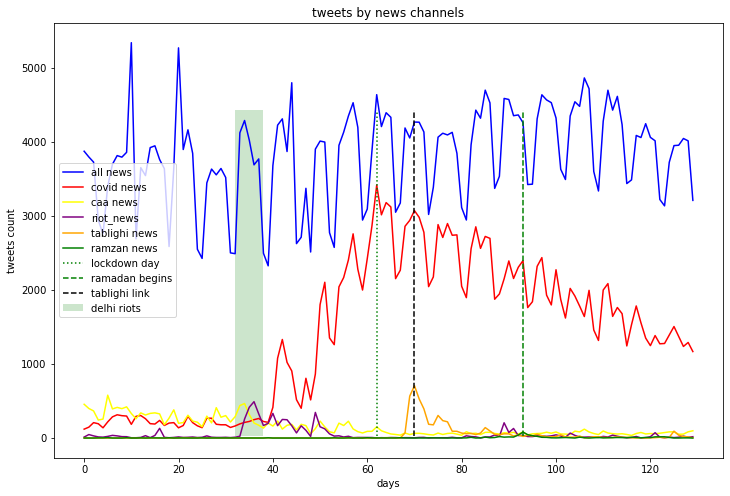

In [124]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(national_news_df["all_news"].values, color = "blue", label = "all news")
ax.plot(national_news_df["covid_news"].values, color = "red", label = "covid news")
ax.plot(national_news_df["caa_news"].values, color = "yellow", label = "caa news")
ax.plot(national_news_df["riot_news"].values, color = "purple", label = "riot_news")
ax.plot(national_news_df["tablighi_news"].values, color = "orange", label = "tablighi news")
ax.plot(national_news_df["ramzan_news"].values, color = "green", label = "ramzan news")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "tweets count", title = "tweets by news channels")
ax.legend()

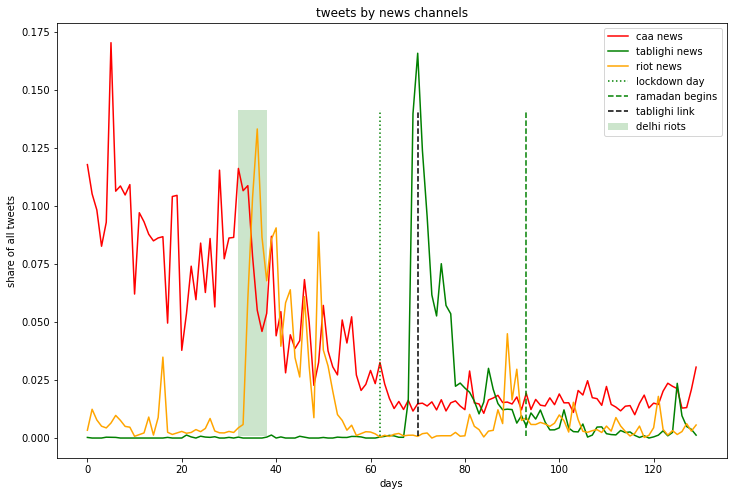

In [129]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((national_news_df["caa_news"].values/national_news_df["all_news"]), color = "red", label = "caa news")
ax.plot((national_news_df["tablighi_news"].values/national_news_df["all_news"]), color = "green", label = "tablighi news")
ax.plot((national_news_df["riot_news"].values/national_news_df["all_news"]), color = "orange", label = "riot news")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "share of all tweets", title = "tweets by news channels")
ax.legend()

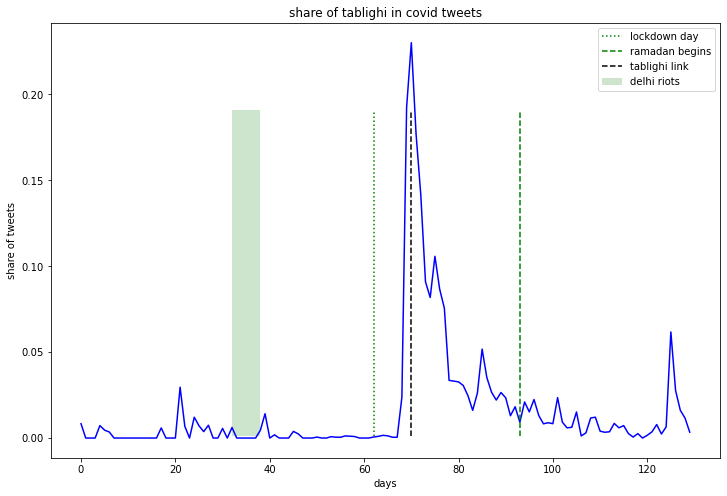

In [128]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((national_news_df["tablighi_news"].values/national_news_df["covid_news"]), color = "blue")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "share of tweets", title = "share of tablighi in covid tweets")
ax.legend()

In [4]:
#creating caa, riot, tablighi and ramzan dummies

In [15]:
news_df.columns

Index(['date', 'all_news', 'caa_news', 'riot_news', 'covid_news',
       'tablighi_news', 'ramzan_news'],
      dtype='object')

In [47]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final_news_daily_details_2.pkl", "rb") as f:
    news_df = pickle.load(f)

In [59]:
news_df["scovid_news"] = news_df["covid_news"] - news_df["tablighi_news"]

In [60]:
news_df

date  all_news  caa_news  riot_news  covid_news  tablighi_news  \
0    2020-01-22      3874       448         40         119              1   
1    2020-01-23      3796       409         87         144              0   
2    2020-01-24      3727       339         77         208              0   
3    2020-01-25      2943       245         48         193              0   
4    2020-01-26      2756       247         42         137              1   
5    2020-01-27      3402       598         86         214              1   
6    2020-01-28      3698       470         62         285              1   
7    2020-01-29      3815       488         67         313              0   
8    2020-01-30      3794       435        251         302              0   
9    2020-01-31      3859       387         83         296              0   
10   2020-02-01      5340       346         45         185              0   
11   2020-02-02      2691       317         30         292              0   
12   2020-02-03      3652       441         76         299              0   
13   2020-02-04      3545       500         64         259              0   
14   2020-02-05      3923       482         32         194              0   
15   2020-02-06      3947       453         69         189              0   
16   2020-02-07      3761       352        163         238              0   
17   2020-02-08      3638       208         29         169              1   
18   2020-02-09      2587       244         28         199              0   
19   2020-02-10      3647       374         39         206              0   
20   2020-02-11      5270       205         37         137              0   
21   2020-02-12      3897       188         19         167              5   
22   2020-02-13      4163       300         40         294              2   
23   2020-02-14      3845       238         38         207              0   
24   2020-02-15      2550       184         32         164              2   
25   2020-02-16      2426       138         55         139              1   
26   2020-02-17      3446       362         98         264              1   
27   2020-02-18      3633       180         60         266              2   
28   2020-02-19      3555       501         32         186              0   
29   2020-02-20      3641       263         59         173              0   
30   2020-02-21      3519       303         49         178              1   
31   2020-02-22      2501       193         24         142              0   
32   2020-02-23      2490       271         76         163              1   
33   2020-02-24      4123       369        414         187              0   
34   2020-02-25      4289       441       1041         207              0   
35   2020-02-26      4023       288       1320         210              0   
36   2020-02-27      3690       173       1166         239              0   
37   2020-02-28      3770       137        823         261              0   
38   2020-02-29      2496        97        361         223              1   
39   2020-03-01      2326       195        438         209              3   
40   2020-03-02      3681       139        628         411              0   
41   2020-03-03      4226       196        399        1076              2   
42   2020-03-04      4311       178        424        1329              0   
43   2020-03-05      3870       247        466        1022              0   
44   2020-03-06      4799       142        330         903              0   
45   2020-03-07      2626       101        146         517              2   
46   2020-03-08      2712       139        214         398              1   
47   2020-03-09      3373       128        177         806              0   
48   2020-03-10      2513        28         45         514              0   
49   2020-03-11      3902        92        507         865              0   
50   2020-03-12      4011       187        252        1802              1   
51   20

In [61]:
def lockdown_dummy(x):
    if x >= "2020-03-25":
        return 1
    else:
        return 0

In [52]:
def make_tablighi_dummy(x):
    return x/news_df["tablighi_news"].max()

In [53]:
def make_caa_dummy(x):
    return x/news_df["caa_news"].max()

In [54]:
def make_riot_dummy(x):
    return x/news_df["riot_news"].max()

In [55]:
def make_ramzan_dummy(x):
    return x/news_df["ramzan_news"].max()

In [56]:
def make_election_dummy(x):
    return x/news_df["election_news"].max()

In [57]:
def make_covid_dummy(x):
    return x/news_df["covid_news"].max()

In [58]:
def make_scovid_dummy(x):
    return x/news_df["scovid_news"].max()

In [62]:
news_df["caa_dummy"] = news_df["caa_news"].apply(make_caa_dummy)

In [63]:
news_df["riot_dummy"] = news_df["riot_news"].apply(make_riot_dummy)

In [64]:
news_df["ramzan_dummy"] = news_df["ramzan_news"].apply(make_ramzan_dummy)

In [65]:
news_df["tablighi_dummy"] = news_df["tablighi_news"].apply(make_tablighi_dummy)

In [66]:
news_df["election_dummy"] = news_df["election_news"].apply(make_election_dummy)

In [67]:
news_df["covid_dummy"] = news_df["covid_news"].apply(make_covid_dummy)

In [68]:
news_df["scovid_dummy"] = news_df["scovid_news"].apply(make_scovid_dummy)

In [69]:
news_df["lockdown_dummy"] = news_df["date"].apply(lockdown_dummy)

In [70]:
news_df

date  all_news  caa_news  riot_news  covid_news  tablighi_news  \
0    2020-01-22      3874       448         40         119              1   
1    2020-01-23      3796       409         87         144              0   
2    2020-01-24      3727       339         77         208              0   
3    2020-01-25      2943       245         48         193              0   
4    2020-01-26      2756       247         42         137              1   
5    2020-01-27      3402       598         86         214              1   
6    2020-01-28      3698       470         62         285              1   
7    2020-01-29      3815       488         67         313              0   
8    2020-01-30      3794       435        251         302              0   
9    2020-01-31      3859       387         83         296              0   
10   2020-02-01      5340       346         45         185              0   
11   2020-02-02      2691       317         30         292              0   
12   2020-02-03      3652       441         76         299              0   
13   2020-02-04      3545       500         64         259              0   
14   2020-02-05      3923       482         32         194              0   
15   2020-02-06      3947       453         69         189              0   
16   2020-02-07      3761       352        163         238              0   
17   2020-02-08      3638       208         29         169              1   
18   2020-02-09      2587       244         28         199              0   
19   2020-02-10      3647       374         39         206              0   
20   2020-02-11      5270       205         37         137              0   
21   2020-02-12      3897       188         19         167              5   
22   2020-02-13      4163       300         40         294              2   
23   2020-02-14      3845       238         38         207              0   
24   2020-02-15      2550       184         32         164              2   
25   2020-02-16      2426       138         55         139              1   
26   2020-02-17      3446       362         98         264              1   
27   2020-02-18      3633       180         60         266              2   
28   2020-02-19      3555       501         32         186              0   
29   2020-02-20      3641       263         59         173              0   
30   2020-02-21      3519       303         49         178              1   
31   2020-02-22      2501       193         24         142              0   
32   2020-02-23      2490       271         76         163              1   
33   2020-02-24      4123       369        414         187              0   
34   2020-02-25      4289       441       1041         207              0   
35   2020-02-26      4023       288       1320         210              0   
36   2020-02-27      3690       173       1166         239              0   
37   2020-02-28      3770       137        823         261              0   
38   2020-02-29      2496        97        361         223              1   
39   2020-03-01      2326       195        438         209              3   
40   2020-03-02      3681       139        628         411              0   
41   2020-03-03      4226       196        399        1076              2   
42   2020-03-04      4311       178        424        1329              0   
43   2020-03-05      3870       247        466        1022              0   
44   2020-03-06      4799       142        330         903              0   
45   2020-03-07      2626       101        146         517              2   
46   2020-03-08      2712       139        214         398              1   
47   2020-03-09      3373       128        177         806              0   
48   2020-03-10      2513        28         45         514              0   
49   2020-03-11      3902        92        507         865              0   
50   2020-03-12      4011       187        252        1802              1   
51   20

In [71]:
news_df["datetime"] = pd.to_datetime(news_df["date"])

In [72]:
news_df.set_index(keys = "datetime", inplace = True)

In [73]:
news_df

date  all_news  caa_news  riot_news  covid_news  \
datetime                                                            
2020-01-22  2020-01-22      3874       448         40         119   
2020-01-23  2020-01-23      3796       409         87         144   
2020-01-24  2020-01-24      3727       339         77         208   
2020-01-25  2020-01-25      2943       245         48         193   
2020-01-26  2020-01-26      2756       247         42         137   
2020-01-27  2020-01-27      3402       598         86         214   
2020-01-28  2020-01-28      3698       470         62         285   
2020-01-29  2020-01-29      3815       488         67         313   
2020-01-30  2020-01-30      3794       435        251         302   
2020-01-31  2020-01-31      3859       387         83         296   
2020-02-01  2020-02-01      5340       346         45         185   
2020-02-02  2020-02-02      2691       317         30         292   
2020-02-03  2020-02-03      3652       441         76         299   
2020-02-04  2020-02-04      3545       500         64         259   
2020-02-05  2020-02-05      3923       482         32         194   
2020-02-06  2020-02-06      3947       453         69         189   
2020-02-07  2020-02-07      3761       352        163         238   
2020-02-08  2020-02-08      3638       208         29         169   
2020-02-09  2020-02-09      2587       244         28         199   
2020-02-10  2020-02-10      3647       374         39         206   
2020-02-11  2020-02-11      5270       205         37         137   
2020-02-12  2020-02-12      3897       188         19         167   
2020-02-13  2020-02-13      4163       300         40         294   
2020-02-14  2020-02-14      3845       238         38         207   
2020-02-15  2020-02-15      2550       184         32         164   
2020-02-16  2020-02-16      2426       138         55         139   
2020-02-17  2020-02-17      3446       362         98         264   
2020-02-18  2020-02-18      3633       180         60         266   
2020-02-19  2020-02-19      3555       501         32         186   
2020-02-20  2020-02-20      3641       263         59         173   
2020-02-21  2020-02-21      3519       303         49         178   
2020-02-22  2020-02-22      2501       193         24         142   
2020-02-23  2020-02-23      2490       271         76         163   
2020-02-24  2020-02-24      4123       369        414         187   
2020-02-25  2020-02-25      4289       441       1041         207   
2020-02-26  2020-02-26      4023       288       1320         210   
2020-02-27  2020-02-27      3690       173       1166         239   
2020-02-28  2020-02-28      3770       137        823         261   
2020-02-29  2020-02-29      2496        97        361         223   
2020-03-01  2020-03-01      2326       195        438         209   
2020-03-02  2020-03-02      3681       139        628         411   
2020-03-03  2020-03-03      4226       196        399        1076   
2020-03-04  2020-03-04      4311       178        424        1329   
2020-03-05  2020-03-05      3870       247        466        1022   
2020-03-06  2020-03-06      4799       142        330         903   
2020-03-07  2020-03-07      2626       101        146         517   
2020-03-08  2020-03-08      2712       139        214         398   
2020-03-09  2020-03-09      3373       128        177         806   
2020-03-10  2020-03-10      2513        28         45         514   
2020-03-11  2020-03-11      3902        92        507         865   
2020-03-12  2020-03-12      4011       187        252        1802   
2020-03-13  2020-03-13      3998       123        165        2104   
2020-03-14  2020-03-14      2774        56         81        1350   
2020-03-15  2020-03-15      2575        35         42        1261   
2020-03-16  2020-03-16      3954       220         60        2041   
2020-03-17  2020-03-17      4131       155         25        2167   
2020-03-18  2020

In [74]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\september_news_data.pkl", "wb") as f:
    pickle.dump(news_df, f)

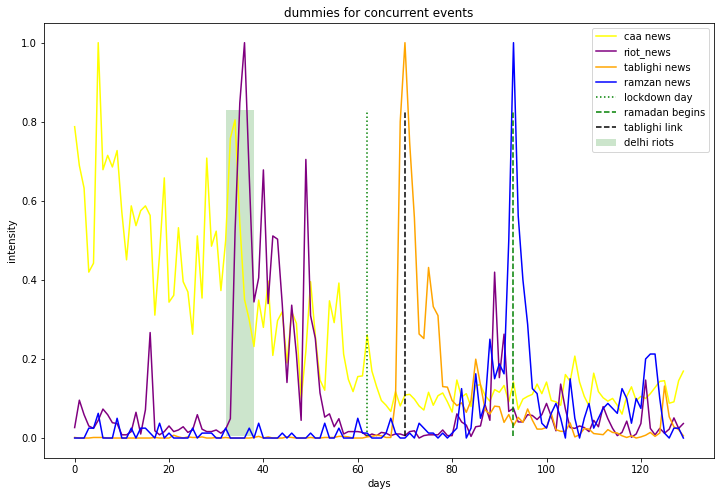

In [11]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(news_df["caa_dummy"].values, color = "yellow", label = "caa news")
ax.plot(news_df["riot_dummy"].values, color = "purple", label = "riot_news")
ax.plot(news_df["tablighi_dummy"].values, color = "orange", label = "tablighi news")
ax.plot(news_df["ramzan_dummy"].values, color = "blue", label = "ramzan news")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "intensity", title = "dummies for concurrent events")
ax.legend()

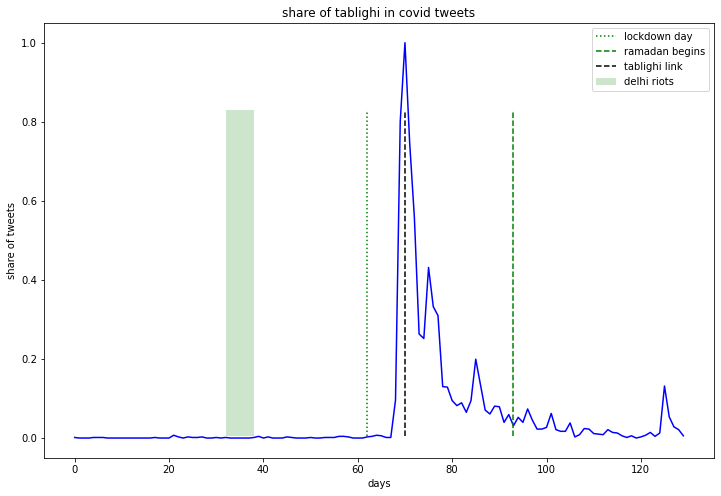

In [22]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(news_df["tablighi_dummy"], color = "blue")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "share of tweets", title = "share of tablighi in covid tweets")
ax.legend()

In [12]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final_national_daily_details.pkl", "rb") as f:
    data = pickle.load(f)

In [13]:
data.columns

Index(['date', 'all_tweets', 'all_likes', 'all_retweets', 'all_replies',
       'all_neg', 'all_neg_likes', 'all_neg_retweets', 'all_neg_replies',
       'covid_tweets', 'covid_likes', 'covid_retweets', 'covid_replies',
       'covid_neg', 'covid_neg_likes', 'covid_neg_retweets',
       'covid_neg_replies', 'tablighi_tweets', 'tablighi_likes',
       'tablighi_retweets', 'tablighi_replies', 'tablighi_neg',
       'tablighi_neg_likes', 'tablighi_neg_retweets', 'tablighi_neg_replies',
       'muslim_tweets', 'muslim_likes', 'muslim_retweets', 'muslim_replies',
       'muslim_neg', 'muslim_neg_likes', 'muslim_neg_retweets',
       'muslim_neg_replies', 'muslim + tablighi_tweets',
       'muslim + tablighi_likes', 'muslim + tablighi_retweets',
       'muslim + tablighi_replies', 'muslim + tablighi_neg',
       'muslim + tablighi_neg_likes', 'muslim + tablighi_neg_retweets',
       'muslim + tablighi_neg_replies', 'muslim + covid_tweets',
       'muslim + covid_likes', 'muslim + covid_retwe

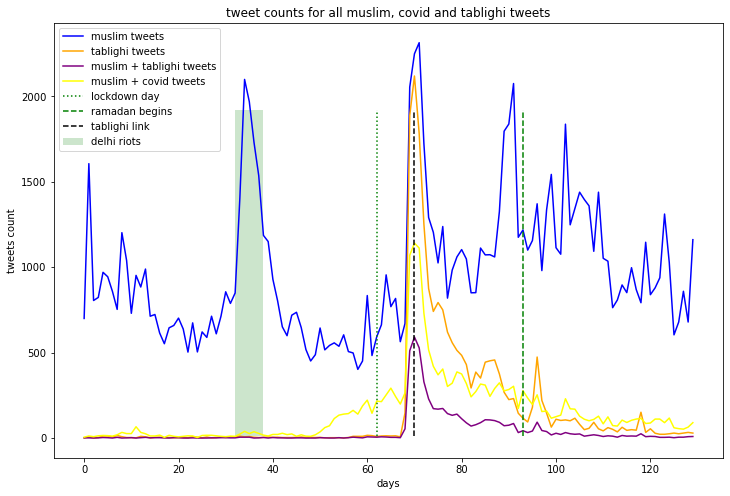

In [39]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((data["muslim_tweets"]), color = "blue", label = "muslim tweets")
ax.plot(data["tablighi_tweets"], color = "orange", label = "tablighi tweets")
ax.plot(data["muslim + tablighi_tweets"], color = "purple", label = "muslim + tablighi tweets")
ax.plot(data["muslim + covid_tweets"], color = "yellow", label = "muslim + covid tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "tweets count", title = "tweet counts for all muslim, covid and tablighi tweets")
ax.legend()

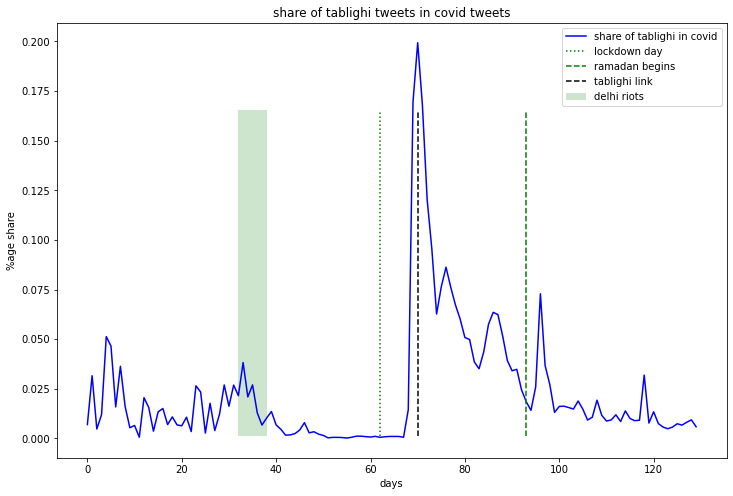

In [31]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((data["tablighi_tweets"]/data["covid_tweets"]), color = "blue", label = "share of tablighi in covid")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "%age share", title = "share of tablighi tweets in covid tweets")
ax.legend()

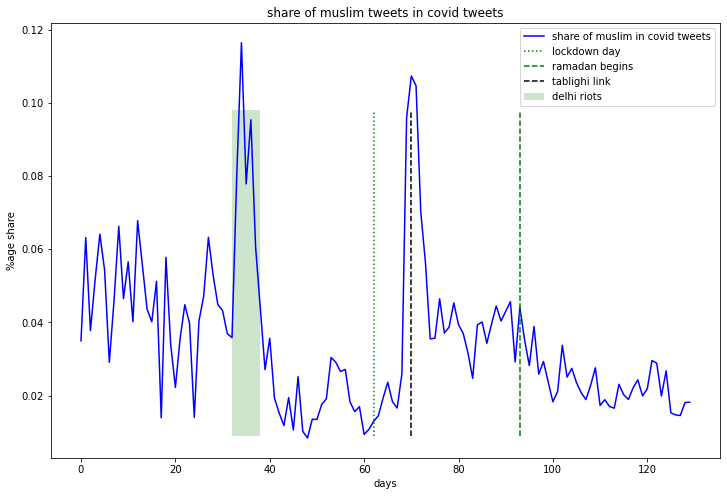

In [43]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((data["muslim + covid_tweets"]/data["covid_tweets"]), color = "blue", label = "share of muslim in covid tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "%age share", title = "share of muslim tweets in covid tweets")
ax.legend()

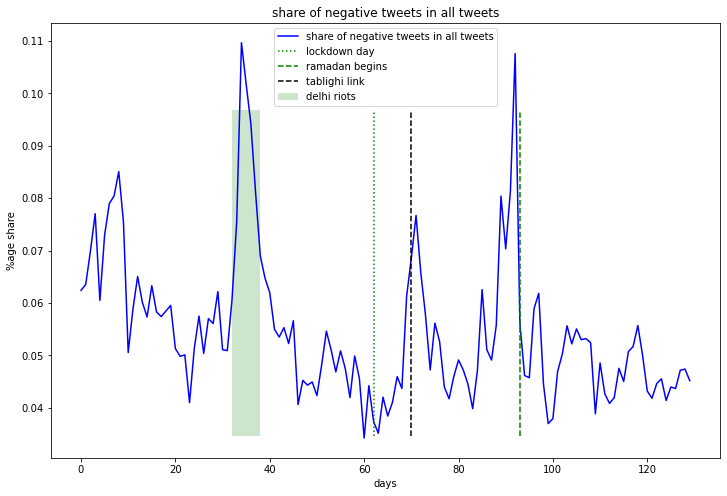

In [32]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((data["all_neg"]/data["all_tweets"]), color = "blue", label = "share of negative tweets in all tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "%age share", title = "share of negative tweets in all tweets")
ax.legend()

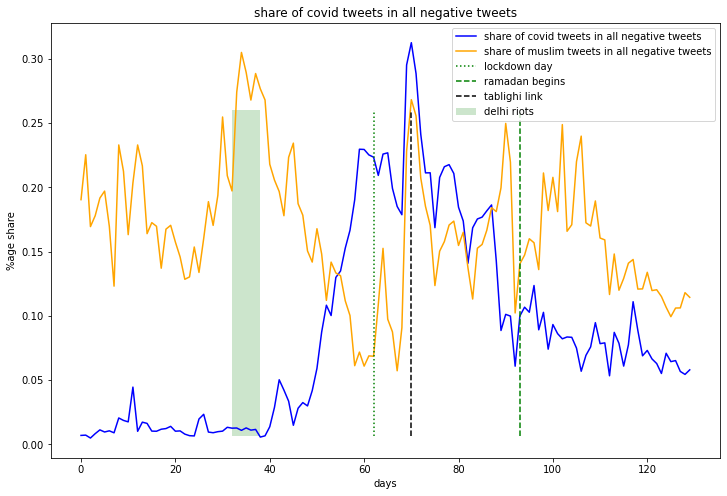

In [44]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((data["covid_neg"]/data["all_neg"]), color = "blue", label = "share of covid tweets in all negative tweets")
ax.plot((data["muslim_neg"]/data["all_neg"]), color = "orange", label = "share of muslim tweets in all negative tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "%age share", title = "share of covid tweets in all negative tweets")
ax.legend()

In [45]:
news_df

date  all_news  caa_news  riot_news  covid_news  tablighi_news  \
0    2020-01-22      3874       456         13         120              1   
1    2020-01-23      3796       399         47         147              0   
2    2020-01-24      3727       366         29         208              0   
3    2020-01-25      2943       243         15         193              0   
4    2020-01-26      2756       256         12         138              1   
..          ...       ...       ...        ...         ...            ...   
125  2020-05-26      3950        84          6        1506             93   
126  2020-05-27      3955        51         11        1373             38   
127  2020-05-28      4046        53         25        1237             20   
128  2020-05-29      4014        84         12        1291             15   
129  2020-05-30      3210        98         18        1168              4   

     ramzan_news  caa_dummy  riot_dummy  ramzan_dummy  tablighi_dummy  
0              0   0.787565    0.026477        0.0000        0.001414  
1              0   0.689119    0.095723        0.0000        0.000000  
2              0   0.632124    0.059063        0.0000        0.000000  
3              2   0.419689    0.030550        0.0250        0.000000  
4              2   0.442142    0.024440        0.0250        0.001414  
..           ...        ...         ...           ...             ...  
125            1   0.145078    0.012220        0.0125        0.131542  
126            0   0.088083    0.022403        0.0000        0.053748  
127            2   0.091537    0.050916        0.0250        0.028289  
128            2   0.145078    0.024440        0.0250        0.021216  
129            0   0.169257    0.036660        0.0000        0.005658  

[130 rows x 11 columns]

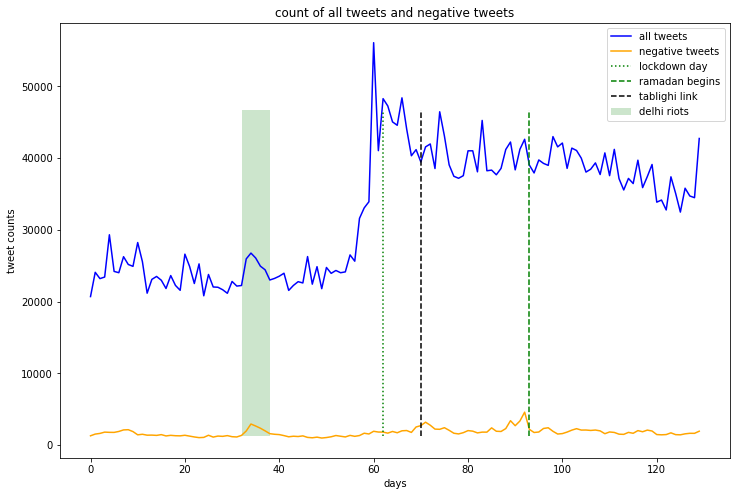

In [40]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(data["all_tweets"], color = "blue", label = "all tweets")
ax.plot(data["all_neg"], color = "orange", label = "negative tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "tweet counts", title = "count of all tweets and negative tweets")
ax.legend()

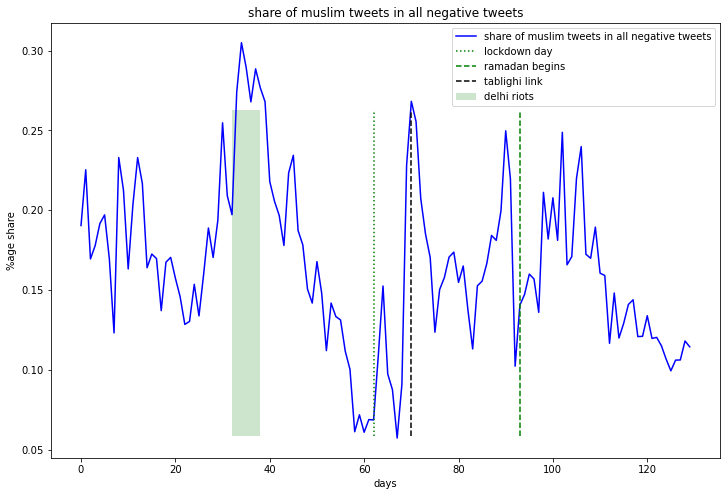

In [35]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((data["muslim_neg"]/data["all_neg"]), color = "blue", label = "share of muslim tweets in all negative tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "%age share", title = "share of muslim tweets in all negative tweets")
ax.legend()

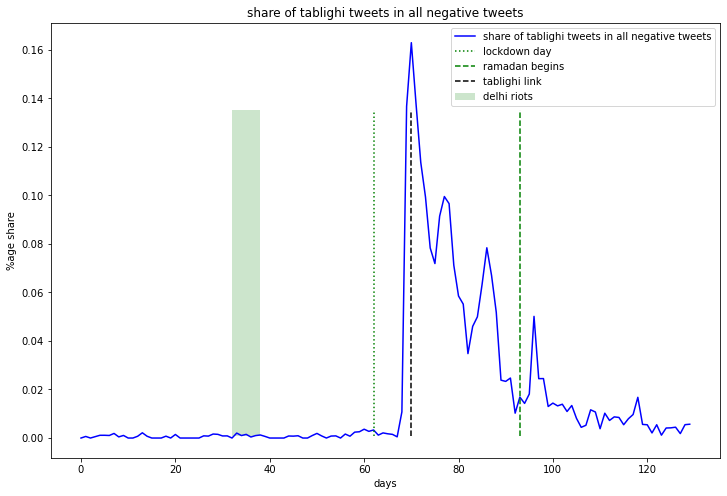

In [36]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((data["tablighi_neg"]/data["all_neg"]), color = "blue", label = "share of tablighi tweets in all negative tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "%age share", title = "share of tablighi tweets in all negative tweets")
ax.legend()

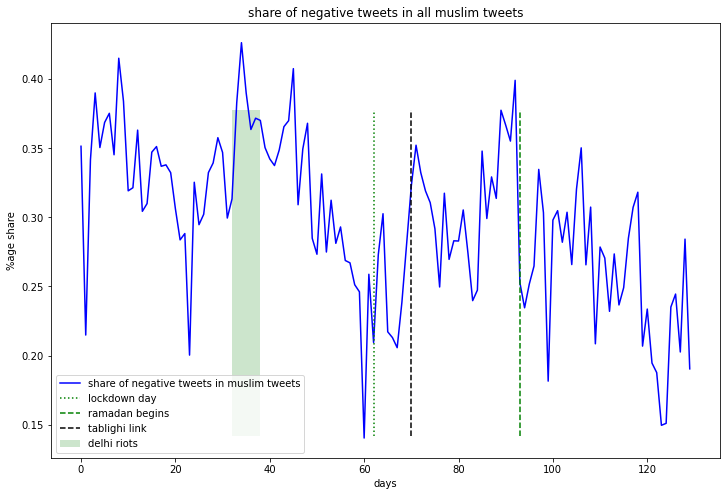

In [38]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((data["muslim_neg"]/data["muslim_tweets"]), color = "blue", label = "share of negative tweets in muslim tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "%age share", title = "share of negative tweets in all muslim tweets")
ax.legend()

In [28]:
with open("C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\august cleaned Mizoram\\Mizoram muslim_tablighi_tweet_ids.pkl", "rb") as f:
    mt = pickle.load(f)

In [29]:
with open("C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\august cleaned Mizoram\\Mizoram tablighi_muslim_tweet_ids.pkl", "rb") as f:
    tm = pickle.load(f)

In [30]:
len(mt) == len(tm)

True

In [34]:
data.head()

date  all_tweets  all_likes  all_retweets  all_replies  all_neg  \
0  2020-01-22       20704   204977.0       57636.0      14966.0     1292   
1  2020-01-23       24086   256220.0       81484.0      17584.0     1531   
2  2020-01-24       23208   284502.0       77485.0      19352.0     1623   
3  2020-01-25       23429   419645.0      112852.0      31723.0     1805   
4  2020-01-26       29321   435941.0      136706.0      30771.0     1774   

   all_neg_likes  all_neg_retweets  all_neg_replies  covid_tweets  ...  \
0         6961.0            3894.0            707.0           143  ...   
1        14926.0            5753.0           1006.0           190  ...   
2        13485.0            6295.0           1700.0           212  ...   
3        89823.0           37181.0           7886.0           251  ...   
4        52183.0           17468.0           6102.0           234  ...   

   muslim + tablighi_neg_retweets  muslim + tablighi_neg_replies  \
0                             0.0                            0.0   
1                           927.0                          115.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                            36.0                            5.0   

   muslim + covid_tweets  muslim + covid_likes  muslim + covid_retweets  \
0                      5                 564.0                    390.0   
1                     12                2414.0                    928.0   
2                      8                   5.0                      3.0   
3                     13                  28.0                     12.0   
4                     15                 121.0                     79.0   

   muslim + covid_replies  muslim + covid_neg  muslim + covid_neg_likes  \
0                    78.0                   2                       9.0   
1                   115.0                   2                    2408.0   
2                     2.0                   3                       0.0   
3                     5.0                   2                       2.0   
4                     6.0                   9                      92.0   

   muslim + covid_neg_retweets  muslim + covid_neg_replies  
0                          8.0                         0.0  
1                        927.0                       115.0  
2                          0.0                         0.0  
3                          0.0                         0.0  
4                         36.0                         6.0  

[5 rows x 49 columns]

In [53]:
final_data = pd.DataFrame()

In [54]:
final_data["date"] = data["date"]
final_data["muslim_neg_share"] = data["muslim_neg"]/data["all_neg"]
final_data["caa"] = news_df["caa_dummy"]
final_data["riot"] = news_df["riot_dummy"]
final_data["tablighi"] = news_df["tablighi_dummy"]
final_data["ramzan"] = news_df["ramzan_dummy"]

In [55]:
final_data

date  muslim_neg_share       caa      riot  tablighi  ramzan
0    2020-01-22          0.190402  0.787565  0.026477  0.001414  0.0000
1    2020-01-23          0.225343  0.689119  0.095723  0.000000  0.0000
2    2020-01-24          0.169439  0.632124  0.059063  0.000000  0.0000
3    2020-01-25          0.177839  0.419689  0.030550  0.000000  0.0250
4    2020-01-26          0.191657  0.442142  0.024440  0.001414  0.0250
..          ...               ...       ...       ...       ...     ...
125  2020-05-26          0.099370  0.145078  0.012220  0.131542  0.0125
126  2020-05-27          0.106070  0.088083  0.022403  0.053748  0.0000
127  2020-05-28          0.106162  0.091537  0.050916  0.028289  0.0250
128  2020-05-29          0.118043  0.145078  0.024440  0.021216  0.0250
129  2020-05-30          0.114389  0.169257  0.036660  0.005658  0.0000

[130 rows x 6 columns]

In [56]:
#make lockdown dummy

In [57]:
def make_lockdown(x):
    if x >= "2020-03-25":
        return 1
    else:
        return 0

In [65]:
def make_lockdown_days(x):
    if x >= "2020-03-25" and int(x.rpartition("-")[0][-1:]) == 3:
        days = int(x.rpartition("-")[2]) - int("2020-03-24".rpartition("-")[2])
        return days
    elif x >= "2020-03-25" and int(x.rpartition("-")[0][-1:]) == 4:
        days = 31 + int(x.rpartition("-")[2]) - int("2020-03-24".rpartition("-")[2])
        return days
    elif x >= "2020-03-25" and int(x.rpartition("-")[0][-1:]) == 5:
        days = 61 + int(x.rpartition("-")[2]) - int("2020-03-24".rpartition("-")[2])
        return days
    else:
        return 0

In [66]:
final_data["lockdown"] = final_data["date"].apply(make_lockdown)
final_data["lockdown_days"] = final_data["date"].apply(make_lockdown_days)

In [63]:
pd.set_option("display.max_rows", None)

In [67]:
final_data

date  muslim_neg_share       caa      riot  tablighi  ramzan  \
0    2020-01-22          0.190402  0.787565  0.026477  0.001414  0.0000   
1    2020-01-23          0.225343  0.689119  0.095723  0.000000  0.0000   
2    2020-01-24          0.169439  0.632124  0.059063  0.000000  0.0000   
3    2020-01-25          0.177839  0.419689  0.030550  0.000000  0.0250   
4    2020-01-26          0.191657  0.442142  0.024440  0.001414  0.0250   
5    2020-01-27          0.197055  1.000000  0.044807  0.001414  0.0625   
6    2020-01-28          0.169652  0.678756  0.073320  0.001414  0.0000   
7    2020-01-29          0.123106  0.715026  0.059063  0.000000  0.0000   
8    2020-01-30          0.232960  0.685665  0.038697  0.000000  0.0000   
9    2020-01-31          0.212460  0.727116  0.036660  0.000000  0.0500   
10   2020-02-01          0.163165  0.571675  0.008147  0.000000  0.0000   
11   2020-02-02          0.203457  0.450777  0.008147  0.000000  0.0000   
12   2020-02-03          0.232946  0.587219  0.016293  0.000000  0.0250   
13   2020-02-04          0.216703  0.537133  0.065173  0.000000  0.0000   
14   2020-02-05          0.163947  0.575130  0.010183  0.000000  0.0250   
15   2020-02-06          0.172509  0.587219  0.071283  0.000000  0.0250   
16   2020-02-07          0.169678  0.563040  0.266802  0.000000  0.0125   
17   2020-02-08          0.137067  0.310881  0.018330  0.001414  0.0000   
18   2020-02-09          0.167435  0.464594  0.008147  0.000000  0.0375   
19   2020-02-10          0.170428  0.658031  0.016293  0.000000  0.0000   
20   2020-02-11          0.157394  0.343696  0.030550  0.000000  0.0125   
21   2020-02-12          0.145850  0.360967  0.016293  0.007072  0.0000   
22   2020-02-13          0.128432  0.531952  0.020367  0.002829  0.0000   
23   2020-02-14          0.130309  0.395509  0.028513  0.000000  0.0000   
24   2020-02-15          0.153558  0.369603  0.014257  0.002829  0.0000   
25   2020-02-16          0.133772  0.262522  0.020367  0.001414  0.0250   
26   2020-02-17          0.160216  0.511226  0.059063  0.001414  0.0000   
27   2020-02-18          0.188845  0.354059  0.022403  0.002829  0.0125   
28   2020-02-19          0.170370  0.708117  0.016293  0.000000  0.0125   
29   2020-02-20          0.193769  0.485320  0.016293  0.000000  0.0125   
30   2020-02-21          0.254717  0.523316  0.020367  0.001414  0.0000   
31   2020-02-22          0.209035  0.373057  0.012220  0.000000  0.0000   
32   2020-02-23          0.197183  0.499136  0.022403  0.001414  0.0250   
33   2020-02-24          0.274070  0.758204  0.048880  0.000000  0.0000   
34   2020-02-25          0.304940  0.804836  0.523422  0.000000  0.0000   
35   2020-02-26          0.289375  0.544041  0.847251  0.000000  0.0000   
36   2020-02-27          0.267888  0.350604  1.000000  0.000000  0.0000   
37   2020-02-28          0.288530  0.298791  0.663951  0.000000  0.0250   
38   2020-02-29          0.276623  0.231434  0.344196  0.001414  0.0000   
39   2020-03-01          0.267952  0.348877  0.405295  0.004243  0.0375   
40   2020-03-02          0.217958  0.279793  0.678208  0.000000  0.0000   
41   2020-03-03          0.205615  0.397237  0.340122  0.002829  0.0000   
42   2020-03-04          0.196707  0.208981  0.511202  0.000000  0.0000   
43   2020-03-05          0.177904  0.297064  0.503055  0.000000  0.0000   
44   2020-03-06          0.223342  0.319516  0.338086  0.000000  0.0125   
45   2020-03-07          0.234375  0.189983  0.140530  0.002829  0.0000   
46   2020-03-08          0.187266  0.319516  0.336049  0.001414  0.0125   
47   2020-03-09          0.178325  0.290155  0.211813  0.000000  0.0000   
48   2020-03-10          0.150499  0.098446  0.044807  0.000000  0.0000   
49   2020-03-11          0.141837  0.219344  0.704684  0.000000  0.0000   
50   2020-03-12          0.167779  0.395509  0.309572  0.001414  0.0125   
51   2020-03-13          0.148052  0.259067  0.252546  0.000000  0.0000   
52   2020-03-14          0.112030  0

In [68]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final_arima_data.pkl", "wb") as f:
    pickle.dump(final_data, f)

In [2]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final_arima_data.pkl", "rb") as f:
    data = pickle.load(f)

In [3]:
pd.set_option("display.max_rows", None)

In [4]:
data

date  muslim_neg_share       caa      riot  tablighi  ramzan  \
0    2020-01-22          0.190402  0.787565  0.026477  0.001414  0.0000   
1    2020-01-23          0.225343  0.689119  0.095723  0.000000  0.0000   
2    2020-01-24          0.169439  0.632124  0.059063  0.000000  0.0000   
3    2020-01-25          0.177839  0.419689  0.030550  0.000000  0.0250   
4    2020-01-26          0.191657  0.442142  0.024440  0.001414  0.0250   
5    2020-01-27          0.197055  1.000000  0.044807  0.001414  0.0625   
6    2020-01-28          0.169652  0.678756  0.073320  0.001414  0.0000   
7    2020-01-29          0.123106  0.715026  0.059063  0.000000  0.0000   
8    2020-01-30          0.232960  0.685665  0.038697  0.000000  0.0000   
9    2020-01-31          0.212460  0.727116  0.036660  0.000000  0.0500   
10   2020-02-01          0.163165  0.571675  0.008147  0.000000  0.0000   
11   2020-02-02          0.203457  0.450777  0.008147  0.000000  0.0000   
12   2020-02-03          0.232946  0.587219  0.016293  0.000000  0.0250   
13   2020-02-04          0.216703  0.537133  0.065173  0.000000  0.0000   
14   2020-02-05          0.163947  0.575130  0.010183  0.000000  0.0250   
15   2020-02-06          0.172509  0.587219  0.071283  0.000000  0.0250   
16   2020-02-07          0.169678  0.563040  0.266802  0.000000  0.0125   
17   2020-02-08          0.137067  0.310881  0.018330  0.001414  0.0000   
18   2020-02-09          0.167435  0.464594  0.008147  0.000000  0.0375   
19   2020-02-10          0.170428  0.658031  0.016293  0.000000  0.0000   
20   2020-02-11          0.157394  0.343696  0.030550  0.000000  0.0125   
21   2020-02-12          0.145850  0.360967  0.016293  0.007072  0.0000   
22   2020-02-13          0.128432  0.531952  0.020367  0.002829  0.0000   
23   2020-02-14          0.130309  0.395509  0.028513  0.000000  0.0000   
24   2020-02-15          0.153558  0.369603  0.014257  0.002829  0.0000   
25   2020-02-16          0.133772  0.262522  0.020367  0.001414  0.0250   
26   2020-02-17          0.160216  0.511226  0.059063  0.001414  0.0000   
27   2020-02-18          0.188845  0.354059  0.022403  0.002829  0.0125   
28   2020-02-19          0.170370  0.708117  0.016293  0.000000  0.0125   
29   2020-02-20          0.193769  0.485320  0.016293  0.000000  0.0125   
30   2020-02-21          0.254717  0.523316  0.020367  0.001414  0.0000   
31   2020-02-22          0.209035  0.373057  0.012220  0.000000  0.0000   
32   2020-02-23          0.197183  0.499136  0.022403  0.001414  0.0250   
33   2020-02-24          0.274070  0.758204  0.048880  0.000000  0.0000   
34   2020-02-25          0.304940  0.804836  0.523422  0.000000  0.0000   
35   2020-02-26          0.289375  0.544041  0.847251  0.000000  0.0000   
36   2020-02-27          0.267888  0.350604  1.000000  0.000000  0.0000   
37   2020-02-28          0.288530  0.298791  0.663951  0.000000  0.0250   
38   2020-02-29          0.276623  0.231434  0.344196  0.001414  0.0000   
39   2020-03-01          0.267952  0.348877  0.405295  0.004243  0.0375   
40   2020-03-02          0.217958  0.279793  0.678208  0.000000  0.0000   
41   2020-03-03          0.205615  0.397237  0.340122  0.002829  0.0000   
42   2020-03-04          0.196707  0.208981  0.511202  0.000000  0.0000   
43   2020-03-05          0.177904  0.297064  0.503055  0.000000  0.0000   
44   2020-03-06          0.223342  0.319516  0.338086  0.000000  0.0125   
45   2020-03-07          0.234375  0.189983  0.140530  0.002829  0.0000   
46   2020-03-08          0.187266  0.319516  0.336049  0.001414  0.0125   
47   2020-03-09          0.178325  0.290155  0.211813  0.000000  0.0000   
48   2020-03-10          0.150499  0.098446  0.044807  0.000000  0.0000   
49   2020-03-11          0.141837  0.219344  0.704684  0.000000  0.0000   
50   2020-03-12          0.167779  0.395509  0.309572  0.001414  0.0125   
51   2020-03-13          0.148052  0.259067  0.252546  0.000000  0.0000   
52   2020-03-14          0.112030  0

In [5]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [10]:
dftest = adfuller(data["muslim_neg_share"].values, autolag = "AIC", regression = "n")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)

1. ADF :  -0.9722762793270721
2. P-value :  0.2992749588624666
3. num of lags :  2
4. num of observations used for ADF regression and critical value condition :  127
5. critical values : 
	 1% :  -2.5835695988591976
	 5% :  -1.9433083482922873
	 10% :  -1.6148845473038977


In [36]:
kpss_test = kpss(data["muslim_neg_share"].values, regression = "c")

C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [37]:
kpss_test

(0.3290919084650161,
 0.1,
 6,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [96]:
kpss_test = kpss(data["muslim_neg_share"].values, regression = "ct")

C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [97]:
kpss_test

(0.0823283601451662,
 0.1,
 5,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

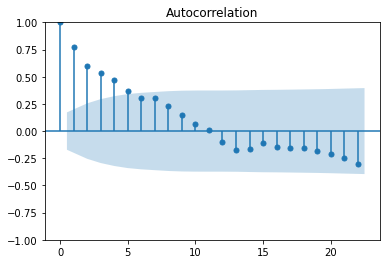

In [17]:
acf_plot = plot_acf(data["muslim_neg_share"].values)

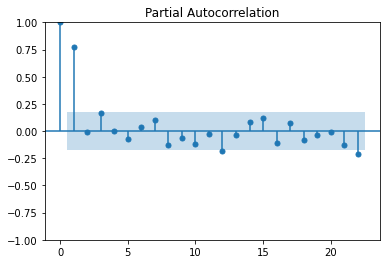

In [18]:
pacf_plot = plot_pacf(data["muslim_neg_share"].values, method = "ywm")

<AxesSubplot:>

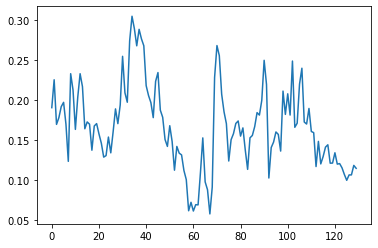

In [35]:
data["muslim_neg_share"].plot()

In [20]:
import pmdarima as pm

In [25]:
pm.arima.ndiffs(data["muslim_neg_share"], test = "adf")

1

In [30]:
model = pm.arima.AutoARIMA(
    start_p = 1,
    start_1 = 1,
    test = "kpss",
    max_order = None,
    method= "nm",
    maxiter = 1000)

In [60]:
data

date  muslim_neg_share       caa      riot  tablighi  ramzan  \
0    2020-01-22          0.190402  0.787565  0.026477  0.001414  0.0000   
1    2020-01-23          0.225343  0.689119  0.095723  0.000000  0.0000   
2    2020-01-24          0.169439  0.632124  0.059063  0.000000  0.0000   
3    2020-01-25          0.177839  0.419689  0.030550  0.000000  0.0250   
4    2020-01-26          0.191657  0.442142  0.024440  0.001414  0.0250   
..          ...               ...       ...       ...       ...     ...   
125  2020-05-26          0.099370  0.145078  0.012220  0.131542  0.0125   
126  2020-05-27          0.106070  0.088083  0.022403  0.053748  0.0000   
127  2020-05-28          0.106162  0.091537  0.050916  0.028289  0.0250   
128  2020-05-29          0.118043  0.145078  0.024440  0.021216  0.0250   
129  2020-05-30          0.114389  0.169257  0.036660  0.005658  0.0000   

     lockdown  lockdown_days  
0           0              0  
1           0              0  
2           0              0  
3           0              0  
4           0              0  
..        ...            ...  
125         1             63  
126         1             64  
127         1             65  
128         1             66  
129         1             67  

[130 rows x 8 columns]

In [27]:
exog = np.column_stack([data["caa"], data["riot"], data["tablighi"], data["ramzan"]])

In [28]:
exog.shape

(130, 4)

In [31]:
model_fit = model.fit(data["muslim_neg_share"].values, exog)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 271.098
Date:                Tue, 06 Sep 2022   AIC                           -526.196
Time:                        15:14:22   BIC                           -503.255
Sample:                             0   HQIC                          -516.874
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0157      0.009      1.767      0.077      -0.002       0.033
x1             0.0609      0.029      2.074      0.038       0.003       0.118
x2             0.0154      0.024      0.655      0.513      -0.031       0.061
x3             0.1417      0.034      4.139      0.000       0.075       0.209
x4            -0.0316      0.031     -1.006      0.314      -0.093       0.030
ar.L1          0.8888      0.060     14.932      0.000       0.772       1.005
ma.L1         -0.3628      0.119     -3.058      0.002      -0.595      -0.130
sigma2         0.0009      0.000      7.342      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 2.63
Prob(Q):                              0.66   Prob(JB):                         0.27
Heteroskedasticity (H):               1.00   Skew:                             0.19
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
order, sorder, trend = [(1, 0, 1), (0, 0, 0, 0), "c"]
exog = np.column_stack([data["caa"], data["riot"], data["tablighi"], data["ramzan"]])
model = SARIMAX(endog = data["muslim_neg_share"].values, order = order, sorder = sorder, trend = trend, exog = exog)
model_fit = model.fit(method = "nm", maxiter = 10000)
model_fit.summary()

Optimization terminated successfully.
         Current function value: -2.085368
         Iterations: 940
         Function evaluations: 1370


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 271.098
Date:                Tue, 06 Sep 2022   AIC                           -526.196
Time:                        18:28:23   BIC                           -503.255
Sample:                             0   HQIC                          -516.874
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0157      0.009      1.767      0.077      -0.002       0.033
x1             0.0609      0.029      2.074      0.038       0.003       0.118
x2             0.0154      0.024      0.655      0.513      -0.031       0.061
x3             0.1417      0.034      4.139      0.000       0.075       0.209
x4            -0.0316      0.031     -1.006      0.314      -0.093       0.030
ar.L1          0.8888      0.060     14.932      0.000       0.772       1.005
ma.L1         -0.3628      0.119     -3.058      0.002      -0.595      -0.130
sigma2         0.0009      0.000      7.342      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 2.63
Prob(Q):                              0.66   Prob(JB):                         0.27
Heteroskedasticity (H):               1.00   Skew:                             0.19
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
model_fit.pvalues[6:][:-1]

array([2.90492711e-48, 2.85886757e-03])

In [32]:
#we fail to reject the Null hypothesis of (trend) stationarity for the kpss test. we also reject the Null hypothesis of
#unit root after controlling for a trend/constant on the adf test.
#we will thus keep d = 0 

In [33]:
#we search over a grid of p = [0, 1, 2, 3], q = [0, 1, 2, 3], d = [0], P = [0, 1, 2, 3], Q = [0, 1, 2, 3], D = [0], 
#m = [0, 7], t = [c, t, ct]

In [47]:
def sarima_configs():
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0]
    q_params = [0, 1, 2, 3]
    t_params = ["c", "t", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0]
    Q_params = [0, 1, 2, 3]
    m_params = [0, 7]
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in p_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [49]:
cfg_list = sarima_configs()

In [50]:
len(cfg_list)

1536

In [51]:
t = time()
rel_models = []
exog = np.column_stack([data["caa"], data["delhi_riots"], data["tablighi"], data["ramadan"]])
with catch_warnings():
    filterwarnings("ignore")
    for cfg in cfg_list:
        try:
            order, sorder, trend = cfg
            model = SARIMAX(endog = data["muslim_neg_share"].values, order = order, sorder = sorder, trend = trend, exog = exog)
            model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
            p_value_list = None
            if trend == "c" or "t":
                p_value_list = model_fit.pvalues[5:][:-1]
                p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[0])
            else:
                p_value_list = model_fit.pvalues[6:][:-1]
                p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[:2])
            p_vals_mask = [p_val <= 0.10 for p_val in p_value_list]
            if sum(p_vals_mask) == len(p_vals_mask):
                rel_models.append((cfg, model_fit.bic))
                print("Model > [%s]%.3f"%(str(str(cfg)), model_fit.bic))
            else:
                pass
        except:
            pass
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]-436.334
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]-436.334
Model > [[(0, 0, 0), (0, 0, 1, 0), 'c']]-436.334
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]-436.334
Model > [[(0, 0, 0), (0, 0, 2, 0), 'c']]-436.334
Model > [[(0, 0, 0), (0, 0, 2, 7), 'c']]-436.334
Model > [[(0, 0, 0), (0, 0, 3, 0), 'c']]-436.334
Model > [[(0, 0, 0), (0, 0, 3, 7), 'c']]-436.334
Model > [[(0, 0, 0), (1, 0, 0, 0), 'c']]-436.334
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]-436.334
Model > [[(0, 0, 0), (1, 0, 1, 0), 'c']]-436.334
Model > [[(0, 0, 0), (1, 0, 1, 7), 'c']]-436.334
Model > [[(0, 0, 0), (1, 0, 2, 0), 'c']]-436.334
Model > [[(0, 0, 0), (1, 0, 2, 7), 'c']]-436.334
Model > [[(0, 0, 0), (1, 0, 3, 0), 'c']]-436.334
Model > [[(0, 0, 0), (1, 0, 3, 7), 'c']]-436.334
Model > [[(0, 0, 0), (2, 0, 0, 0), 'c']]-436.334
Model > [[(0, 0, 0), (2, 0, 0, 7), 'c']]-436.334
Model > [[(0, 0, 0), (2, 0, 1, 0), 'c']]-436.334
Model > [[(0, 0, 0), (2, 0, 1, 7), 'c']]-436.334
Model > [[(0, 0, 0),

Model > [[(0, 0, 2), (1, 0, 0, 0), 't']]-433.247
Model > [[(0, 0, 2), (1, 0, 0, 7), 't']]-433.247
Model > [[(0, 0, 2), (1, 0, 1, 0), 't']]-433.247
Model > [[(0, 0, 2), (1, 0, 1, 7), 't']]-433.247
Model > [[(0, 0, 2), (1, 0, 2, 0), 't']]-433.247
Model > [[(0, 0, 2), (1, 0, 2, 7), 't']]-433.247
Model > [[(0, 0, 2), (1, 0, 3, 0), 't']]-433.247
Model > [[(0, 0, 2), (1, 0, 3, 7), 't']]-433.247
Model > [[(0, 0, 2), (2, 0, 0, 0), 't']]-433.247
Model > [[(0, 0, 2), (2, 0, 0, 7), 't']]-433.247
Model > [[(0, 0, 2), (2, 0, 1, 0), 't']]-433.247
Model > [[(0, 0, 2), (2, 0, 1, 7), 't']]-433.247
Model > [[(0, 0, 2), (2, 0, 2, 0), 't']]-433.247
Model > [[(0, 0, 2), (2, 0, 2, 7), 't']]-433.247
Model > [[(0, 0, 2), (2, 0, 3, 0), 't']]-433.247
Model > [[(0, 0, 2), (2, 0, 3, 7), 't']]-433.247
Model > [[(0, 0, 2), (3, 0, 0, 0), 't']]-433.247
Model > [[(0, 0, 2), (3, 0, 0, 7), 't']]-433.247
Model > [[(0, 0, 2), (3, 0, 1, 0), 't']]-433.247
Model > [[(0, 0, 2), (3, 0, 1, 7), 't']]-433.247
Model > [[(0, 0, 2),

Model > [[(1, 0, 1), (1, 0, 3, 7), 'c']]-513.587
Model > [[(1, 0, 1), (2, 0, 0, 0), 'c']]-513.587
Model > [[(1, 0, 1), (2, 0, 0, 7), 'c']]-513.587
Model > [[(1, 0, 1), (2, 0, 1, 0), 'c']]-513.587
Model > [[(1, 0, 1), (2, 0, 1, 7), 'c']]-513.587
Model > [[(1, 0, 1), (2, 0, 2, 0), 'c']]-513.587
Model > [[(1, 0, 1), (2, 0, 2, 7), 'c']]-513.587
Model > [[(1, 0, 1), (2, 0, 3, 0), 'c']]-513.587
Model > [[(1, 0, 1), (2, 0, 3, 7), 'c']]-513.587
Model > [[(1, 0, 1), (3, 0, 0, 0), 'c']]-513.587
Model > [[(1, 0, 1), (3, 0, 0, 7), 'c']]-513.587
Model > [[(1, 0, 1), (3, 0, 1, 0), 'c']]-513.587
Model > [[(1, 0, 1), (3, 0, 1, 7), 'c']]-513.587
Model > [[(1, 0, 1), (3, 0, 2, 0), 'c']]-513.587
Model > [[(1, 0, 1), (3, 0, 2, 7), 'c']]-513.587
Model > [[(1, 0, 1), (3, 0, 3, 0), 'c']]-513.587
Model > [[(1, 0, 1), (3, 0, 3, 7), 'c']]-513.587
Model > [[(1, 0, 1), (0, 0, 0, 0), 'ct']]-509.462
Model > [[(1, 0, 1), (0, 0, 0, 7), 'ct']]-509.462
Model > [[(1, 0, 1), (0, 0, 1, 0), 'ct']]-509.462
Model > [[(1, 0, 

In [52]:
rel_models

[([(0, 0, 0), (0, 0, 0, 0), 'c'], -436.33446153010374),
 ([(0, 0, 0), (0, 0, 0, 7), 'c'], -436.33446153010374),
 ([(0, 0, 0), (0, 0, 1, 0), 'c'], -436.33446153010374),
 ([(0, 0, 0), (0, 0, 1, 7), 'c'], -436.33446153010374),
 ([(0, 0, 0), (0, 0, 2, 0), 'c'], -436.33446153010374),
 ([(0, 0, 0), (0, 0, 2, 7), 'c'], -436.33446153010374),
 ([(0, 0, 0), (0, 0, 3, 0), 'c'], -436.33446153010374),
 ([(0, 0, 0), (0, 0, 3, 7), 'c'], -436.33446153010374),
 ([(0, 0, 0), (1, 0, 0, 0), 'c'], -436.33446153010374),
 ([(0, 0, 0), (1, 0, 0, 7), 'c'], -436.33446153010374),
 ([(0, 0, 0), (1, 0, 1, 0), 'c'], -436.33446153010374),
 ([(0, 0, 0), (1, 0, 1, 7), 'c'], -436.33446153010374),
 ([(0, 0, 0), (1, 0, 2, 0), 'c'], -436.33446153010374),
 ([(0, 0, 0), (1, 0, 2, 7), 'c'], -436.33446153010374),
 ([(0, 0, 0), (1, 0, 3, 0), 'c'], -436.33446153010374),
 ([(0, 0, 0), (1, 0, 3, 7), 'c'], -436.33446153010374),
 ([(0, 0, 0), (2, 0, 0, 0), 'c'], -436.33446153010374),
 ([(0, 0, 0), (2, 0, 0, 7), 'c'], -436.334461530

In [53]:
rel_models.sort(key = lambda tup: tup[1])

In [54]:
rel_models

[([(1, 0, 1), (0, 0, 0, 0), 'c'], -513.5871392408716),
 ([(1, 0, 1), (0, 0, 0, 7), 'c'], -513.5871392408716),
 ([(1, 0, 1), (0, 0, 1, 0), 'c'], -513.5871392408716),
 ([(1, 0, 1), (0, 0, 1, 7), 'c'], -513.5871392408716),
 ([(1, 0, 1), (0, 0, 2, 0), 'c'], -513.5871392408716),
 ([(1, 0, 1), (0, 0, 2, 7), 'c'], -513.5871392408716),
 ([(1, 0, 1), (0, 0, 3, 0), 'c'], -513.5871392408716),
 ([(1, 0, 1), (0, 0, 3, 7), 'c'], -513.5871392408716),
 ([(1, 0, 1), (1, 0, 0, 0), 'c'], -513.5871392408716),
 ([(1, 0, 1), (1, 0, 0, 7), 'c'], -513.5871392408716),
 ([(1, 0, 1), (1, 0, 1, 0), 'c'], -513.5871392408716),
 ([(1, 0, 1), (1, 0, 1, 7), 'c'], -513.5871392408716),
 ([(1, 0, 1), (1, 0, 2, 0), 'c'], -513.5871392408716),
 ([(1, 0, 1), (1, 0, 2, 7), 'c'], -513.5871392408716),
 ([(1, 0, 1), (1, 0, 3, 0), 'c'], -513.5871392408716),
 ([(1, 0, 1), (1, 0, 3, 7), 'c'], -513.5871392408716),
 ([(1, 0, 1), (2, 0, 0, 0), 'c'], -513.5871392408716),
 ([(1, 0, 1), (2, 0, 0, 7), 'c'], -513.5871392408716),
 ([(1, 0, 

In [22]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\arima_o0.10.pkl", "wb") as f:
    pickle.dump(rel_models, f)

In [17]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\arima_p0.05.pkl", "wb") as f:
    pickle.dump(rel_models, f)

In [6]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\arima_p0.05.pkl", "rb") as f:
    models_1 = pickle.load(f)

In [7]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\arima_o0.10.pkl", "rb") as f:
    models_2 = pickle.load(f)

In [8]:
models_1

[([(1, 0, 0), (0, 0, 0, 0), 'c'], -502.27999121471316),
 ([(1, 0, 0), (0, 0, 0, 7), 'c'], -502.27999121471316),
 ([(1, 0, 0), (0, 0, 1, 0), 'c'], -502.27999121471316),
 ([(1, 0, 0), (0, 0, 1, 7), 'c'], -502.27999121471316),
 ([(1, 0, 0), (0, 0, 2, 0), 'c'], -502.27999121471316),
 ([(1, 0, 0), (0, 0, 2, 7), 'c'], -502.27999121471316),
 ([(1, 0, 0), (0, 0, 3, 0), 'c'], -502.27999121471316),
 ([(1, 0, 0), (0, 0, 3, 7), 'c'], -502.27999121471316),
 ([(1, 0, 0), (1, 0, 0, 0), 'c'], -502.27999121471316),
 ([(1, 0, 0), (1, 0, 0, 7), 'c'], -502.27999121471316),
 ([(1, 0, 0), (1, 0, 1, 0), 'c'], -502.27999121471316),
 ([(1, 0, 0), (1, 0, 1, 7), 'c'], -502.27999121471316),
 ([(1, 0, 0), (1, 0, 2, 0), 'c'], -502.27999121471316),
 ([(1, 0, 0), (1, 0, 2, 7), 'c'], -502.27999121471316),
 ([(1, 0, 0), (1, 0, 3, 0), 'c'], -502.27999121471316),
 ([(1, 0, 0), (1, 0, 3, 7), 'c'], -502.27999121471316),
 ([(1, 0, 0), (2, 0, 0, 0), 'c'], -502.27999121471316),
 ([(1, 0, 0), (2, 0, 0, 7), 'c'], -502.279991214

In [9]:
models_2

[([(1, 0, 1), (0, 0, 0, 0), 'c'], -503.255297533751),
 ([(1, 0, 1), (0, 0, 0, 7), 'c'], -503.255297533751),
 ([(1, 0, 1), (0, 0, 1, 0), 'c'], -503.255297533751),
 ([(1, 0, 1), (0, 0, 1, 7), 'c'], -503.255297533751),
 ([(1, 0, 1), (0, 0, 2, 0), 'c'], -503.255297533751),
 ([(1, 0, 1), (0, 0, 2, 7), 'c'], -503.255297533751),
 ([(1, 0, 1), (0, 0, 3, 0), 'c'], -503.255297533751),
 ([(1, 0, 1), (0, 0, 3, 7), 'c'], -503.255297533751),
 ([(1, 0, 1), (1, 0, 0, 0), 'c'], -503.255297533751),
 ([(1, 0, 1), (1, 0, 0, 7), 'c'], -503.255297533751),
 ([(1, 0, 1), (1, 0, 1, 0), 'c'], -503.255297533751),
 ([(1, 0, 1), (1, 0, 1, 7), 'c'], -503.255297533751),
 ([(1, 0, 1), (1, 0, 2, 0), 'c'], -503.255297533751),
 ([(1, 0, 1), (1, 0, 2, 7), 'c'], -503.255297533751),
 ([(1, 0, 1), (1, 0, 3, 0), 'c'], -503.255297533751),
 ([(1, 0, 1), (1, 0, 3, 7), 'c'], -503.255297533751),
 ([(1, 0, 1), (2, 0, 0, 0), 'c'], -503.255297533751),
 ([(1, 0, 1), (2, 0, 0, 7), 'c'], -503.255297533751),
 ([(1, 0, 1), (2, 0, 1, 0), 

In [6]:
order, sorder, trend = [(1, 0, 1), (0, 0, 0, 0), "c"]
exog = np.column_stack([data["caa"], data["riot"], data["tablighi"], data["ramzan"]])
model = SARIMAX(endog = data["muslim_neg_share"].values, order = order, sorder = sorder, trend = trend, exog = exog)
model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 268.176
Date:                Wed, 07 Sep 2022   AIC                           -522.353
Time:                        09:40:50   BIC                           -502.280
Sample:                             0   HQIC                          -514.197
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0363      0.010      3.592      0.000       0.016       0.056
x1             0.0564      0.027      2.118      0.034       0.004       0.109
x2             0.0092      0.027      0.338      0.735      -0.044       0.062
x3             0.1182      0.030      3.938      0.000       0.059       0.177
x4            -0.0042      0.028     -0.148      0.882      -0.060       0.051
ar.L1          0.7471      0.061     12.255      0.000       0.628       0.867
sigma2         0.0009      0.000      7.795      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):                 4.89
Prob(Q):                              0.25   Prob(JB):                         0.09
Heteroskedasticity (H):               1.03   Skew:                             0.24
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
order, sorder, trend = [(1, 0, 0), (0, 0, 0, 0), "c"]
exog = np.column_stack([data["tablighi"], data["lockdown"], data["lockdown_days"]])
model = SARIMAX(endog = data["muslim_neg_share"].values, order = order, sorder = sorder, trend = trend, exog = exog)
model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 265.815
Date:                Wed, 07 Sep 2022   AIC                           -519.630
Time:                        01:10:09   BIC                           -502.425
Sample:                             0   HQIC                          -512.639
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0381      0.012      3.222      0.001       0.015       0.061
x1             0.1170      0.032      3.683      0.000       0.055       0.179
x2            -0.0106      0.031     -0.339      0.735      -0.072       0.051
x3          -9.15e-05      0.001     -0.104      0.917      -0.002       0.002
ar.L1          0.7719      0.061     12.582      0.000       0.652       0.892
sigma2         0.0010      0.000      8.982      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                 8.37
Prob(Q):                              0.41   Prob(JB):                         0.02
Heteroskedasticity (H):               1.00   Skew:                             0.24
Prob(H) (two-sided):                  1.00   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

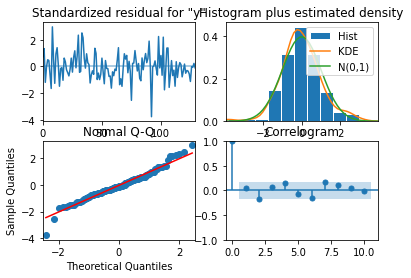

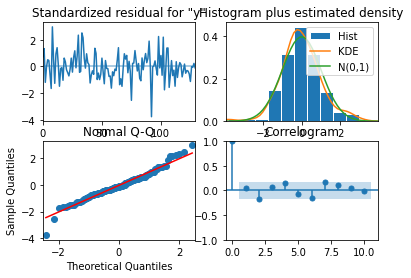

In [22]:
model_fit.plot_diagnostics()

<AxesSubplot:>

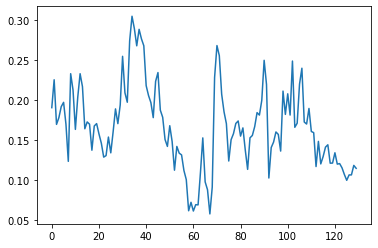

In [37]:
data["muslim_neg_share"].plot()

<AxesSubplot:>

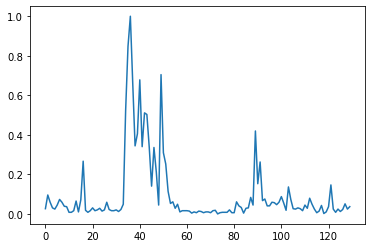

In [7]:
data["riot"].plot()

In [35]:
def make_delhi_riots_dummy(x):
    if x >= "2020-02-23" and x <= "2020-02-29":
        return 1
    else:
        return 0

In [36]:
def make_ramadan_dummy(x):
    if x == "2020-04-24":
        return 1
    else:
        return 0

In [37]:
data["ramadan"] = data["date"].apply(make_ramadan_dummy)

KeyError: 'date'

In [9]:
data["delhi_riots"] = data["date"].apply(make_delhi_riots_dummy)

In [13]:
data

date  muslim_neg_share       caa      riot  tablighi  ramzan  \
0    2020-01-22          0.190402  0.787565  0.026477  0.001414  0.0000   
1    2020-01-23          0.225343  0.689119  0.095723  0.000000  0.0000   
2    2020-01-24          0.169439  0.632124  0.059063  0.000000  0.0000   
3    2020-01-25          0.177839  0.419689  0.030550  0.000000  0.0250   
4    2020-01-26          0.191657  0.442142  0.024440  0.001414  0.0250   
5    2020-01-27          0.197055  1.000000  0.044807  0.001414  0.0625   
6    2020-01-28          0.169652  0.678756  0.073320  0.001414  0.0000   
7    2020-01-29          0.123106  0.715026  0.059063  0.000000  0.0000   
8    2020-01-30          0.232960  0.685665  0.038697  0.000000  0.0000   
9    2020-01-31          0.212460  0.727116  0.036660  0.000000  0.0500   
10   2020-02-01          0.163165  0.571675  0.008147  0.000000  0.0000   
11   2020-02-02          0.203457  0.450777  0.008147  0.000000  0.0000   
12   2020-02-03          0.232946  0.587219  0.016293  0.000000  0.0250   
13   2020-02-04          0.216703  0.537133  0.065173  0.000000  0.0000   
14   2020-02-05          0.163947  0.575130  0.010183  0.000000  0.0250   
15   2020-02-06          0.172509  0.587219  0.071283  0.000000  0.0250   
16   2020-02-07          0.169678  0.563040  0.266802  0.000000  0.0125   
17   2020-02-08          0.137067  0.310881  0.018330  0.001414  0.0000   
18   2020-02-09          0.167435  0.464594  0.008147  0.000000  0.0375   
19   2020-02-10          0.170428  0.658031  0.016293  0.000000  0.0000   
20   2020-02-11          0.157394  0.343696  0.030550  0.000000  0.0125   
21   2020-02-12          0.145850  0.360967  0.016293  0.007072  0.0000   
22   2020-02-13          0.128432  0.531952  0.020367  0.002829  0.0000   
23   2020-02-14          0.130309  0.395509  0.028513  0.000000  0.0000   
24   2020-02-15          0.153558  0.369603  0.014257  0.002829  0.0000   
25   2020-02-16          0.133772  0.262522  0.020367  0.001414  0.0250   
26   2020-02-17          0.160216  0.511226  0.059063  0.001414  0.0000   
27   2020-02-18          0.188845  0.354059  0.022403  0.002829  0.0125   
28   2020-02-19          0.170370  0.708117  0.016293  0.000000  0.0125   
29   2020-02-20          0.193769  0.485320  0.016293  0.000000  0.0125   
30   2020-02-21          0.254717  0.523316  0.020367  0.001414  0.0000   
31   2020-02-22          0.209035  0.373057  0.012220  0.000000  0.0000   
32   2020-02-23          0.197183  0.499136  0.022403  0.001414  0.0250   
33   2020-02-24          0.274070  0.758204  0.048880  0.000000  0.0000   
34   2020-02-25          0.304940  0.804836  0.523422  0.000000  0.0000   
35   2020-02-26          0.289375  0.544041  0.847251  0.000000  0.0000   
36   2020-02-27          0.267888  0.350604  1.000000  0.000000  0.0000   
37   2020-02-28          0.288530  0.298791  0.663951  0.000000  0.0250   
38   2020-02-29          0.276623  0.231434  0.344196  0.001414  0.0000   
39   2020-03-01          0.267952  0.348877  0.405295  0.004243  0.0375   
40   2020-03-02          0.217958  0.279793  0.678208  0.000000  0.0000   
41   2020-03-03          0.205615  0.397237  0.340122  0.002829  0.0000   
42   2020-03-04          0.196707  0.208981  0.511202  0.000000  0.0000   
43   2020-03-05          0.177904  0.297064  0.503055  0.000000  0.0000   
44   2020-03-06          0.223342  0.319516  0.338086  0.000000  0.0125   
45   2020-03-07          0.234375  0.189983  0.140530  0.002829  0.0000   
46   2020-03-08          0.187266  0.319516  0.336049  0.001414  0.0125   
47   2020-03-09          0.178325  0.290155  0.211813  0.000000  0.0000   
48   2020-03-10          0.150499  0.098446  0.044807  0.000000  0.0000   
49   2020-03-11          0.141837  0.219344  0.704684  0.000000  0.0000   
50   2020-03-12          0.167779  0.395509  0.309572  0.001414  0.0125   
51   2020-03-13          0.148052  0.259067  0.252546  0.000000  0.0000   
52   2020-03-14          0.112030  0

In [411]:
data["delhi_riots"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [57]:
order, sorder, trend = [(1, 0, 1), (0, 0, 0, 0), "c"]
exog = np.column_stack([data["caa"], data["delhi_riots"], data["tablighi"], data["ramadan"], data["lockdown_days"]])
model = SARIMAX(endog = data["muslim_neg_share"].values, order = order, sorder = sorder, trend = trend, exog = exog)
model_fit = model.fit(disp = False, method = "nm", maxiter = 10000)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 276.401
Date:                Wed, 07 Sep 2022   AIC                           -534.802
Time:                        11:18:29   BIC                           -508.994
Sample:                             0   HQIC                          -524.315
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0182      0.009      1.999      0.046       0.000       0.036
x1             0.0536      0.030      1.776      0.076      -0.006       0.113
x2             0.0240      0.017      1.400      0.161      -0.010       0.058
x3             0.1418      0.032      4.415      0.000       0.079       0.205
x4            -0.0809      0.023     -3.529      0.000      -0.126      -0.036
x5            -0.0003      0.001     -0.403      0.687      -0.002       0.001
ar.L1          0.8775      0.061     14.337      0.000       0.758       0.997
ma.L1         -0.3160      0.115     -2.743      0.006      -0.542      -0.090
sigma2         0.0008      0.000      7.582      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 4.17
Prob(Q):                              0.68   Prob(JB):                         0.12
Heteroskedasticity (H):               0.83   Skew:                             0.41
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

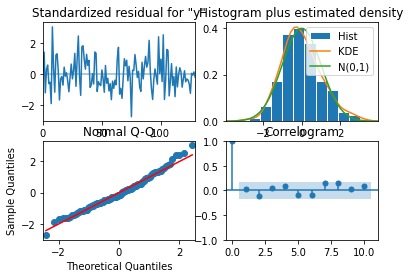

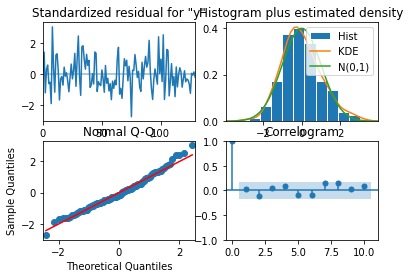

In [45]:
model_fit.plot_diagnostics()

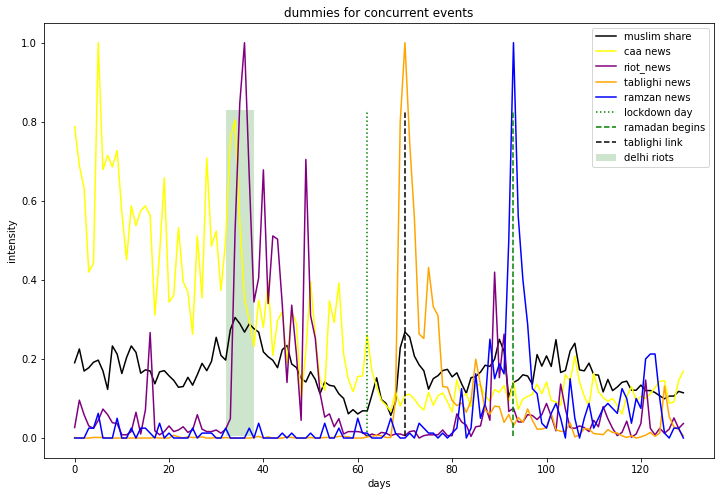

In [14]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(data["muslim_neg_share"].values, color = "black", label = "muslim share")
ax.plot(data["caa"].values, color = "yellow", label = "caa news")
ax.plot(data["riot"].values, color = "purple", label = "riot_news")
ax.plot(data["tablighi"].values, color = "orange", label = "tablighi news")
ax.plot(data["ramzan"].values, color = "blue", label = "ramzan news")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "intensity", title = "dummies for concurrent events")
ax.legend()

In [58]:
#finding out model specification which minimizes mape

In [59]:
#first we try with dummies : caa, delhi_riots, tablighi, ramadan

In [24]:
data.set_index(data["date"], inplace = True)

In [25]:
data

date  muslim_neg_share       caa      riot  tablighi  \
date                                                                     
2020-01-22  2020-01-22          0.190402  0.787565  0.026477  0.001414   
2020-01-23  2020-01-23          0.225343  0.689119  0.095723  0.000000   
2020-01-24  2020-01-24          0.169439  0.632124  0.059063  0.000000   
2020-01-25  2020-01-25          0.177839  0.419689  0.030550  0.000000   
2020-01-26  2020-01-26          0.191657  0.442142  0.024440  0.001414   
2020-01-27  2020-01-27          0.197055  1.000000  0.044807  0.001414   
2020-01-28  2020-01-28          0.169652  0.678756  0.073320  0.001414   
2020-01-29  2020-01-29          0.123106  0.715026  0.059063  0.000000   
2020-01-30  2020-01-30          0.232960  0.685665  0.038697  0.000000   
2020-01-31  2020-01-31          0.212460  0.727116  0.036660  0.000000   
2020-02-01  2020-02-01          0.163165  0.571675  0.008147  0.000000   
2020-02-02  2020-02-02          0.203457  0.450777  0.008147  0.000000   
2020-02-03  2020-02-03          0.232946  0.587219  0.016293  0.000000   
2020-02-04  2020-02-04          0.216703  0.537133  0.065173  0.000000   
2020-02-05  2020-02-05          0.163947  0.575130  0.010183  0.000000   
2020-02-06  2020-02-06          0.172509  0.587219  0.071283  0.000000   
2020-02-07  2020-02-07          0.169678  0.563040  0.266802  0.000000   
2020-02-08  2020-02-08          0.137067  0.310881  0.018330  0.001414   
2020-02-09  2020-02-09          0.167435  0.464594  0.008147  0.000000   
2020-02-10  2020-02-10          0.170428  0.658031  0.016293  0.000000   
2020-02-11  2020-02-11          0.157394  0.343696  0.030550  0.000000   
2020-02-12  2020-02-12          0.145850  0.360967  0.016293  0.007072   
2020-02-13  2020-02-13          0.128432  0.531952  0.020367  0.002829   
2020-02-14  2020-02-14          0.130309  0.395509  0.028513  0.000000   
2020-02-15  2020-02-15          0.153558  0.369603  0.014257  0.002829   
2020-02-16  2020-02-16          0.133772  0.262522  0.020367  0.001414   
2020-02-17  2020-02-17          0.160216  0.511226  0.059063  0.001414   
2020-02-18  2020-02-18          0.188845  0.354059  0.022403  0.002829   
2020-02-19  2020-02-19          0.170370  0.708117  0.016293  0.000000   
2020-02-20  2020-02-20          0.193769  0.485320  0.016293  0.000000   
2020-02-21  2020-02-21          0.254717  0.523316  0.020367  0.001414   
2020-02-22  2020-02-22          0.209035  0.373057  0.012220  0.000000   
2020-02-23  2020-02-23          0.197183  0.499136  0.022403  0.001414   
2020-02-24  2020-02-24          0.274070  0.758204  0.048880  0.000000   
2020-02-25  2020-02-25          0.304940  0.804836  0.523422  0.000000   
2020-02-26  2020-02-26          0.289375  0.544041  0.847251  0.000000   
2020-02-27  2020-02-27          0.267888  0.350604  1.000000  0.000000   
2020-02-28  2020-02-28          0.288530  0.298791  0.663951  0.000000   
2020-02-29  2020-02-29          0.276623  0.231434  0.344196  0.001414   
2020-03-01  2020-03-01          0.267952  0.348877  0.405295  0.004243   
2020-03-02  2020-03-02          0.217958  0.279793  0.678208  0.000000   
2020-03-03  2020-03-03          0.205615  0.397237  0.340122  0.002829   
2020-03-04  2020-03-04          0.196707  0.208981  0.511202  0.000000   
2020-03-05  2020-03-05          0.177904  0.297064  0.503055  0.000000   
2020-03-06  2020-03-06          0.223342  0.319516  0.338086  0.000000   
2020-03-07  2020-03-07          0.234375  0.189983  0.140530  0.002829   
2020-03-08  2020-03-08          0.187266  0.319516  0.336049  0.001414   
2020-03-09  2020-03-09          0.178325  0.290155  0.211813  0.000000   
2020-03-10  2020-03-10          0.150499  0.098446  0.044807  0.000000   
2020-03-11  2020-03-11          0.141837  0.219344  0.704684  0.000000   
2020-03-12  2020-03-12          0.167779  0.395509  0.309572  0.001414   
2020-03-13  2020-03-13          0.148052  0.259067  0.252546  0.000000   
2020-03-14  2020-03-14

In [26]:
class mape_hyperparameter_search:
    
    def __init__(self, some_data, n_test,cfg_list, endog):
        self.data = some_data
        self.n_test = n_test
        self.cfg_list = cfg_list
        self.endog = endog
        self.rel_models = self.model_search()
        self.save_output = self.save_output()
        
     
    @staticmethod
    def split_data(_data, n_test):
        return _data.iloc[:-n_test, :], _data.iloc[-n_test:, :]
    
    @staticmethod
    def measure_mape(actual, predicted):
        return mean_absolute_percentage_error(actual, predicted)
    
    @staticmethod
    def sarima_forecast(history, config, exog_train, exog_test):
        order, sorder, trend = config
        model = SARIMAX(history, order = order, seasonal_order = sorder, trend = trend, exog = exog_train)
        model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
        y_hat = model_fit.predict(len(history), len(history), exog = exog_test)
        return y_hat[0]
    

    def walk_forward_validation(self, train_data, test_data, endog, cfg):
        predictions = []
        history = [x for x in train_data[endog].values]
        exog_train = np.column_stack([train_data["caa"], train_data["delhi_riots"], train_data["tablighi"], train_data["ramadan"]])
        for i in range(len(test_data[endog].values)):
            exog_test = np.array([test_data["caa"][i], test_data["delhi_riots"][i], test_data["tablighi"][i], test_data["ramadan"][i]])
            predicted = self.sarima_forecast(history, cfg, exog_train, exog_test)
            predictions.append(predicted)
            history.append(test_data[endog].values[i])
            exog_train = np.vstack([exog_train, exog_test])
        mape = self.measure_mape(test_data[endog].values, predictions)
        return mape
        
    
    def model_search(self):
        rel_models = []
        train, test = self.split_data(self.data, self.n_test)
        exog_train = np.column_stack([train["caa"], train["delhi_riots"], train["tablighi"], train["ramadan"]])
        with catch_warnings():
            filterwarnings("ignore")
            for cfg in self.cfg_list:
                try:
                    order, sorder, trend = cfg
                    model = SARIMAX(endog = train[self.endog].values, order = order, seasonal_order = sorder, trend = trend, exog = exog_train)
                    model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
                    p_value_list = None
                    if trend == "n":
                        p_value_list = model_fit.pvalues[4:][:-1]
                    elif trend == "c" or "t" :
                        p_value_list = model_fit.pvalues[5:][:-1]
                        p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[0])
                    else:
                        p_value_list = model_fit.pvalues[6:][:-1]
                        p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[:2])
                    p_vals_mask = [p_val <= 0.05 for p_val in p_value_list]
                    if p_value_list is not None and sum(p_vals_mask) == len(p_vals_mask):
                        mape = self.walk_forward_validation(train, test, self.endog, cfg)
                        rel_models.append((cfg, mape))
                        print("Model > [%s]%.3f"%(str(str(cfg)), mape))
                    else:
                        pass
                except:
                    pass
        return rel_models
    
    def save_output(self):
        with open("C:\\Users\\rahul\\Complete thesis data\\Models\\mape4_1.pkl", "wb") as f:
            pickle.dump(self.rel_models, f)

In [28]:
def sarima_configs(seasonal = [0, 7]):
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0, 1]
    q_params = [0, 1, 2, 3]
    t_params = ["n","c", "t", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0, 1]
    Q_params = [0, 1, 2, 3]
    m_params = seasonal
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [29]:
cfg_list = sarima_configs()
endog = "muslim_neg_share"
n_test = 5

In [30]:
len(cfg_list)

8192

In [31]:
t = time()
four_exog_search = mape_hyperparameter_search(data, n_test, cfg_list, endog)
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'n']]0.396
Model > [[(0, 0, 0), (0, 0, 0, 7), 'n']]0.396
Model > [[(0, 0, 0), (0, 0, 1, 7), 'n']]0.203
Model > [[(0, 0, 0), (0, 0, 2, 7), 'n']]0.151
Model > [[(0, 0, 0), (0, 0, 3, 7), 'n']]0.238
Model > [[(0, 0, 0), (0, 1, 0, 7), 'n']]0.217
Model > [[(0, 0, 0), (1, 0, 0, 7), 'n']]0.147
Model > [[(0, 0, 0), (2, 1, 2, 7), 'n']]0.198
Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]0.388
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]0.388
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]0.352
Model > [[(0, 0, 0), (0, 0, 3, 7), 'c']]0.281
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]0.326
Model > [[(0, 0, 0), (2, 0, 0, 7), 'c']]0.335
Model > [[(0, 0, 0), (0, 0, 0, 0), 't']]0.771
Model > [[(0, 0, 0), (0, 0, 0, 7), 't']]0.771
Model > [[(0, 0, 0), (0, 0, 1, 7), 't']]0.652
Model > [[(0, 0, 0), (1, 0, 0, 7), 't']]0.603
Model > [[(0, 0, 1), (0, 0, 0, 0), 'n']]0.319
Model > [[(0, 0, 1), (0, 0, 0, 7), 'n']]0.319
Model > [[(0, 0, 1), (0, 0, 1, 7), 'n']]0.173
Model > [[(0, 0, 1), (0, 0, 2, 7),

In [21]:
four_exog_search.rel_models

[]

In [32]:
four_exog_search.rel_models.sort(key = lambda tup: tup[1])

In [33]:
four_exog_search.rel_models

[([(0, 0, 3), (1, 0, 0, 7), 'n'], 0.0814743734649764),
 ([(2, 1, 2), (0, 0, 1, 7), 'n'], 0.08833322331798901),
 ([(1, 1, 0), (0, 1, 0, 7), 'n'], 0.09196622122682506),
 ([(0, 0, 2), (1, 0, 0, 7), 'n'], 0.09313835568107819),
 ([(0, 1, 0), (0, 0, 1, 7), 'n'], 0.0947933120721134),
 ([(1, 0, 3), (1, 0, 0, 7), 'n'], 0.09490528132806937),
 ([(1, 0, 0), (0, 1, 0, 7), 'n'], 0.09657106341371566),
 ([(0, 1, 0), (0, 1, 0, 7), 'n'], 0.09692502008748129),
 ([(1, 0, 0), (0, 0, 1, 7), 'n'], 0.09939650281955931),
 ([(0, 1, 2), (0, 0, 0, 0), 'n'], 0.09949160280708255),
 ([(0, 1, 2), (0, 0, 0, 7), 'n'], 0.09949160280708255),
 ([(0, 1, 0), (0, 0, 2, 7), 'n'], 0.10030039322839616),
 ([(2, 1, 0), (0, 1, 0, 7), 'n'], 0.10243854845356007),
 ([(0, 1, 1), (0, 1, 0, 7), 'n'], 0.10272206816940006),
 ([(0, 1, 2), (0, 1, 0, 7), 'n'], 0.10469377201407822),
 ([(0, 0, 1), (1, 0, 0, 7), 'n'], 0.10475092626482882),
 ([(1, 0, 2), (0, 0, 0, 0), 'n'], 0.10507647358122493),
 ([(1, 0, 2), (0, 0, 0, 7), 'n'], 0.10507647358122

In [34]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final arima dummies.pkl", "wb") as f:
    pickle.dump(data, f)

In [327]:
order, sorder, trend = [(1, 0, 0), (0, 0, 0, 0), 'c']
exog = np.column_stack([data["caa"], data["delhi_riots"], data["tablighi"], data["ramadan"]])
model = SARIMAX(endog = data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 273.747
Date:                Thu, 08 Sep 2022   AIC                           -533.494
Time:                        12:12:57   BIC                           -513.421
Sample:                             0   HQIC                          -525.338
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0351      0.010      3.606      0.000       0.016       0.054
x1             0.0513      0.026      2.007      0.045       0.001       0.101
x2             0.0202      0.021      0.944      0.345      -0.022       0.062
x3             0.1220      0.029      4.217      0.000       0.065       0.179
x4            -0.0774      0.025     -3.144      0.002      -0.126      -0.029
ar.L1          0.7574      0.059     12.793      0.000       0.641       0.873
sigma2         0.0009      0.000      7.894      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.39   Jarque-Bera (JB):                 6.93
Prob(Q):                              0.24   Prob(JB):                         0.03
Heteroskedasticity (H):               0.82   Skew:                             0.51
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [222]:
errors = model_fit.resid

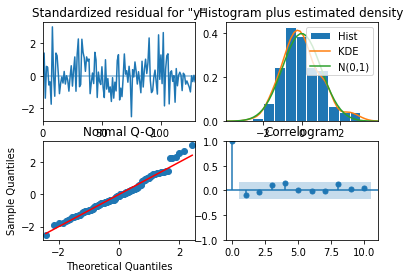

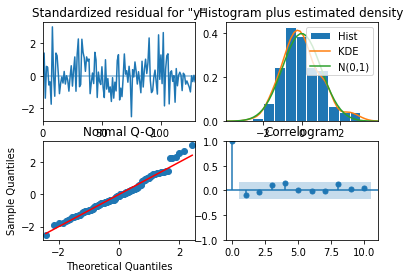

In [223]:
model_fit.plot_diagnostics()

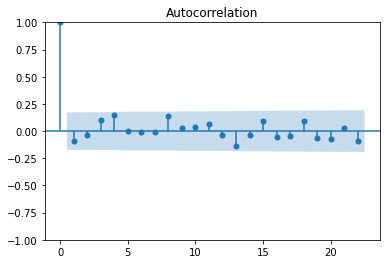

In [224]:
acf_plot = plot_acf(errors)

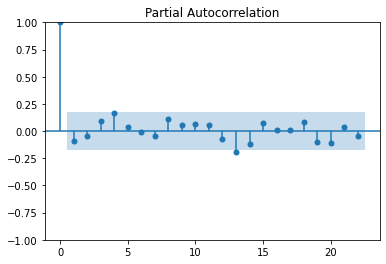

In [225]:
pacf_plot = plot_pacf(errors, method = "ywm")

In [226]:
sq_errors = np.square(errors)

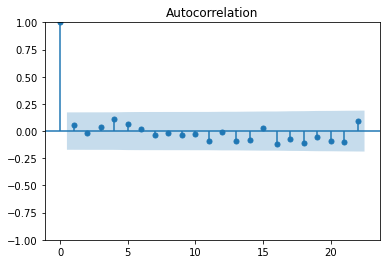

In [227]:
acf_plot = plot_acf(sq_errors)

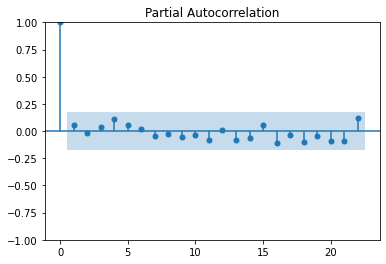

In [228]:
pacf_plot = plot_pacf(sq_errors, method = "ywm")

In [187]:
p_vals = model_fit.pvalues

In [188]:
p_vals_list = p_vals[6:][:-1]

In [189]:
p_vals_list = np.insert(p_vals_list, 0, p_vals[:2])

In [190]:
p_vals_list

array([8.25463333e-05, 3.53902723e-01, 4.76569192e-36, 2.20641636e-02])

In [191]:
p_vals_mask = [p_val <= 0.05 for p_val in p_vals_list]

In [192]:
p_vals_mask

[True, False, True, True]

In [193]:
len(p_vals_mask) == sum(p_vals_mask)

False

In [196]:
if p_value_list is not None and len(p_vals_mask) == sum(p_vals_mask):
    print("Yes")
else:
    print("No")

No


In [119]:
#now we try with dummies : caa, riot, tablighi, ramzan

In [299]:
class mape_hyperparameter_search:
    
    def __init__(self, some_data, n_test,cfg_list, endog):
        self.data = some_data
        self.n_test = n_test
        self.cfg_list = cfg_list
        self.endog = endog
        self.rel_models = self.model_search()
        self.save_output = self.save_output()
        
     
    @staticmethod
    def split_data(_data, n_test):
        return _data.iloc[:-n_test, :], _data.iloc[-n_test:, :]
    
    @staticmethod
    def measure_mape(actual, predicted):
        return mean_absolute_percentage_error(actual, predicted)
    
    @staticmethod
    def sarima_forecast(history, config, exog_train, exog_test):
        order, sorder, trend = config
        model = SARIMAX(history, order = order, seasonal_order = sorder, trend = trend, exog = exog_train)
        model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
        y_hat = model_fit.predict(len(history), len(history), exog = exog_test)
        return y_hat[0]
    

    def walk_forward_validation(self, train_data, test_data, endog, cfg):
        predictions = []
        history = [x for x in train_data[endog].values]
        exog_train = np.column_stack([train_data["caa"], train_data["riot"], train_data["tablighi"], train_data["ramzan"]])
        for i in range(len(test_data[endog].values)):
            exog_test = np.array([test_data["caa"][i], test_data["riot"][i], test_data["tablighi"][i], test_data["ramzan"][i]])
            predicted = self.sarima_forecast(history, cfg, exog_train, exog_test)
            predictions.append(predicted)
            history.append(test_data[endog].values[i])
            exog_train = np.vstack([exog_train, exog_test])
        mape = self.measure_mape(test_data[endog].values, predictions)
        return mape
        
    
    def model_search(self):
        rel_models = []
        train, test = self.split_data(self.data, self.n_test)
        exog_train = np.column_stack([train["caa"], train["riot"], train["tablighi"], train["ramzan"]])
        with catch_warnings():
            filterwarnings("ignore")
            for cfg in self.cfg_list:
                try:
                    order, sorder, trend = cfg
                    model = SARIMAX(endog = train[self.endog].values, order = order, seasonal_order = sorder, trend = trend, exog = exog_train)
                    model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
                    p_value_list = None
                    if trend == "n":
                        p_value_list = model_fit.pvalues[4:][:-1]
                    elif trend == "c" or "t" :
                        p_value_list = model_fit.pvalues[5:][:-1]
                        p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[0])
                    else:
                        p_value_list = model_fit.pvalues[6:][:-1]
                        p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[:2])
                    p_vals_mask = [p_val <= 0.05 for p_val in p_value_list]
                    if p_value_list is not None and sum(p_vals_mask) == len(p_vals_mask):
                        mape = self.walk_forward_validation(train, test, self.endog, cfg)
                        rel_models.append((cfg, mape))
                        print("Model > [%s]%.3f"%(str(str(cfg)), mape))
                    else:
                        pass
                except:
                    pass
        return rel_models
    
    def save_output(self):
        with open("C:\\Users\\rahul\\Complete thesis data\\Models\\mape4_2.pkl", "wb") as f:
            pickle.dump(self.rel_models, f)

In [314]:
cfg_list = sarima_configs()
endog = "muslim_neg_share"
n_test = 5

In [313]:
def sarima_configs(seasonal = [0, 7]):
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0]
    q_params = [0, 1, 2, 3]
    t_params = ["c", "t", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0]
    Q_params = [0, 1, 2, 3]
    m_params = seasonal
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [315]:
len(cfg_list)

1536

In [316]:
t = time()
four_exog_search = mape_hyperparameter_search(data, n_test, cfg_list, endog)
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]0.316
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]0.316
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]0.314
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]0.281
Model > [[(0, 0, 0), (0, 0, 0, 0), 't']]0.683
Model > [[(0, 0, 0), (0, 0, 0, 7), 't']]0.683
Model > [[(0, 0, 0), (0, 0, 1, 7), 't']]0.595
Model > [[(0, 0, 0), (1, 0, 0, 7), 't']]0.554
Model > [[(0, 0, 1), (0, 0, 0, 0), 'c']]0.248
Model > [[(0, 0, 1), (0, 0, 0, 7), 'c']]0.248
Model > [[(0, 0, 1), (0, 0, 1, 7), 'c']]0.232
Model > [[(0, 0, 1), (1, 0, 0, 7), 'c']]0.220
Model > [[(0, 0, 1), (0, 0, 0, 0), 't']]0.533
Model > [[(0, 0, 1), (0, 0, 0, 7), 't']]0.533
Model > [[(0, 0, 1), (0, 0, 1, 7), 't']]0.469
Model > [[(0, 0, 1), (1, 0, 0, 7), 't']]0.437
Model > [[(0, 0, 2), (0, 0, 0, 0), 'c']]0.207
Model > [[(0, 0, 2), (0, 0, 0, 7), 'c']]0.207
Model > [[(0, 0, 2), (0, 0, 1, 7), 'c']]0.190
Model > [[(0, 0, 2), (1, 0, 0, 7), 'c']]0.184
Model > [[(0, 0, 2), (0, 0, 1, 7), 'ct']]0.225
Model > [[(0, 0, 3), (0, 0, 0, 0)

In [317]:
four_exog_search.rel_models.sort(key = lambda tup: tup[1])

In [318]:
four_exog_search.rel_models

[([(1, 0, 0), (0, 0, 1, 7), 'c'], 0.10737032868964749),
 ([(1, 0, 0), (1, 0, 0, 7), 'c'], 0.1097312251063108),
 ([(1, 0, 0), (1, 0, 1, 7), 'c'], 0.11045915964857118),
 ([(1, 0, 0), (0, 0, 0, 0), 'c'], 0.11744363381556604),
 ([(1, 0, 0), (0, 0, 0, 7), 'c'], 0.11744363381556604),
 ([(0, 0, 3), (1, 0, 0, 7), 'c'], 0.17434299199358633),
 ([(0, 0, 2), (1, 0, 0, 7), 'c'], 0.18386450340378108),
 ([(0, 0, 2), (0, 0, 1, 7), 'c'], 0.18988669448013806),
 ([(0, 0, 3), (0, 0, 0, 0), 'c'], 0.19747319709201447),
 ([(0, 0, 3), (0, 0, 0, 7), 'c'], 0.19747319709201447),
 ([(0, 0, 2), (0, 0, 0, 0), 'c'], 0.20669231189523501),
 ([(0, 0, 2), (0, 0, 0, 7), 'c'], 0.20669231189523501),
 ([(0, 0, 1), (1, 0, 0, 7), 'c'], 0.21966141389219124),
 ([(0, 0, 2), (0, 0, 1, 7), 'ct'], 0.22549046643932963),
 ([(0, 0, 1), (0, 0, 1, 7), 'c'], 0.23228276183083568),
 ([(0, 0, 1), (0, 0, 0, 0), 'c'], 0.24790184595651427),
 ([(0, 0, 1), (0, 0, 0, 7), 'c'], 0.24790184595651427),
 ([(0, 0, 0), (1, 0, 0, 7), 'c'], 0.280760335284

In [319]:
order, sorder, trend = [(1, 0, 0), (0, 0, 1, 7), 'c']
exog = np.column_stack([data["caa"], data["riot"], data["tablighi"], data["ramzan"]])
model = SARIMAX(endog = data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = exog)
model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  130
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 7)   Log Likelihood                 272.004
Date:                             Thu, 08 Sep 2022   AIC                           -528.007
Time:                                     11:34:48   BIC                           -505.067
Sample:                                          0   HQIC                          -518.686
                                             - 130                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0407      0.011      3.850      0.000       0.020       0.061
x1             0.0565      0.027      2.104      0.035       0.004       0.109
x2             0.0049      0.025      0.193      0.847      -0.045       0.055
x3             0.1246      0.028      4.505      0.000       0.070       0.179
x4            -0.0011      0.031     -0.035      0.972      -0.063       0.060
ar.L1          0.7158      0.062     11.484      0.000       0.594       0.838
ma.S.L7        0.2844      0.102      2.784      0.005       0.084       0.485
sigma2         0.0009      0.000      7.982      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 3.32
Prob(Q):                              0.43   Prob(JB):                         0.19
Heteroskedasticity (H):               1.04   Skew:                             0.23
Prob(H) (two-sided):                  0.91   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [320]:
#now we try with dummies : caa, delhi_riots, tablighi and ramzan

In [321]:
class mape_hyperparameter_search:
    
    def __init__(self, some_data, n_test,cfg_list, endog):
        self.data = some_data
        self.n_test = n_test
        self.cfg_list = cfg_list
        self.endog = endog
        self.rel_models = self.model_search()
        self.save_output = self.save_output()
        
     
    @staticmethod
    def split_data(_data, n_test):
        return _data.iloc[:-n_test, :], _data.iloc[-n_test:, :]
    
    @staticmethod
    def measure_mape(actual, predicted):
        return mean_absolute_percentage_error(actual, predicted)
    
    @staticmethod
    def sarima_forecast(history, config, exog_train, exog_test):
        order, sorder, trend = config
        model = SARIMAX(history, order = order, seasonal_order = sorder, trend = trend, exog = exog_train)
        model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
        y_hat = model_fit.predict(len(history), len(history), exog = exog_test)
        return y_hat[0]
    

    def walk_forward_validation(self, train_data, test_data, endog, cfg):
        predictions = []
        history = [x for x in train_data[endog].values]
        exog_train = np.column_stack([train_data["caa"], train_data["delhi_riots"], train_data["tablighi"], train_data["ramzan"]])
        for i in range(len(test_data[endog].values)):
            exog_test = np.array([test_data["caa"][i], test_data["delhi_riots"][i], test_data["tablighi"][i], test_data["ramzan"][i]])
            predicted = self.sarima_forecast(history, cfg, exog_train, exog_test)
            predictions.append(predicted)
            history.append(test_data[endog].values[i])
            exog_train = np.vstack([exog_train, exog_test])
        mape = self.measure_mape(test_data[endog].values, predictions)
        return mape
        
    
    def model_search(self):
        rel_models = []
        train, test = self.split_data(self.data, self.n_test)
        exog_train = np.column_stack([train["caa"], train["delhi_riots"], train["tablighi"], train["ramzan"]])
        with catch_warnings():
            filterwarnings("ignore")
            for cfg in self.cfg_list:
                try:
                    order, sorder, trend = cfg
                    model = SARIMAX(endog = train[self.endog].values, order = order, seasonal_order = sorder, trend = trend, exog = exog_train)
                    model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
                    p_value_list = None
                    if trend == "n":
                        p_value_list = model_fit.pvalues[4:][:-1]
                    elif trend == "c" or "t" :
                        p_value_list = model_fit.pvalues[5:][:-1]
                        p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[0])
                    else:
                        p_value_list = model_fit.pvalues[6:][:-1]
                        p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[:2])
                    p_vals_mask = [p_val <= 0.05 for p_val in p_value_list]
                    if p_value_list is not None and sum(p_vals_mask) == len(p_vals_mask):
                        mape = self.walk_forward_validation(train, test, self.endog, cfg)
                        rel_models.append((cfg, mape))
                        print("Model > [%s]%.3f"%(str(str(cfg)), mape))
                    else:
                        pass
                except:
                    pass
        return rel_models
    
    def save_output(self):
        with open("C:\\Users\\rahul\\Complete thesis data\\Models\\mape4_3.pkl", "wb") as f:
            pickle.dump(self.rel_models, f)

In [404]:
def sarima_configs(seasonal = [0, 7]):
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0, 1]
    q_params = [0, 1, 2, 3]
    t_params = ["c", "t", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0, 1]
    Q_params = [0, 1, 2, 3]
    m_params = seasonal
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [405]:
cfg_list = sarima_configs()
endog = "muslim_neg_share"
n_test = 5

In [406]:
cfg_list = sarima_configs()
endog = "muslim_neg_share"
n_test = 5
t = time()
four_exog_search = mape_hyperparameter_search(data, n_test, cfg_list, endog)
print("time taken: {} mins".format(round((time() - t)/60, 2)))

KeyError: 'delhi_riots'

In [325]:
four_exog_search.rel_models.sort(key = lambda tup: tup[1])
four_exog_search.rel_models

[([(1, 0, 0), (1, 0, 0, 7), 'c'], 0.10888375906491632),
 ([(1, 0, 0), (0, 0, 1, 7), 'c'], 0.10998110628498628),
 ([(1, 0, 0), (0, 0, 0, 0), 'c'], 0.12144219026496465),
 ([(1, 0, 0), (0, 0, 0, 7), 'c'], 0.12144219026496465),
 ([(0, 0, 2), (1, 0, 0, 7), 'c'], 0.1860584757218915),
 ([(0, 0, 2), (0, 0, 1, 7), 'c'], 0.19138431493454972),
 ([(0, 0, 2), (2, 0, 1, 7), 'c'], 0.19681373400831853),
 ([(0, 0, 3), (0, 0, 0, 0), 'c'], 0.2019096768117361),
 ([(0, 0, 3), (0, 0, 0, 7), 'c'], 0.2019096768117361),
 ([(0, 0, 2), (0, 0, 0, 0), 'c'], 0.20962513996137577),
 ([(0, 0, 2), (0, 0, 0, 7), 'c'], 0.20962513996137577),
 ([(0, 0, 0), (2, 0, 1, 7), 'c'], 0.21864574458765804),
 ([(0, 0, 1), (1, 0, 0, 7), 'c'], 0.23631551759042574),
 ([(0, 0, 3), (1, 0, 0, 7), 't'], 0.2400727990869294),
 ([(0, 0, 1), (2, 0, 0, 7), 'c'], 0.24332592210221557),
 ([(0, 0, 1), (0, 0, 1, 7), 'c'], 0.24724288608814046),
 ([(0, 0, 1), (0, 0, 0, 0), 'c'], 0.2667815832064609),
 ([(0, 0, 1), (0, 0, 0, 7), 'c'], 0.2667815832064609)

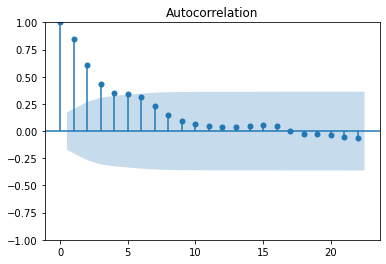

In [329]:
acf_plot = plot_acf(data["tablighi"].values)

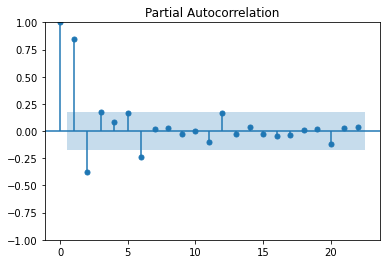

In [330]:
pacf_plot = plot_pacf(data["tablighi"].values, method = "ywm")

In [332]:
import pmdarima as pm

In [469]:
model = pm.arima.AutoARIMA(
    start_p = 1,
    start_1 = 1,
    test = "adf",
    max_order = None,
    method= "nm",
    maxiter = 1000)

In [470]:
model_fit = model.fit(data["tablighi_share"].values)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 379.223
Date:                Thu, 08 Sep 2022   AIC                           -754.445
Time:                        19:06:05   BIC                           -748.725
Sample:                             0   HQIC                          -752.121
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3481      0.059      5.905      0.000       0.233       0.464
sigma2         0.0002   4.69e-06     34.843      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):             16589.57
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):             128.51   Skew:                             5.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        57.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [467]:
order, sorder, trend = [(1, 1, 5), (0, 0, 0, 0), 'n']
model = SARIMAX(endog = data["tablighi"].values, order = order, seasonal_order = sorder, trend = trend)
model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 1, 5)   Log Likelihood                 161.172
Date:                Thu, 08 Sep 2022   AIC                           -308.344
Time:                        19:04:14   BIC                           -288.325
Sample:                             0   HQIC                          -300.210
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6357      0.265     -2.398      0.016      -1.155      -0.116
ma.L1          0.9793      0.279      3.506      0.000       0.432       1.527
ma.L2          0.0191      0.171      0.112      0.911      -0.316       0.354
ma.L3         -0.3912      0.134     -2.924      0.003      -0.653      -0.129
ma.L4         -0.6000      0.138     -4.341      0.000      -0.871      -0.329
ma.L5         -0.4433      0.112     -3.961      0.000      -0.663      -0.224
sigma2         0.0048      0.000     20.738      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             25179.83
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):             286.36   Skew:                             6.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        70.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

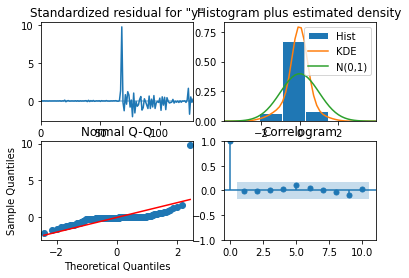

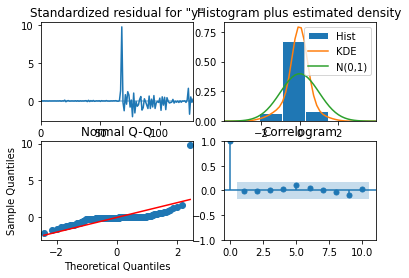

In [468]:
model_fit.plot_diagnostics()

In [346]:
tablighi_data = pd.DataFrame()

In [347]:
tablighi_data["tablighi"] = data["tablighi"]

In [350]:
tablighi_data["date"] = data["date"]

In [351]:
pd.set_option("display.max_rows", None)

In [25]:
with open("C:\\Users\\rahul\\Complete thesis data\Models\\final_arima_data.pkl", "rb") as f:
    data = pickle.load(f)

In [8]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final_news_daily_details.pkl", "rb") as f:
    news = pickle.load(f)

In [26]:
data

date  muslim_neg_share       caa      riot  tablighi  ramzan  \
0    2020-01-22          0.190402  0.787565  0.026477  0.001414  0.0000   
1    2020-01-23          0.225343  0.689119  0.095723  0.000000  0.0000   
2    2020-01-24          0.169439  0.632124  0.059063  0.000000  0.0000   
3    2020-01-25          0.177839  0.419689  0.030550  0.000000  0.0250   
4    2020-01-26          0.191657  0.442142  0.024440  0.001414  0.0250   
5    2020-01-27          0.197055  1.000000  0.044807  0.001414  0.0625   
6    2020-01-28          0.169652  0.678756  0.073320  0.001414  0.0000   
7    2020-01-29          0.123106  0.715026  0.059063  0.000000  0.0000   
8    2020-01-30          0.232960  0.685665  0.038697  0.000000  0.0000   
9    2020-01-31          0.212460  0.727116  0.036660  0.000000  0.0500   
10   2020-02-01          0.163165  0.571675  0.008147  0.000000  0.0000   
11   2020-02-02          0.203457  0.450777  0.008147  0.000000  0.0000   
12   2020-02-03          0.232946  0.587219  0.016293  0.000000  0.0250   
13   2020-02-04          0.216703  0.537133  0.065173  0.000000  0.0000   
14   2020-02-05          0.163947  0.575130  0.010183  0.000000  0.0250   
15   2020-02-06          0.172509  0.587219  0.071283  0.000000  0.0250   
16   2020-02-07          0.169678  0.563040  0.266802  0.000000  0.0125   
17   2020-02-08          0.137067  0.310881  0.018330  0.001414  0.0000   
18   2020-02-09          0.167435  0.464594  0.008147  0.000000  0.0375   
19   2020-02-10          0.170428  0.658031  0.016293  0.000000  0.0000   
20   2020-02-11          0.157394  0.343696  0.030550  0.000000  0.0125   
21   2020-02-12          0.145850  0.360967  0.016293  0.007072  0.0000   
22   2020-02-13          0.128432  0.531952  0.020367  0.002829  0.0000   
23   2020-02-14          0.130309  0.395509  0.028513  0.000000  0.0000   
24   2020-02-15          0.153558  0.369603  0.014257  0.002829  0.0000   
25   2020-02-16          0.133772  0.262522  0.020367  0.001414  0.0250   
26   2020-02-17          0.160216  0.511226  0.059063  0.001414  0.0000   
27   2020-02-18          0.188845  0.354059  0.022403  0.002829  0.0125   
28   2020-02-19          0.170370  0.708117  0.016293  0.000000  0.0125   
29   2020-02-20          0.193769  0.485320  0.016293  0.000000  0.0125   
30   2020-02-21          0.254717  0.523316  0.020367  0.001414  0.0000   
31   2020-02-22          0.209035  0.373057  0.012220  0.000000  0.0000   
32   2020-02-23          0.197183  0.499136  0.022403  0.001414  0.0250   
33   2020-02-24          0.274070  0.758204  0.048880  0.000000  0.0000   
34   2020-02-25          0.304940  0.804836  0.523422  0.000000  0.0000   
35   2020-02-26          0.289375  0.544041  0.847251  0.000000  0.0000   
36   2020-02-27          0.267888  0.350604  1.000000  0.000000  0.0000   
37   2020-02-28          0.288530  0.298791  0.663951  0.000000  0.0250   
38   2020-02-29          0.276623  0.231434  0.344196  0.001414  0.0000   
39   2020-03-01          0.267952  0.348877  0.405295  0.004243  0.0375   
40   2020-03-02          0.217958  0.279793  0.678208  0.000000  0.0000   
41   2020-03-03          0.205615  0.397237  0.340122  0.002829  0.0000   
42   2020-03-04          0.196707  0.208981  0.511202  0.000000  0.0000   
43   2020-03-05          0.177904  0.297064  0.503055  0.000000  0.0000   
44   2020-03-06          0.223342  0.319516  0.338086  0.000000  0.0125   
45   2020-03-07          0.234375  0.189983  0.140530  0.002829  0.0000   
46   2020-03-08          0.187266  0.319516  0.336049  0.001414  0.0125   
47   2020-03-09          0.178325  0.290155  0.211813  0.000000  0.0000   
48   2020-03-10          0.150499  0.098446  0.044807  0.000000  0.0000   
49   2020-03-11          0.141837  0.219344  0.704684  0.000000  0.0000   
50   2020-03-12          0.167779  0.395509  0.309572  0.001414  0.0125   
51   2020-03-13          0.148052  0.259067  0.252546  0.000000  0.0000   
52   2020-03-14          0.112030  0

In [9]:
news

date  all_news  caa_news  riot_news  covid_news  tablighi_news  \
0    2020-01-22      3874       456         13         120              1   
1    2020-01-23      3796       399         47         147              0   
2    2020-01-24      3727       366         29         208              0   
3    2020-01-25      2943       243         15         193              0   
4    2020-01-26      2756       256         12         138              1   
5    2020-01-27      3402       579         22         218              1   
6    2020-01-28      3698       393         36         286              1   
7    2020-01-29      3815       414         29         314              0   
8    2020-01-30      3794       397         19         302              0   
9    2020-01-31      3859       421         18         297              0   
10   2020-02-01      5340       331          4         185              0   
11   2020-02-02      2691       261          4         293              0   
12   2020-02-03      3652       340          8         304              0   
13   2020-02-04      3545       311         32         261              0   
14   2020-02-05      3923       333          5         194              0   
15   2020-02-06      3947       340         35         189              0   
16   2020-02-07      3761       326        131         238              0   
17   2020-02-08      3638       180          9         170              1   
18   2020-02-09      2587       269          4         202              0   
19   2020-02-10      3647       381          8         208              0   
20   2020-02-11      5270       199         15         138              0   
21   2020-02-12      3897       209          8         169              5   
22   2020-02-13      4163       308         10         294              2   
23   2020-02-14      3845       229         14         208              0   
24   2020-02-15      2550       214          7         165              2   
25   2020-02-16      2426       152         10         140              1   
26   2020-02-17      3446       296         29         267              1   
27   2020-02-18      3633       205         11         268              2   
28   2020-02-19      3555       410          8         186              0   
29   2020-02-20      3641       281          8         179              0   
30   2020-02-21      3519       303         10         179              1   
31   2020-02-22      2501       216          6         143              0   
32   2020-02-23      2490       289         11         163              1   
33   2020-02-24      4123       439         24         191              0   
34   2020-02-25      4289       466        257         211              0   
35   2020-02-26      4023       315        416         224              0   
36   2020-02-27      3690       203        491         248              0   
37   2020-02-28      3770       173        326         264              0   
38   2020-02-29      2496       134        169         223              1   
39   2020-03-01      2326       202        199         212              3   
40   2020-03-02      3681       162        333         415              0   
41   2020-03-03      4226       230        167        1078              2   
42   2020-03-04      4311       121        251        1331              0   
43   2020-03-05      3870       172        247        1022              0   
44   2020-03-06      4799       185        166         906              0   
45   2020-03-07      2626       110         69         518              2   
46   2020-03-08      2712       185        165         402              1   
47   2020-03-09      3373       168        104         807              0   
48   2020-03-10      2513        57         22         515              0   
49   2020-03-11      3902       127        346         865              0   
50   2020-03-12      4011       229        152        1802              1   
51   20

In [27]:
data["caa_share"] = news["caa_news"]/news["all_news"]
data["riot_share"] = news["riot_news"]/news["all_news"]
data["covid_share"] = news["covid_news"]/news["all_news"]
data["tablighi_share"] = news["tablighi_news"]/news["all_news"]
data["ramzan_share"] = news["ramzan_news"]/news["all_news"]

In [21]:
data.drop(columns = ["caa_share", "riot_share", "covid_share", "tablighi_share", "ramzan_share"], inplace = True)

In [30]:
data

muslim_neg_share       caa      riot  tablighi  ramzan  lockdown  \
date                                                                           
2020-01-22          0.190402  0.787565  0.026477  0.001414  0.0000         0   
2020-01-23          0.225343  0.689119  0.095723  0.000000  0.0000         0   
2020-01-24          0.169439  0.632124  0.059063  0.000000  0.0000         0   
2020-01-25          0.177839  0.419689  0.030550  0.000000  0.0250         0   
2020-01-26          0.191657  0.442142  0.024440  0.001414  0.0250         0   
2020-01-27          0.197055  1.000000  0.044807  0.001414  0.0625         0   
2020-01-28          0.169652  0.678756  0.073320  0.001414  0.0000         0   
2020-01-29          0.123106  0.715026  0.059063  0.000000  0.0000         0   
2020-01-30          0.232960  0.685665  0.038697  0.000000  0.0000         0   
2020-01-31          0.212460  0.727116  0.036660  0.000000  0.0500         0   
2020-02-01          0.163165  0.571675  0.008147  0.000000  0.0000         0   
2020-02-02          0.203457  0.450777  0.008147  0.000000  0.0000         0   
2020-02-03          0.232946  0.587219  0.016293  0.000000  0.0250         0   
2020-02-04          0.216703  0.537133  0.065173  0.000000  0.0000         0   
2020-02-05          0.163947  0.575130  0.010183  0.000000  0.0250         0   
2020-02-06          0.172509  0.587219  0.071283  0.000000  0.0250         0   
2020-02-07          0.169678  0.563040  0.266802  0.000000  0.0125         0   
2020-02-08          0.137067  0.310881  0.018330  0.001414  0.0000         0   
2020-02-09          0.167435  0.464594  0.008147  0.000000  0.0375         0   
2020-02-10          0.170428  0.658031  0.016293  0.000000  0.0000         0   
2020-02-11          0.157394  0.343696  0.030550  0.000000  0.0125         0   
2020-02-12          0.145850  0.360967  0.016293  0.007072  0.0000         0   
2020-02-13          0.128432  0.531952  0.020367  0.002829  0.0000         0   
2020-02-14          0.130309  0.395509  0.028513  0.000000  0.0000         0   
2020-02-15          0.153558  0.369603  0.014257  0.002829  0.0000         0   
2020-02-16          0.133772  0.262522  0.020367  0.001414  0.0250         0   
2020-02-17          0.160216  0.511226  0.059063  0.001414  0.0000         0   
2020-02-18          0.188845  0.354059  0.022403  0.002829  0.0125         0   
2020-02-19          0.170370  0.708117  0.016293  0.000000  0.0125         0   
2020-02-20          0.193769  0.485320  0.016293  0.000000  0.0125         0   
2020-02-21          0.254717  0.523316  0.020367  0.001414  0.0000         0   
2020-02-22          0.209035  0.373057  0.012220  0.000000  0.0000         0   
2020-02-23          0.197183  0.499136  0.022403  0.001414  0.0250         0   
2020-02-24          0.274070  0.758204  0.048880  0.000000  0.0000         0   
2020-02-25          0.304940  0.804836  0.523422  0.000000  0.0000         0   
2020-02-26          0.289375  0.544041  0.847251  0.000000  0.0000         0   
2020-02-27          0.267888  0.350604  1.000000  0.000000  0.0000         0   
2020-02-28          0.288530  0.298791  0.663951  0.000000  0.0250         0   
2020-02-29          0.276623  0.231434  0.344196  0.001414  0.0000         0   
2020-03-01          0.267952  0.348877  0.405295  0.004243  0.0375         0   
2020-03-02          0.217958  0.279793  0.678208  0.000000  0.0000         0   
2020-03-03          0.205615  0.397237  0.340122  0.002829  0.0000         0   
2020-03-04          0.196707  0.208981  0.511202  0.000000  0.0000         0   
2020-03-05          0.177904  0.297064  0.503055  0.000000  0.0000         0   
2020-03-06          0.223342  0.319516  0.338086  0.000000  0.0125         0   
2020-03-07          0.234375  0.189983  0.140530  0.002829  0.0000         0   
2020-03-08          0.187266  0.319516  0.336049  0.001414  0.0125         0   
2020-03-09          0.178325  0.290155  0.211813  0.000000  0.0000         0   
2020-03-10  

In [29]:
data.set_index(keys = "date", inplace = True)

In [31]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final arima data.pkl", "wb") as f:
    pickle.dump(data, f)

In [ ]:
with open("")

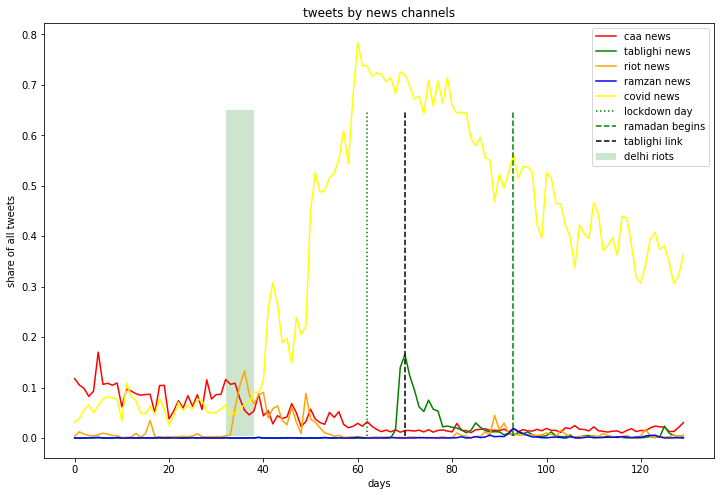

In [362]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(data["caa_share"], color = "red", label = "caa news")
ax.plot(data["tablighi_share"], color = "green", label = "tablighi news")
ax.plot(data["riot_share"], color = "orange", label = "riot news")
ax.plot(data["ramzan_share"], color = "blue", label = "ramzan news")
ax.plot(data["covid_share"], color = "yellow", label = "covid news")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "share of all tweets", title = "tweets by news channels")
ax.legend()

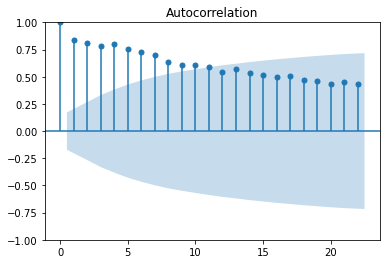

In [365]:
acf_plot = plot_acf(data["caa_share"].values)

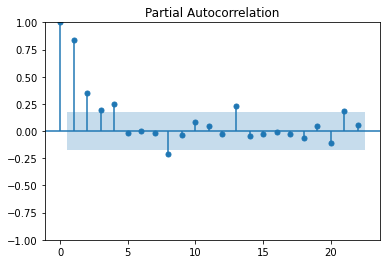

In [366]:
pacf_plot = plot_pacf(data["caa_share"].values, method = "ywm")

In [391]:
pm.arima.ndiffs(data["ramzan_share"], test = "adf")

0

In [370]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [395]:
dftest = adfuller(data["ramzan_share"].values, autolag = "AIC", regression = "n")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)

1. ADF :  -3.842537849615157
2. P-value :  0.00013521844815542764
3. num of lags :  1
4. num of observations used for ADF regression and critical value condition :  128
5. critical values : 
	 1% :  -2.5834285620117186
	 5% :  -1.9432889325141907
	 10% :  -1.6148985549163817


In [402]:
kpss_test = kpss(data["ramzan_share"].values, regression = "c")

In [403]:
kpss_test

(0.5537670793276726,
 0.02955696411538906,
 5,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [416]:
order, sorder, trend = [(1, 1, 0), (0, 0, 0, 0), 'n']
model = SARIMAX(endog = data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend, exog = data["tablighi_share"].values)
model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 260.796
Date:                Thu, 08 Sep 2022   AIC                           -515.592
Time:                        15:31:06   BIC                           -507.012
Sample:                             0   HQIC                          -512.106
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9003      0.214      4.205      0.000       0.481       1.320
ar.L1         -0.2265      0.088     -2.580      0.010      -0.399      -0.054
sigma2         0.0010   9.66e-05     10.621      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                13.04
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.10
Prob(H) (two-sided):                  0.96   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [417]:
muslim_diff = data["muslim_neg_share"].diff()

In [418]:
tablighi_diff = data["tablighi_share"].diff()

In [420]:
muslim_diff = muslim_diff[1:]

In [422]:
tablighi_diff = tablighi_diff[1:]

In [427]:
order, sorder, trend = [(1, 0, 0), (0, 0, 0, 0), 'n']
model = SARIMAX(endog = muslim_diff.values, order = order, seasonal_order = sorder, trend = trend, exog = tablighi_diff.values)
model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 260.796
Date:                Thu, 08 Sep 2022   AIC                           -515.592
Time:                        15:41:46   BIC                           -507.012
Sample:                             0   HQIC                          -512.106
                                - 129                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9003      0.214      4.205      0.000       0.481       1.320
ar.L1         -0.2265      0.088     -2.580      0.010      -0.399      -0.054
sigma2         0.0010   9.66e-05     10.621      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                13.04
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.10
Prob(H) (two-sided):                  0.96   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

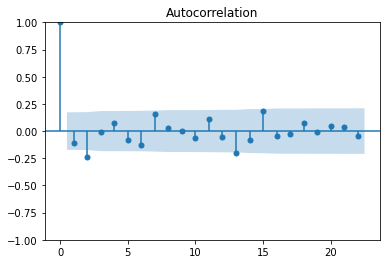

In [428]:
acf_plot = plot_acf(muslim_diff)

C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


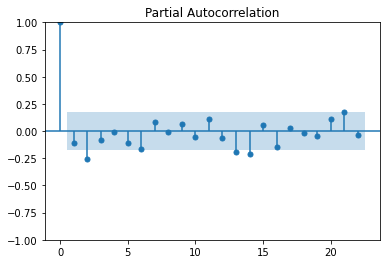

In [429]:
pacf_plot = plot_pacf(muslim_diff)

In [434]:
tablighi_dd = tablighi_diff.diff()

In [436]:
tablighi_dd = tablighi_dd[1:]

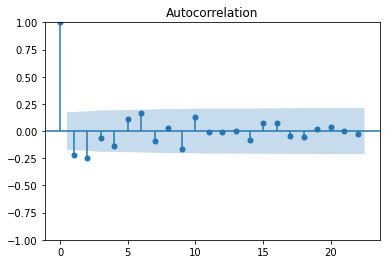

In [437]:
acf_plot = plot_acf(tablighi_dd)

C:\Users\rahul\miniconda3\envs\Thesis\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


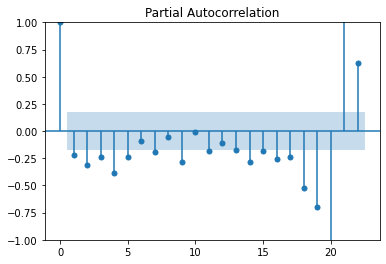

In [438]:
pacf_plot = plot_pacf(tablighi_dd)

In [471]:
order, sorder, trend = [(0, 0, 0), (0, 0, 0, 0), 'c']
model = SARIMAX(endog = data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend)
model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:                        SARIMAX   Log Likelihood                 199.792
Date:                Thu, 08 Sep 2022   AIC                           -395.583
Time:                        19:12:28   BIC                           -389.848
Sample:                             0   HQIC                          -393.253
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1664      0.005     35.292      0.000       0.157       0.176
sigma2         0.0027      0.000      7.619      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                  80.14   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.00   Prob(JB):                         0.26
Heteroskedasticity (H):               0.56   Skew:                             0.35
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [472]:
resid = model_fit.resid

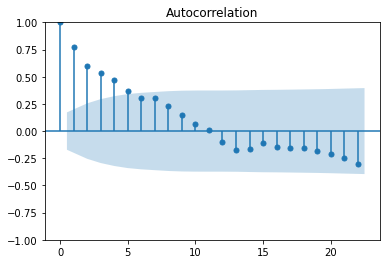

In [473]:
acf_plot = plot_acf(resid)

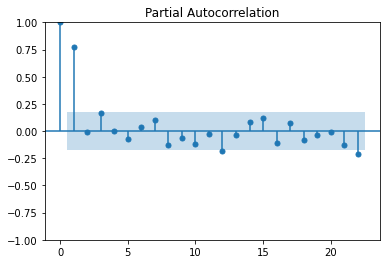

In [474]:
pacf_plot = plot_pacf(resid, method = "ywm")

In [475]:
order, sorder, trend = [(0, 1, 0), (0, 0, 0, 0), 'c']
model = SARIMAX(endog = data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend)
model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 250.980
Date:                Thu, 08 Sep 2022   AIC                           -497.960
Time:                        19:12:44   BIC                           -492.241
Sample:                             0   HQIC                          -495.636
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.003     -0.189      0.850      -0.007       0.006
sigma2         0.0012      0.000     11.591      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.67   Jarque-Bera (JB):                34.73
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.46
Prob(H) (two-sided):                  0.92   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [476]:
resid = model_fit.resid

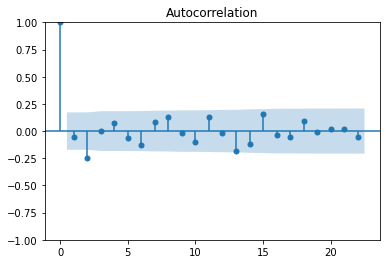

In [477]:
acf_plot = plot_acf(resid)

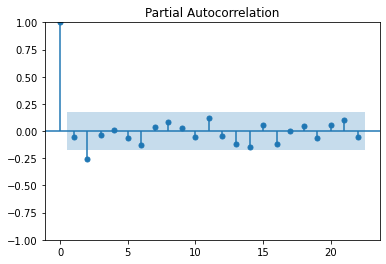

In [478]:
pacf_plot = plot_pacf(resid, method = "ywm")

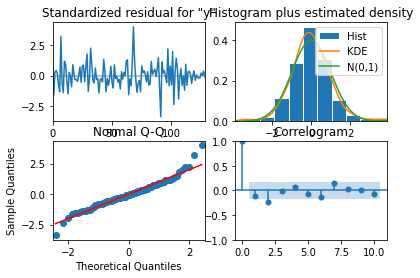

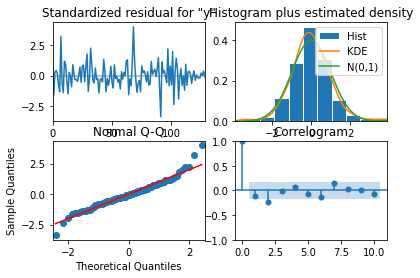

In [479]:
model_fit.plot_diagnostics()

In [480]:
order, sorder, trend = [(0, 2, 0), (0, 0, 0, 0), 'c']
model = SARIMAX(endog = data["muslim_neg_share"].values, order = order, seasonal_order = sorder, trend = trend)
model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  130
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 197.593
Date:                Thu, 08 Sep 2022   AIC                           -391.187
Time:                        19:13:11   BIC                           -385.482
Sample:                             0   HQIC                          -388.869
                                - 130                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0003      0.005     -0.066      0.948      -0.009       0.009
sigma2         0.0027      0.000      9.416      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                  24.70   Jarque-Bera (JB):                 3.68
Prob(Q):                              0.00   Prob(JB):                         0.16
Heteroskedasticity (H):               1.14   Skew:                             0.13
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [481]:
resid = model_fit.resid

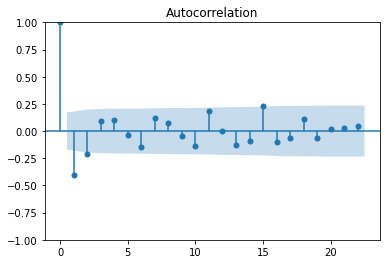

In [482]:
acf_plot = plot_acf(resid)

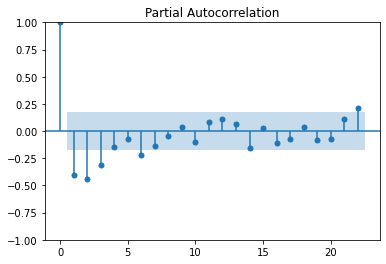

In [483]:
pacf_plot = plot_pacf(resid, method = "ywm")

In [487]:
dftest = adfuller(tablighi_diff, autolag = "AIC", regression = "ct")
print("1. ADF : ", dftest[0])
print("2. P-value : ", dftest[1])
print("3. num of lags : ", dftest[2])
print("4. num of observations used for ADF regression and critical value condition : ", dftest[3])
print("5. critical values : ")
for key, value in dftest[4].items():
    print("\t", key, ": ", value)

1. ADF :  -7.462992853804631
2. P-value :  1.2397715403746681e-09
3. num of lags :  3
4. num of observations used for ADF regression and critical value condition :  125
5. critical values : 
	 1% :  -4.03308287936
	 5% :  -3.4462147354879997
	 10% :  -3.14799745856


In [488]:
model = pm.arima.AutoARIMA(
    start_p = 1,
    start_1 = 1,
    test = "kpss",
    max_order = None,
    method= "nm",
    maxiter = 1000)

In [489]:
model_fit = model.fit(tablighi_diff)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 379.223
Date:                Thu, 08 Sep 2022   AIC                           -754.445
Time:                        19:22:11   BIC                           -748.725
Sample:                             0   HQIC                          -752.121
                                - 129                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3481      0.059      5.905      0.000       0.233       0.464
sigma2         0.0002   4.69e-06     34.843      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):             16589.57
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):             128.51   Skew:                             5.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        57.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [490]:
#finding model for muslim_neg_share without any exog parameters

In [503]:
class mape_hyperparameter_search:
    
    def __init__(self, some_data, n_test,cfg_list, endog):
        self.data = some_data
        self.n_test = n_test
        self.cfg_list = cfg_list
        self.endog = endog
        self.rel_models = self.model_search()
        self.save_output = self.save_output()
        
     
    @staticmethod
    def split_data(_data, n_test):
        return _data.iloc[:-n_test, :], _data.iloc[-n_test:, :]
    
    @staticmethod
    def measure_mape(actual, predicted):
        return mean_absolute_percentage_error(actual, predicted)
    
    @staticmethod
    def sarima_forecast(history, config):
        order, sorder, trend = config
        model = SARIMAX(history, order = order, seasonal_order = sorder, trend = trend)
        model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
        y_hat = model_fit.predict(len(history), len(history))
        return y_hat[0]
    

    def walk_forward_validation(self, train_data, test_data, endog, cfg):
        predictions = []
        history = [x for x in train_data[endog].values]
        for i in range(len(test_data[endog].values)):
            predicted = self.sarima_forecast(history, cfg)
            predictions.append(predicted)
            history.append(test_data[endog].values[i])
        mape = self.measure_mape(test_data[endog].values, predictions)
        return mape
        
    
    def model_search(self):
        rel_models = []
        train, test = self.split_data(self.data, self.n_test)
        with catch_warnings():
            filterwarnings("ignore")
            for cfg in self.cfg_list:
                try:
                    order, sorder, trend = cfg
                    model = SARIMAX(endog = train[self.endog].values, order = order, seasonal_order = sorder, trend = trend)
                    model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
                    p_value_list = None
                    p_value_list = model_fit.pvalues[:-1]
                    p_vals_mask = [p_val <= 0.05 for p_val in p_value_list]
                    if p_value_list is not None and sum(p_vals_mask) == len(p_vals_mask):
                        mape = self.walk_forward_validation(train, test, self.endog, cfg)
                        rel_models.append((cfg, mape))
                        print("Model > [%s]%.3f"%(str(str(cfg)), mape))
                    else:
                        pass
                except:
                    pass
        return rel_models
    
    def save_output(self):
        with open("C:\\Users\\rahul\\Complete thesis data\\Models\\mape0_1.pkl", "wb") as f:
            pickle.dump(self.rel_models, f)

In [504]:
def sarima_configs(seasonal = [0, 7]):
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0, 1]
    q_params = [0, 1, 2, 3]
    t_params = ["n", "c", "t", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0, 1]
    Q_params = [0, 1, 2, 3]
    m_params = seasonal
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [505]:
cfg_list = sarima_configs()
endog = "muslim_neg_share"
n_test = 5
t = time()
four_exog_search = mape_hyperparameter_search(data, n_test, cfg_list, endog)
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'n']]1.000
Model > [[(0, 0, 0), (0, 0, 0, 7), 'n']]1.000
Model > [[(0, 0, 0), (0, 0, 1, 7), 'n']]0.517
Model > [[(0, 0, 0), (0, 0, 2, 7), 'n']]0.349
Model > [[(0, 0, 0), (0, 0, 3, 7), 'n']]0.528
Model > [[(0, 0, 0), (0, 1, 0, 7), 'n']]0.137
Model > [[(0, 0, 0), (0, 1, 1, 7), 'n']]0.505
Model > [[(0, 0, 0), (1, 0, 0, 7), 'n']]0.089
Model > [[(0, 0, 0), (1, 0, 1, 7), 'n']]0.491
Model > [[(0, 0, 0), (1, 0, 2, 7), 'n']]0.446
Model > [[(0, 0, 0), (2, 0, 1, 7), 'n']]0.398
Model > [[(0, 0, 0), (2, 1, 0, 7), 'n']]0.322
Model > [[(0, 0, 0), (3, 0, 3, 7), 'n']]0.238
Model > [[(0, 0, 0), (3, 1, 0, 7), 'n']]0.335
Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]0.548
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]0.548
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]0.437
Model > [[(0, 0, 0), (0, 0, 2, 7), 'c']]0.525
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]0.422
Model > [[(0, 0, 0), (1, 0, 1, 7), 'c']]0.478
Model > [[(0, 0, 0), (2, 0, 0, 7), 'c']]0.481
Model > [[(0, 0, 0), (0, 0, 0, 0),

In [506]:
four_exog_search.rel_models.sort(key = lambda tup: tup[1])
four_exog_search.rel_models

[([(0, 1, 1), (0, 0, 0, 0), 'n'], 0.052011996689591035),
 ([(0, 1, 1), (0, 0, 0, 7), 'n'], 0.052011996689591035),
 ([(1, 0, 2), (0, 0, 0, 0), 'n'], 0.0528174292903749),
 ([(1, 0, 2), (0, 0, 0, 7), 'n'], 0.0528174292903749),
 ([(0, 1, 0), (0, 0, 0, 0), 'n'], 0.054027713512144804),
 ([(0, 1, 0), (0, 0, 0, 7), 'n'], 0.054027713512144804),
 ([(2, 0, 1), (2, 0, 3, 7), 'n'], 0.05530396299013268),
 ([(0, 1, 2), (0, 0, 0, 0), 'n'], 0.05573120832353183),
 ([(0, 1, 2), (0, 0, 0, 7), 'n'], 0.05573120832353183),
 ([(1, 0, 0), (0, 0, 0, 0), 'n'], 0.05718537765308879),
 ([(1, 0, 0), (0, 0, 0, 7), 'n'], 0.05718537765308879),
 ([(1, 0, 1), (0, 0, 0, 0), 'n'], 0.05739983958755934),
 ([(1, 0, 1), (0, 0, 0, 7), 'n'], 0.05739983958755934),
 ([(0, 1, 0), (0, 0, 2, 7), 'n'], 0.060998882465653895),
 ([(0, 1, 0), (0, 1, 1, 7), 'n'], 0.0682338013025029),
 ([(0, 1, 1), (0, 0, 2, 7), 'n'], 0.07095663480267814),
 ([(1, 0, 1), (0, 0, 2, 7), 'n'], 0.0713874485831309),
 ([(0, 0, 1), (1, 0, 0, 7), 'n'], 0.07805157734

In [5]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\final arima data.pkl", "rb") as f:
    data = pickle.load(f)

In [6]:
pd.set_option("display.max_rows", None)

In [7]:
data

date  muslim_neg_share       caa      riot  tablighi  \
date                                                                     
2020-01-22  2020-01-22          0.190402  0.787565  0.026477  0.001414   
2020-01-23  2020-01-23          0.225343  0.689119  0.095723  0.000000   
2020-01-24  2020-01-24          0.169439  0.632124  0.059063  0.000000   
2020-01-25  2020-01-25          0.177839  0.419689  0.030550  0.000000   
2020-01-26  2020-01-26          0.191657  0.442142  0.024440  0.001414   
2020-01-27  2020-01-27          0.197055  1.000000  0.044807  0.001414   
2020-01-28  2020-01-28          0.169652  0.678756  0.073320  0.001414   
2020-01-29  2020-01-29          0.123106  0.715026  0.059063  0.000000   
2020-01-30  2020-01-30          0.232960  0.685665  0.038697  0.000000   
2020-01-31  2020-01-31          0.212460  0.727116  0.036660  0.000000   
2020-02-01  2020-02-01          0.163165  0.571675  0.008147  0.000000   
2020-02-02  2020-02-02          0.203457  0.450777  0.008147  0.000000   
2020-02-03  2020-02-03          0.232946  0.587219  0.016293  0.000000   
2020-02-04  2020-02-04          0.216703  0.537133  0.065173  0.000000   
2020-02-05  2020-02-05          0.163947  0.575130  0.010183  0.000000   
2020-02-06  2020-02-06          0.172509  0.587219  0.071283  0.000000   
2020-02-07  2020-02-07          0.169678  0.563040  0.266802  0.000000   
2020-02-08  2020-02-08          0.137067  0.310881  0.018330  0.001414   
2020-02-09  2020-02-09          0.167435  0.464594  0.008147  0.000000   
2020-02-10  2020-02-10          0.170428  0.658031  0.016293  0.000000   
2020-02-11  2020-02-11          0.157394  0.343696  0.030550  0.000000   
2020-02-12  2020-02-12          0.145850  0.360967  0.016293  0.007072   
2020-02-13  2020-02-13          0.128432  0.531952  0.020367  0.002829   
2020-02-14  2020-02-14          0.130309  0.395509  0.028513  0.000000   
2020-02-15  2020-02-15          0.153558  0.369603  0.014257  0.002829   
2020-02-16  2020-02-16          0.133772  0.262522  0.020367  0.001414   
2020-02-17  2020-02-17          0.160216  0.511226  0.059063  0.001414   
2020-02-18  2020-02-18          0.188845  0.354059  0.022403  0.002829   
2020-02-19  2020-02-19          0.170370  0.708117  0.016293  0.000000   
2020-02-20  2020-02-20          0.193769  0.485320  0.016293  0.000000   
2020-02-21  2020-02-21          0.254717  0.523316  0.020367  0.001414   
2020-02-22  2020-02-22          0.209035  0.373057  0.012220  0.000000   
2020-02-23  2020-02-23          0.197183  0.499136  0.022403  0.001414   
2020-02-24  2020-02-24          0.274070  0.758204  0.048880  0.000000   
2020-02-25  2020-02-25          0.304940  0.804836  0.523422  0.000000   
2020-02-26  2020-02-26          0.289375  0.544041  0.847251  0.000000   
2020-02-27  2020-02-27          0.267888  0.350604  1.000000  0.000000   
2020-02-28  2020-02-28          0.288530  0.298791  0.663951  0.000000   
2020-02-29  2020-02-29          0.276623  0.231434  0.344196  0.001414   
2020-03-01  2020-03-01          0.267952  0.348877  0.405295  0.004243   
2020-03-02  2020-03-02          0.217958  0.279793  0.678208  0.000000   
2020-03-03  2020-03-03          0.205615  0.397237  0.340122  0.002829   
2020-03-04  2020-03-04          0.196707  0.208981  0.511202  0.000000   
2020-03-05  2020-03-05          0.177904  0.297064  0.503055  0.000000   
2020-03-06  2020-03-06          0.223342  0.319516  0.338086  0.000000   
2020-03-07  2020-03-07          0.234375  0.189983  0.140530  0.002829   
2020-03-08  2020-03-08          0.187266  0.319516  0.336049  0.001414   
2020-03-09  2020-03-09          0.178325  0.290155  0.211813  0.000000   
2020-03-10  2020-03-10          0.150499  0.098446  0.044807  0.000000   
2020-03-11  2020-03-11          0.141837  0.219344  0.704684  0.000000   
2020-03-12  2020-03-12          0.167779  0.395509  0.309572  0.001414   
2020-03-13  2020-03-13          0.148052  0.259067  0.252546  0.000000   
2020-03-14  2020-03-14

In [5]:
_data = pd.DataFrame()

In [6]:
_data["muslim_share"] = data["muslim_neg_share"]

In [8]:
_data["delhi_riots"] = data["delhi_riots"]

In [9]:
_data

muslim_share  delhi_riots
date                                 
2020-01-22      0.190402            0
2020-01-23      0.225343            0
2020-01-24      0.169439            0
2020-01-25      0.177839            0
2020-01-26      0.191657            0
2020-01-27      0.197055            0
2020-01-28      0.169652            0
2020-01-29      0.123106            0
2020-01-30      0.232960            0
2020-01-31      0.212460            0
2020-02-01      0.163165            0
2020-02-02      0.203457            0
2020-02-03      0.232946            0
2020-02-04      0.216703            0
2020-02-05      0.163947            0
2020-02-06      0.172509            0
2020-02-07      0.169678            0
2020-02-08      0.137067            0
2020-02-09      0.167435            0
2020-02-10      0.170428            0
2020-02-11      0.157394            0
2020-02-12      0.145850            0
2020-02-13      0.128432            0
2020-02-14      0.130309            0
2020-02-15      0.153558            0
2020-02-16      0.133772            0
2020-02-17      0.160216            0
2020-02-18      0.188845            0
2020-02-19      0.170370            0
2020-02-20      0.193769            0
2020-02-21      0.254717            0
2020-02-22      0.209035            0
2020-02-23      0.197183            1
2020-02-24      0.274070            1
2020-02-25      0.304940            1
2020-02-26      0.289375            1
2020-02-27      0.267888            1
2020-02-28      0.288530            1
2020-02-29      0.276623            1
2020-03-01      0.267952            0
2020-03-02      0.217958            0
2020-03-03      0.205615            0
2020-03-04      0.196707            0
2020-03-05      0.177904            0
2020-03-06      0.223342            0
2020-03-07      0.234375            0
2020-03-08      0.187266            0
2020-03-09      0.178325            0
2020-03-10      0.150499            0
2020-03-11      0.141837            0
2020-03-12      0.167779            0
2020-03-13      0.148052            0
2020-03-14      0.112030            0
2020-03-15      0.141809            0
2020-03-16      0.133392            0
2020-03-17      0.131208            0
2020-03-18      0.111658            0
2020-03-19      0.100226            0
2020-03-20      0.061212            0
2020-03-21      0.071798            0
2020-03-22      0.060874            0
2020-03-23      0.068833            0
2020-03-24      0.068584            0
2020-03-25      0.108839            0
2020-03-26      0.152507            0
2020-03-27      0.097376            0
2020-03-28      0.087525            0
2020-03-29      0.057256            0
2020-03-30      0.090754            0
2020-03-31      0.228209            0
2020-04-01      0.268194            0
2020-04-02      0.255566            0
2020-04-03      0.207233            0
2020-04-04      0.185169            0
2020-04-05      0.170310            0
2020-04-06      0.123554            0
2020-04-07      0.150292            0
2020-04-08      0.157767            0
2020-04-09      0.170637            0
2020-04-10      0.173712            0
2020-04-11      0.154762            0
2020-04-12      0.165034            0
2020-04-13      0.137382            0
2020-04-14      0.113082            0
2020-04-15      0.152608            0
2020-04-16      0.155546            0
2020-04-17      0.166667            0
2020-04-18      0.184169            0
2020-04-19      0.181106            0
2020-04-20      0.199588            0
2020-04-21      0.249722            0
2020-04-22      0.219541            0
2020-04-23      0.102245            0
2020-04-24      0.140447            0
2020-04-25      0.147260            0
2020-04-26      0.159978            0
2020-04-27      0.156871            0
2020-04-28      0.135987            0
2020-04-29      0.211157            0
2020-04-30      0.181936            0
2020-05-01      0.207760            0
2020-05-02      0.181115            0
2020-05-03      0.248799            0
2020-05-04      0.1657

In [10]:
#find minimal mape for delhi riots as exog

In [21]:
class mape_hyperparameter_search:
    
    def __init__(self, some_data, n_test,cfg_list, endog):
        self.data = some_data
        self.n_test = n_test
        self.cfg_list = cfg_list
        self.endog = endog
        self.rel_models = self.model_search()
        self.save_output = self.save_output()
        
     
    @staticmethod
    def split_data(_data, n_test):
        return _data.iloc[:-n_test, :], _data.iloc[-n_test:, :]
    
    @staticmethod
    def measure_mape(actual, predicted):
        return mean_absolute_percentage_error(actual, predicted)
    
    @staticmethod
    def sarima_forecast(history, config, exog_train, exog_test):
        order, sorder, trend = config
        model = SARIMAX(history, order = order, seasonal_order = sorder, trend = trend, exog = exog_train)
        model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
        y_hat = model_fit.predict(len(history), len(history), exog = exog_test)
        return y_hat[0]
    

    def walk_forward_validation(self, train_data, test_data, endog, cfg):
        predictions = []
        history = [x for x in train_data[endog].values]
        exog_train = train_data["delhi_riots"].values
        for i in range(len(test_data[endog].values)):
            exog_test = np.array([test_data["delhi_riots"][i]])
            predicted = self.sarima_forecast(history, cfg, exog_train, exog_test)
            predictions.append(predicted)
            history.append(test_data[endog].values[i])
            exog_train = np.append(exog_train, exog_test)
        mape = self.measure_mape(test_data[endog].values, predictions)
        return mape
        
    
    def model_search(self):
        rel_models = []
        train, test = self.split_data(self.data, self.n_test)
        exog_train = train["delhi_riots"].values
        with catch_warnings():
            filterwarnings("ignore")
            for cfg in self.cfg_list:
                try:
                    order, sorder, trend = cfg
                    model = SARIMAX(endog = train[self.endog].values, order = order, seasonal_order = sorder, trend = trend, exog = exog_train)
                    model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
                    p_value_list = None
                    if trend == "n":
                        p_value_list = model_fit.pvalues[1:][:-1]
                    elif trend == "c" or "t" :
                        p_value_list = model_fit.pvalues[2:][:-1]
                        p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[0])
                    else:
                        p_value_list = model_fit.pvalues[3:][:-1]
                        p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[:2])
                    p_vals_mask = [p_val <= 0.05 for p_val in p_value_list]
                    if p_value_list is not None and sum(p_vals_mask) == len(p_vals_mask):
                        mape = self.walk_forward_validation(train, test, self.endog, cfg)
                        rel_models.append((cfg, mape))
                        print("Model > [%s]%.3f"%(str(str(cfg)), mape))
                    else:
                        pass
                except:
                    pass
        return rel_models
    
    def save_output(self):
        with open("C:\\Users\\rahul\\Complete thesis data\\Models\\mape1_1.pkl", "wb") as f:
            pickle.dump(self.rel_models, f)

In [23]:
def sarima_configs(seasonal = [0, 7]):
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0, 1]
    q_params = [0, 1, 2, 3]
    t_params = ["n", "c", "t", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0, 1]
    Q_params = [0, 1, 2, 3]
    m_params = seasonal
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [24]:
cfg_list = sarima_configs()
endog = "muslim_neg_share"
n_test = 5
t = time()
four_exog_search = mape_hyperparameter_search(data, n_test, cfg_list, endog)
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'n']]1.000
Model > [[(0, 0, 0), (0, 0, 0, 7), 'n']]1.000
Model > [[(0, 0, 0), (0, 0, 1, 7), 'n']]0.537
Model > [[(0, 0, 0), (0, 0, 2, 7), 'n']]0.488
Model > [[(0, 0, 0), (0, 0, 3, 7), 'n']]0.433
Model > [[(0, 0, 0), (0, 1, 0, 7), 'n']]0.137
Model > [[(0, 0, 0), (1, 0, 0, 7), 'n']]0.092
Model > [[(0, 0, 0), (1, 0, 1, 7), 'n']]0.505
Model > [[(0, 0, 0), (1, 0, 2, 7), 'n']]0.432
Model > [[(0, 0, 0), (1, 1, 0, 7), 'n']]0.165
Model > [[(0, 0, 0), (2, 0, 0, 7), 'n']]0.121
Model > [[(0, 0, 0), (2, 0, 1, 7), 'n']]0.412
Model > [[(0, 0, 0), (2, 0, 2, 7), 'n']]0.443
Model > [[(0, 0, 0), (2, 1, 0, 7), 'n']]0.317
Model > [[(0, 0, 0), (3, 1, 0, 7), 'n']]0.355
Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]0.492
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]0.492
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]0.424
Model > [[(0, 0, 0), (2, 0, 0, 7), 'c']]0.470
Model > [[(0, 0, 0), (2, 0, 1, 7), 'c']]0.431
Model > [[(0, 0, 0), (0, 0, 0, 0), 't']]1.124
Model > [[(0, 0, 0), (0, 0, 0, 7),

In [25]:
four_exog_search.rel_models.sort(key = lambda tup: tup[1])
four_exog_search.rel_models

[([(0, 1, 1), (0, 0, 0, 0), 'n'], 0.05161671881747134),
 ([(0, 1, 1), (0, 0, 0, 7), 'n'], 0.05161671881747134),
 ([(1, 0, 2), (0, 0, 0, 0), 'n'], 0.05294442830063267),
 ([(1, 0, 2), (0, 0, 0, 7), 'n'], 0.05294442830063267),
 ([(0, 1, 0), (0, 0, 0, 0), 'n'], 0.05402771351214477),
 ([(0, 1, 0), (0, 0, 0, 7), 'n'], 0.05402771351214477),
 ([(2, 1, 0), (0, 0, 0, 0), 'n'], 0.054477058168660886),
 ([(2, 1, 0), (0, 0, 0, 7), 'n'], 0.054477058168660886),
 ([(0, 1, 2), (0, 0, 0, 0), 'n'], 0.05562657650654164),
 ([(0, 1, 2), (0, 0, 0, 7), 'n'], 0.05562657650654164),
 ([(1, 0, 0), (0, 0, 0, 0), 'n'], 0.05718263104236919),
 ([(1, 0, 0), (0, 0, 0, 7), 'n'], 0.05718263104236919),
 ([(1, 0, 1), (0, 0, 0, 0), 'n'], 0.05783845007900097),
 ([(1, 0, 1), (0, 0, 0, 7), 'n'], 0.05783845007900097),
 ([(0, 1, 0), (0, 0, 2, 7), 'n'], 0.06378461084558038),
 ([(0, 1, 0), (0, 1, 1, 7), 'n'], 0.0682290270855224),
 ([(0, 1, 1), (0, 0, 2, 7), 'n'], 0.07107711262306124),
 ([(1, 0, 1), (0, 0, 2, 7), 'n'], 0.07159689510

In [27]:
#finding mape for riot as exog

In [28]:
class mape_hyperparameter_search:
    
    def __init__(self, some_data, n_test,cfg_list, endog):
        self.data = some_data
        self.n_test = n_test
        self.cfg_list = cfg_list
        self.endog = endog
        self.rel_models = self.model_search()
        self.save_output = self.save_output()
        
     
    @staticmethod
    def split_data(_data, n_test):
        return _data.iloc[:-n_test, :], _data.iloc[-n_test:, :]
    
    @staticmethod
    def measure_mape(actual, predicted):
        return mean_absolute_percentage_error(actual, predicted)
    
    @staticmethod
    def sarima_forecast(history, config, exog_train, exog_test):
        order, sorder, trend = config
        model = SARIMAX(history, order = order, seasonal_order = sorder, trend = trend, exog = exog_train)
        model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
        y_hat = model_fit.predict(len(history), len(history), exog = exog_test)
        return y_hat[0]
    

    def walk_forward_validation(self, train_data, test_data, endog, cfg):
        predictions = []
        history = [x for x in train_data[endog].values]
        exog_train = train_data["riot"].values
        for i in range(len(test_data[endog].values)):
            exog_test = np.array([test_data["riot"][i]])
            predicted = self.sarima_forecast(history, cfg, exog_train, exog_test)
            predictions.append(predicted)
            history.append(test_data[endog].values[i])
            exog_train = np.append(exog_train, exog_test)
        mape = self.measure_mape(test_data[endog].values, predictions)
        return mape
        
    
    def model_search(self):
        rel_models = []
        train, test = self.split_data(self.data, self.n_test)
        exog_train = train["riot"].values
        with catch_warnings():
            filterwarnings("ignore")
            for cfg in self.cfg_list:
                try:
                    order, sorder, trend = cfg
                    model = SARIMAX(endog = train[self.endog].values, order = order, seasonal_order = sorder, trend = trend, exog = exog_train)
                    model_fit = model.fit(disp = False, method = "nm", maxiter = 1000)
                    p_value_list = None
                    if trend == "n":
                        p_value_list = model_fit.pvalues[1:][:-1]
                    elif trend == "c" or "t" :
                        p_value_list = model_fit.pvalues[2:][:-1]
                        p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[0])
                    else:
                        p_value_list = model_fit.pvalues[3:][:-1]
                        p_value_list = np.insert(p_value_list, 0, model_fit.pvalues[:2])
                    p_vals_mask = [p_val <= 0.05 for p_val in p_value_list]
                    if p_value_list is not None and sum(p_vals_mask) == len(p_vals_mask):
                        mape = self.walk_forward_validation(train, test, self.endog, cfg)
                        rel_models.append((cfg, mape))
                        print("Model > [%s]%.3f"%(str(str(cfg)), mape))
                    else:
                        pass
                except:
                    pass
        return rel_models
    
    def save_output(self):
        with open("C:\\Users\\rahul\\Complete thesis data\\Models\\mape1_2.pkl", "wb") as f:
            pickle.dump(self.rel_models, f)

In [29]:
def sarima_configs(seasonal = [0, 7]):
    models = []
    p_params = [0, 1, 2, 3]
    d_params = [0, 1]
    q_params = [0, 1, 2, 3]
    t_params = ["n", "c", "t", "ct"]
    P_params = [0, 1, 2, 3]
    D_params = [0, 1]
    Q_params = [0, 1, 2, 3]
    m_params = seasonal
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p, d, q), (P, D, Q, m), t]
                                    models.append(cfg)
    return models

In [30]:
cfg_list = sarima_configs()
endog = "muslim_neg_share"
n_test = 5
t = time()
riot_exog_search = mape_hyperparameter_search(data, n_test, cfg_list, endog)
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Model > [[(0, 0, 0), (0, 0, 0, 0), 'n']]0.865
Model > [[(0, 0, 0), (0, 0, 0, 7), 'n']]0.865
Model > [[(0, 0, 0), (0, 0, 1, 7), 'n']]0.484
Model > [[(0, 0, 0), (0, 0, 2, 7), 'n']]0.408
Model > [[(0, 0, 0), (0, 0, 3, 7), 'n']]0.483
Model > [[(0, 0, 0), (0, 1, 0, 7), 'n']]0.165
Model > [[(0, 0, 0), (0, 1, 1, 7), 'n']]0.446
Model > [[(0, 0, 0), (1, 0, 0, 7), 'n']]0.119
Model > [[(0, 0, 0), (1, 0, 1, 7), 'n']]0.437
Model > [[(0, 0, 0), (1, 1, 0, 7), 'n']]0.188
Model > [[(0, 0, 0), (2, 0, 0, 7), 'n']]0.150
Model > [[(0, 0, 0), (2, 0, 1, 7), 'n']]0.357
Model > [[(0, 0, 0), (2, 0, 3, 7), 'n']]0.391
Model > [[(0, 0, 0), (2, 1, 0, 7), 'n']]0.309
Model > [[(0, 0, 0), (3, 1, 0, 7), 'n']]0.329
Model > [[(0, 0, 0), (0, 0, 0, 0), 'c']]0.462
Model > [[(0, 0, 0), (0, 0, 0, 7), 'c']]0.462
Model > [[(0, 0, 0), (0, 0, 1, 7), 'c']]0.390
Model > [[(0, 0, 0), (1, 0, 0, 7), 'c']]0.379
Model > [[(0, 0, 0), (0, 0, 0, 0), 't']]0.948
Model > [[(0, 0, 0), (0, 0, 0, 7), 't']]0.948
Model > [[(0, 0, 0), (0, 0, 1, 7),

In [31]:
riot_exog_search.rel_models.sort(key = lambda tup: tup[1])
riot_exog_search.rel_models

[([(0, 1, 1), (0, 0, 0, 0), 'n'], 0.05200929430119189),
 ([(0, 1, 1), (0, 0, 0, 7), 'n'], 0.05200929430119189),
 ([(1, 0, 2), (0, 0, 0, 0), 'n'], 0.05385906680532373),
 ([(1, 0, 2), (0, 0, 0, 7), 'n'], 0.05385906680532373),
 ([(0, 1, 0), (0, 0, 0, 0), 'n'], 0.0544632581272281),
 ([(0, 1, 0), (0, 0, 0, 7), 'n'], 0.0544632581272281),
 ([(0, 1, 2), (0, 0, 0, 0), 'n'], 0.0567308340669491),
 ([(0, 1, 2), (0, 0, 0, 7), 'n'], 0.0567308340669491),
 ([(1, 0, 1), (0, 0, 0, 0), 'n'], 0.05741672168260722),
 ([(1, 0, 1), (0, 0, 0, 7), 'n'], 0.05741672168260722),
 ([(1, 0, 0), (0, 0, 0, 0), 'n'], 0.05747535477793547),
 ([(1, 0, 0), (0, 0, 0, 7), 'n'], 0.05747535477793547),
 ([(2, 0, 1), (2, 0, 1, 7), 'n'], 0.05967279617157517),
 ([(0, 1, 0), (0, 0, 2, 7), 'n'], 0.062144537791825924),
 ([(3, 0, 2), (2, 0, 2, 7), 'n'], 0.06499526455835784),
 ([(1, 0, 0), (1, 0, 1, 7), 'n'], 0.06554951855497328),
 ([(2, 0, 1), (1, 0, 1, 7), 'n'], 0.06559224906998765),
 ([(0, 1, 0), (0, 1, 1, 7), 'n'], 0.069012635540782

In [35]:
data.columns

Index(['date', 'muslim_neg_share', 'caa', 'riot', 'tablighi', 'ramzan',
       'lockdown', 'lockdown_days', 'ramadan', 'delhi_riots'],
      dtype='object')

In [33]:
data.columns

Index(['muslim_neg_share', 'caa', 'riot', 'tablighi', 'ramzan', 'lockdown',
       'lockdown_days', 'caa_share', 'riot_share', 'covid_share',
       'tablighi_share', 'ramzan_share'],
      dtype='object')

In [34]:
data

muslim_neg_share       caa      riot  tablighi  ramzan  lockdown  \
date                                                                           
2020-01-22          0.190402  0.787565  0.026477  0.001414  0.0000         0   
2020-01-23          0.225343  0.689119  0.095723  0.000000  0.0000         0   
2020-01-24          0.169439  0.632124  0.059063  0.000000  0.0000         0   
2020-01-25          0.177839  0.419689  0.030550  0.000000  0.0250         0   
2020-01-26          0.191657  0.442142  0.024440  0.001414  0.0250         0   
2020-01-27          0.197055  1.000000  0.044807  0.001414  0.0625         0   
2020-01-28          0.169652  0.678756  0.073320  0.001414  0.0000         0   
2020-01-29          0.123106  0.715026  0.059063  0.000000  0.0000         0   
2020-01-30          0.232960  0.685665  0.038697  0.000000  0.0000         0   
2020-01-31          0.212460  0.727116  0.036660  0.000000  0.0500         0   
2020-02-01          0.163165  0.571675  0.008147  0.000000  0.0000         0   
2020-02-02          0.203457  0.450777  0.008147  0.000000  0.0000         0   
2020-02-03          0.232946  0.587219  0.016293  0.000000  0.0250         0   
2020-02-04          0.216703  0.537133  0.065173  0.000000  0.0000         0   
2020-02-05          0.163947  0.575130  0.010183  0.000000  0.0250         0   
2020-02-06          0.172509  0.587219  0.071283  0.000000  0.0250         0   
2020-02-07          0.169678  0.563040  0.266802  0.000000  0.0125         0   
2020-02-08          0.137067  0.310881  0.018330  0.001414  0.0000         0   
2020-02-09          0.167435  0.464594  0.008147  0.000000  0.0375         0   
2020-02-10          0.170428  0.658031  0.016293  0.000000  0.0000         0   
2020-02-11          0.157394  0.343696  0.030550  0.000000  0.0125         0   
2020-02-12          0.145850  0.360967  0.016293  0.007072  0.0000         0   
2020-02-13          0.128432  0.531952  0.020367  0.002829  0.0000         0   
2020-02-14          0.130309  0.395509  0.028513  0.000000  0.0000         0   
2020-02-15          0.153558  0.369603  0.014257  0.002829  0.0000         0   
2020-02-16          0.133772  0.262522  0.020367  0.001414  0.0250         0   
2020-02-17          0.160216  0.511226  0.059063  0.001414  0.0000         0   
2020-02-18          0.188845  0.354059  0.022403  0.002829  0.0125         0   
2020-02-19          0.170370  0.708117  0.016293  0.000000  0.0125         0   
2020-02-20          0.193769  0.485320  0.016293  0.000000  0.0125         0   
2020-02-21          0.254717  0.523316  0.020367  0.001414  0.0000         0   
2020-02-22          0.209035  0.373057  0.012220  0.000000  0.0000         0   
2020-02-23          0.197183  0.499136  0.022403  0.001414  0.0250         0   
2020-02-24          0.274070  0.758204  0.048880  0.000000  0.0000         0   
2020-02-25          0.304940  0.804836  0.523422  0.000000  0.0000         0   
2020-02-26          0.289375  0.544041  0.847251  0.000000  0.0000         0   
2020-02-27          0.267888  0.350604  1.000000  0.000000  0.0000         0   
2020-02-28          0.288530  0.298791  0.663951  0.000000  0.0250         0   
2020-02-29          0.276623  0.231434  0.344196  0.001414  0.0000         0   
2020-03-01          0.267952  0.348877  0.405295  0.004243  0.0375         0   
2020-03-02          0.217958  0.279793  0.678208  0.000000  0.0000         0   
2020-03-03          0.205615  0.397237  0.340122  0.002829  0.0000         0   
2020-03-04          0.196707  0.208981  0.511202  0.000000  0.0000         0   
2020-03-05          0.177904  0.297064  0.503055  0.000000  0.0000         0   
2020-03-06          0.223342  0.319516  0.338086  0.000000  0.0125         0   
2020-03-07          0.234375  0.189983  0.140530  0.002829  0.0000         0   
2020-03-08          0.187266  0.319516  0.336049  0.001414  0.0125         0   
2020-03-09          0.178325  0.290155  0.211813  0.000000  0.0000         0   
2020-03-10  

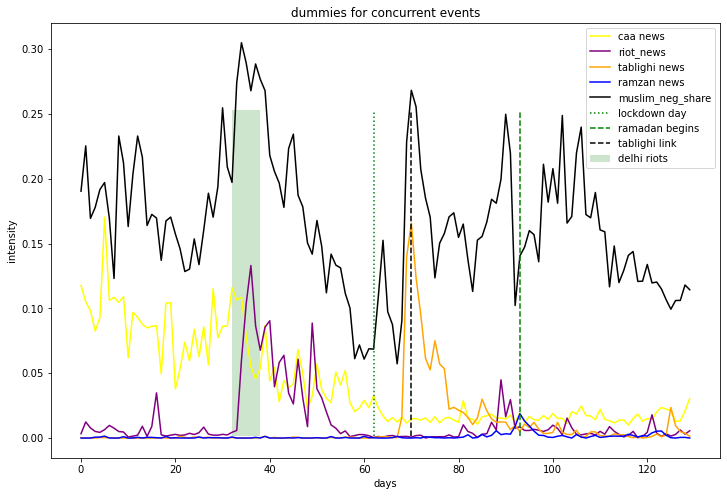

In [32]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(data["caa_share"].values, color = "yellow", label = "caa news")
ax.plot(data["riot_share"].values, color = "purple", label = "riot_news")
ax.plot(data["tablighi_share"].values, color = "orange", label = "tablighi news")
ax.plot(data["ramzan_share"].values, color = "blue", label = "ramzan news")
ax.plot(data["muslim_neg_share"].values, color = "black", label = "muslim_neg_share")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "intensity", title = "dummies for concurrent events")
ax.legend()

In [32]:
#finding mape with delhi riots and 1 lag of delhi riots